In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import display

In [105]:
car = pd.read_csv('test2015.csv',sep=';')

In [179]:
car

,iu_ac,libelle,iu_nd_amont,libelle_nd_amont,iu_nd_aval,libelle_nd_aval,t_1h,q,k,etat_trafic,etat_barre,dessin
0,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2015-01-22 01:00:00,NaN,0.36667,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
1,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2015-01-22 02:00:00,NaN,0.12611,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
2,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2015-01-22 03:00:00,NaN,0.18723,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
3,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2015-01-22 04:00:00,NaN,0.05333,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
4,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2015-01-22 05:00:00,NaN,0.08167,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
...,...,...,...,...,...,...,...,...,...,...,...,...
541459,5047,Daumesnil,2664,Daumesnil-Abel-Parrot,2666,Daumesnil-Traversiaire,2015-01-28 20:00:00,NaN,NaN,0,3,"""<PLINE><PT X=""""602845"""" Y=""""127426""""/><PT X=""..."
541460,5047,Daumesnil,2664,Daumesnil-Abel-Parrot,2666,Daumesnil-Traversiaire,2015-01-28 21:00:00,NaN,NaN,0,3,"""<PLINE><PT X=""""602845"""" Y=""""127426""""/><PT X=""..."
541461,5047,Daumesnil,2664,Daumesnil-Abel-Parrot,2666,Daumesnil-Traversiaire,2015-01-28 22:00:00,NaN,NaN,0,3,"""<PLINE><PT X=""""602845"""" Y=""""127426""""/><PT X=""..."
541462,5047,Daumesnil,2664,Daumesnil-Abel-Parrot,2666,Daumesnil-Traversiaire,2015-01-28 23:00:00,NaN,NaN,0,3,"""<PLINE><PT X=""""602845"""" Y=""""127426""""/><PT X=""..."


In [107]:
data = car.dropna(subset=['q','k'])
data = data.drop(columns = ['iu_ac','iu_nd_amont','libelle_nd_amont','iu_nd_aval','libelle_nd_aval','dessin','etat_barre'])
#carre = car[car['q'].notna() & car['k'].notna()]

In [101]:
data['date'] = data['t_1h'].str[:10]

In [109]:
data

,libelle,t_1h,q,k,etat_trafic
168,Av_Denfert_Rochereau,2015-01-22 01:00:00,269.0,3.45500,1
169,Av_Denfert_Rochereau,2015-01-22 02:00:00,148.0,1.86834,1
170,Av_Denfert_Rochereau,2015-01-22 03:00:00,115.0,1.56333,1
171,Av_Denfert_Rochereau,2015-01-22 04:00:00,59.0,0.76222,1
172,Av_Denfert_Rochereau,2015-01-22 05:00:00,76.0,1.14000,1
...,...,...,...,...,...
541123,Bd_Massena,2015-01-28 20:00:00,557.7,13.52170,1
541124,Bd_Massena,2015-01-28 21:00:00,300.3,4.51278,1
541125,Bd_Massena,2015-01-28 22:00:00,143.0,2.49167,1
541126,Bd_Massena,2015-01-28 23:00:00,126.5,1.95000,1


In [110]:
split_dfs = dict()
for group_name, group_df in data.groupby('libelle'):
    s1=group_df['q'].sum()
    if(s1!=0):
        split_dfs[group_name] = group_df.copy()
    "print(s1)

for libelle,subdataset in split_dfs.items():
    subdataset['date'] = subdataset['t_1h'].str[:10]
    subdataset = subdataset.groupby(by = ['date']).mean(numeric_only = True)
    #display(subdataset)
split_dfs.keys()

23312.0
304014.0
170607.0
523680.0
573477.0
0.0
0.0
0.0
0.0
583689.0
684642.0
316698.0
344986.0
145095.0
228387.0
181029.0
331044.0
73018.0
51490.0
81895.0
79199.0
191393.0
161557.0
0.0
219788.0
146812.0
120008.0
229990.0
87864.0
38648.0
49451.0
145374.0
84658.0
24688.0
92747.0
2248263.2
143979.0
50323.0
67582.0
262709.0
132241.0
264482.0
801748.0
512337.0
147110.0
257633.0
1002196.0
1538562.0
82924.0
126342.0
224844.0
1146994.0
122110.0
44626.0
650933.0
78224.0
48987.0
715502.0
61430.0
157819.0
610483.0
115997.0
483849.0
250874.0
175317.0
7081.0
92615.0
65516.0
476444.0
40500.0
143017.0
453774.0
88651.0
88651.0
50756.0
81747.0
22073.0
93893.0
48203.0
115859.0
855538.0
73764.0
637433.0
514165.0
220724.0
220052.0
1455152.0
122351.0
171844.0
1429212.0
344984.0
47215.0
286844.0
1038281.0
92854.0
394139.0
143793.0
781656.0
94244.0
471511.0
381009.0
630762.0
933014.0
177810.0
131343.0
6610.0
276374.0
55512.0
238768.0
438249.0
104101.0
1242363.0
225241.0
304147.0
47215.0
37799.0
95421.0
1064

C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,182.043478,4.347396,1.086957
2015-01-23,187.916667,3.661878,1.083333
2015-01-24,121.809524,0.764949,1.000000
2015-01-25,104.476190,0.664711,1.000000
2015-01-26,212.416667,3.719029,1.083333
2015-01-27,154.590909,2.471845,1.045455
2015-01-28,168.173913,3.662679,1.043478
2015-01-29,45.000000,0.265000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1070.086957,2.960870,1.021739
2015-01-23,1049.266667,3.564444,1.000000
2015-01-24,956.052632,2.334211,1.000000
2015-01-25,993.428571,1.992857,1.000000
2015-01-26,1209.230769,2.538462,1.000000
2015-01-27,1000.562500,2.050000,1.000000
2015-01-28,1028.187500,2.271875,1.000000
2015-01-29,349.500000,0.475000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2899.125000,14.878125,1.437500
2015-01-23,2240.842105,12.263158,1.421053
2015-01-24,2188.894737,7.802632,1.000000
2015-01-25,1801.500000,9.021875,1.125000
2015-01-26,2562.000000,10.950000,1.000000
2015-01-27,2036.000000,6.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3877.772727,18.027273,1.727273
2015-01-23,3621.000000,20.679167,1.875000
2015-01-24,3624.450000,12.270000,1.450000
2015-01-25,3684.428571,8.526190,1.238095
2015-01-26,4357.846154,18.846154,1.769231
2015-01-27,3509.000000,16.519048,1.619048
2015-01-28,4750.800000,23.716667,1.866667


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3933.130435,6.928261,1.043478
2015-01-23,4133.125000,7.041667,1.000000
2015-01-24,3675.000000,5.904762,1.000000
2015-01-25,3845.842105,6.010526,1.000000
2015-01-26,4691.538462,9.003846,1.076923
2015-01-27,3641.086957,6.360870,1.043478
2015-01-28,3624.375000,6.114583,1.000000
2015-01-29,1854.000000,2.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4138.043478,7.052174,1.130435
2015-01-23,3920.125000,6.464583,1.083333
2015-01-24,3660.142857,5.490476,1.047619
2015-01-25,3638.285714,6.133333,1.142857
2015-01-26,4374.692308,5.811538,1.076923
2015-01-27,3709.625000,6.541667,1.125000
2015-01-28,3900.000000,6.072917,1.125000
2015-01-29,1662.000000,2.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4700.347826,8.615217,1.260870
2015-01-23,4778.857143,6.419048,1.095238
2015-01-24,4458.857143,4.609524,1.000000
2015-01-25,4226.000000,4.147619,1.000000
2015-01-26,5567.538462,15.934615,1.615385
2015-01-27,4599.875000,5.031250,1.000000
2015-01-28,4478.125000,9.033333,1.250000
2015-01-29,3546.000000,3.250000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2351.100000,14.082500,1.650000
2015-01-23,3000.947368,20.121053,1.842105
2015-01-24,1977.142857,5.788095,1.047619
2015-01-25,1947.857143,7.471429,1.238095
2015-01-26,2800.384615,14.319231,1.615385
2015-01-27,2185.285714,9.507143,1.285714
2015-01-28,2996.062500,14.662500,1.437500


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2355.478261,25.256522,2.217391
2015-01-23,2367.434783,24.234783,2.086957
2015-01-24,2164.000000,11.707143,1.285714
2015-01-25,2057.761905,12.947619,1.380952
2015-01-26,2938.461538,26.650000,2.000000
2015-01-27,2293.500000,16.222917,1.583333
2015-01-28,2269.083333,20.260417,1.833333
2015-01-29,0.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1039.130435,8.086957,1.173913
2015-01-23,1003.625000,6.270833,1.041667
2015-01-24,918.714286,4.680952,1.000000
2015-01-25,962.285714,4.519048,1.000000
2015-01-26,1132.307692,5.546154,1.000000
2015-01-27,927.500000,7.837500,1.166667
2015-01-28,926.227273,4.818182,1.000000
2015-01-29,250.000000,1.250000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1591.391304,30.278261,2.434783
2015-01-23,1518.250000,34.204167,2.625000
2015-01-24,1447.761905,19.088095,1.809524
2015-01-25,1567.380952,16.238095,1.666667
2015-01-26,1918.307692,35.646154,2.692308
2015-01-27,1424.541667,26.652083,2.375000
2015-01-28,1370.666667,27.643750,2.416667
2015-01-29,6.000000,2.400000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1259.130435,6.810870,1.086957
2015-01-23,1202.416667,11.427083,1.333333
2015-01-24,1170.571429,7.159524,1.095238
2015-01-25,1103.952381,5.240476,1.000000
2015-01-26,1384.923077,8.803846,1.153846
2015-01-27,1160.958333,5.875000,1.000000
2015-01-28,1213.833333,6.795833,1.083333
2015-01-29,447.000000,2.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2281.652174,31.332609,2.521739
2015-01-23,2226.363636,31.525000,2.500000
2015-01-24,2116.904762,20.814286,1.761905
2015-01-25,2080.142857,16.145238,1.571429
2015-01-26,2413.076923,38.830769,2.846154
2015-01-27,2279.375000,25.862500,2.208333
2015-01-28,2221.458333,30.787500,2.541667
2015-01-29,2058.000000,15.000000,2.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,505.869565,6.534783,1.043478
2015-01-23,488.666667,9.885417,1.250000
2015-01-24,471.380952,6.297619,1.047619
2015-01-25,429.904762,5.011905,1.000000
2015-01-26,624.769231,7.961538,1.000000
2015-01-27,455.083333,5.329167,1.000000
2015-01-28,478.416667,6.100000,1.000000
2015-01-29,202.000000,2.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,376.000000,5.815217,1.086957
2015-01-23,369.750000,5.456250,1.041667
2015-01-24,281.571429,3.223810,1.000000
2015-01-25,289.857143,3.300000,1.000000
2015-01-26,422.615385,8.365385,1.230769
2015-01-27,333.041667,6.014583,1.125000
2015-01-28,345.208333,7.237500,1.166667
2015-01-29,196.000000,2.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,550.043478,1.906522,1.0
2015-01-23,575.000000,2.054167,1.0
2015-01-24,501.666667,1.747619,1.0
2015-01-25,479.714286,1.664286,1.0
2015-01-26,671.384615,2.450000,1.0
2015-01-27,523.541667,1.835417,1.0
2015-01-28,563.625000,2.029167,1.0
2015-01-29,15.000000,0.650000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,557.391304,12.797826,1.478261
2015-01-23,542.875000,13.775000,1.583333
2015-01-24,456.761905,3.326190,1.047619
2015-01-25,447.571429,3.228571,1.000000
2015-01-26,685.538462,20.542308,1.846154
2015-01-27,518.041667,10.364583,1.375000
2015-01-28,524.166667,9.910417,1.375000
2015-01-29,434.000000,2.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1367.826087,7.591304,1.000000
2015-01-23,1334.333333,7.945833,1.041667
2015-01-24,1135.476190,8.035714,1.142857
2015-01-25,1144.809524,7.271429,1.095238
2015-01-26,1623.000000,9.723077,1.076923
2015-01-27,1229.750000,8.695833,1.166667
2015-01-28,1222.875000,7.085417,1.000000
2015-01-29,61.000000,0.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1350.263158,15.757895,1.526316
2015-01-23,1173.916667,10.683333,1.333333
2015-01-24,1031.809524,6.357143,1.095238
2015-01-25,1022.190476,4.480952,1.000000
2015-01-26,1299.230769,7.265385,1.076923
2015-01-27,1056.086957,10.128261,1.304348
2015-01-28,1047.136364,11.225000,1.409091
2015-01-29,377.000000,1.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1326.869565,37.028261,2.608696
2015-01-23,1474.416667,32.737500,2.416667
2015-01-24,1424.952381,26.271429,2.142857
2015-01-25,1406.571429,22.395238,1.857143
2015-01-26,1801.692308,34.338462,2.538462
2015-01-27,1422.083333,29.227083,2.125000
2015-01-28,1488.958333,31.845833,2.375000
2015-01-29,1135.000000,7.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1027.521739,16.582609,1.608696
2015-01-23,933.916667,29.125000,2.166667
2015-01-24,1021.571429,4.783333,1.000000
2015-01-25,1093.809524,6.542857,1.095238
2015-01-26,948.230769,45.788462,2.923077
2015-01-27,921.416667,15.631250,1.583333
2015-01-28,865.791667,18.575000,1.666667
2015-01-29,1122.000000,5.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,892.619048,15.761905,1.571429
2015-01-23,739.791667,29.750000,2.166667
2015-01-24,861.190476,3.478571,1.000000
2015-01-25,812.904762,6.088095,1.190476
2015-01-26,768.615385,47.646154,3.000000
2015-01-27,783.208333,16.335417,1.625000
2015-01-28,786.291667,18.527083,1.625000
2015-01-29,692.000000,2.700000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1636.000000,8.341373,1.043478
2015-01-23,1617.041667,9.097856,1.083333
2015-01-24,1449.333333,7.329925,1.000000
2015-01-25,1323.238095,7.279264,1.000000
2015-01-26,1800.583333,11.119953,1.250000
2015-01-27,1513.434783,8.949934,1.086957
2015-01-28,1572.833333,7.656439,1.000000
2015-01-29,1165.000000,5.243330,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,641.521739,6.447105,1.0
2015-01-23,630.000000,6.335415,1.0
2015-01-24,503.190476,4.290450,1.0
2015-01-25,438.571429,3.801164,1.0
2015-01-26,816.916667,8.006764,1.0
2015-01-27,605.391304,5.884204,1.0
2015-01-28,575.541667,5.958959,1.0
2015-01-29,672.000000,5.622780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,260.217391,5.324953,1.000000
2015-01-23,272.916667,6.517135,1.125000
2015-01-24,266.000000,5.776856,1.000000
2015-01-25,224.523810,4.245901,1.000000
2015-01-26,332.500000,6.785004,1.000000
2015-01-27,240.608696,4.986474,1.000000
2015-01-28,255.250000,6.407541,1.083333
2015-01-29,162.000000,2.568890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,366.869565,1.218551,1.000000
2015-01-23,375.750000,1.291899,1.000000
2015-01-24,277.714286,0.915610,1.000000
2015-01-25,250.095238,0.843572,1.000000
2015-01-26,427.250000,1.300139,1.000000
2015-01-27,319.434783,1.974783,1.043478
2015-01-28,342.208333,1.015209,1.000000
2015-01-29,224.000000,0.471110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,358.231884,7.065910,1.159420
2015-01-23,355.250000,7.505801,1.180556
2015-01-24,285.666667,6.057242,1.095238
2015-01-25,260.952381,5.198688,1.047619
2015-01-26,407.305556,7.164369,1.083333
2015-01-27,315.378788,5.590142,1.075758
2015-01-28,341.305556,7.286042,1.166667
2015-01-29,196.333333,3.600367,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,596.478261,4.714953,1.173913
2015-01-23,597.166667,1.642480,1.000000
2015-01-24,572.714286,0.737436,1.000000
2015-01-25,483.761905,0.463414,1.000000
2015-01-26,611.166667,2.299079,1.000000
2015-01-27,546.739130,2.568332,1.043478
2015-01-28,580.333333,1.718635,1.000000
2015-01-29,584.000000,0.283330,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,183.652174,5.483694,1.043478
2015-01-23,173.000000,5.186878,1.000000
2015-01-24,192.238095,6.002854,1.000000
2015-01-25,136.714286,4.400266,1.000000
2015-01-26,184.916667,4.862641,1.000000
2015-01-27,142.782609,4.962584,1.043478
2015-01-28,154.958333,4.777179,1.041667
2015-01-29,182.000000,3.950550,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,702.347826,2.001764,1.0
2015-01-23,704.500000,1.831042,1.0
2015-01-24,607.190476,0.967011,1.0
2015-01-25,496.363636,0.251213,1.0
2015-01-26,793.250000,1.177640,1.0
2015-01-27,656.347826,1.164420,1.0
2015-01-28,680.583333,1.263983,1.0
2015-01-29,525.000000,0.123890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1212.913378,6.345744,1.063545
2015-01-23,1207.541987,6.482392,1.070513
2015-01-24,1101.192308,5.494236,1.025641
2015-01-25,1018.076557,5.459397,1.029304
2015-01-26,1406.576282,6.650749,1.019231
2015-01-27,1140.587291,5.793604,1.053512
2015-01-28,1160.079412,5.751343,1.039216
2015-01-29,1141.753846,6.219104,1.076923


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,334.304348,4.239381,1.000000
2015-01-23,345.750000,4.490711,1.027778
2015-01-24,281.777778,3.292179,1.000000
2015-01-25,297.698413,3.729492,1.000000
2015-01-26,400.722222,5.257670,1.000000
2015-01-27,312.043478,3.990315,1.000000
2015-01-28,319.166667,4.110010,1.000000
2015-01-29,191.333333,1.877593,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,340.826087,9.443653,1.347826
2015-01-23,357.750000,12.407495,1.416667
2015-01-24,326.666667,4.696586,1.000000
2015-01-25,308.904762,6.729948,1.142857
2015-01-26,431.333333,13.746801,1.416667
2015-01-27,318.304348,10.235388,1.391304
2015-01-28,325.250000,9.561878,1.333333
2015-01-29,248.000000,2.373340,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,441.043478,12.077782,1.434783
2015-01-23,468.500000,14.525740,1.541667
2015-01-24,470.380952,10.708446,1.142857
2015-01-25,411.000000,7.651823,1.047619
2015-01-26,509.833333,23.316439,1.916667
2015-01-27,442.478261,11.315875,1.304348
2015-01-28,449.375000,16.717295,1.541667
2015-01-29,605.000000,10.572800,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,259.416149,3.797082,1.031056
2015-01-23,294.166667,4.038327,1.041667
2015-01-24,207.802721,2.420553,1.006803
2015-01-25,179.340136,1.904011,1.006803
2015-01-26,333.178571,5.444062,1.071429
2015-01-27,276.260870,3.753301,1.055901
2015-01-28,245.682635,3.652606,1.035928
2015-01-29,159.857143,1.206033,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,481.108696,5.539203,1.0
2015-01-23,486.187500,5.540650,1.0
2015-01-24,429.428571,4.836088,1.0
2015-01-25,323.857143,4.186892,1.0
2015-01-26,544.916667,6.152965,1.0
2015-01-27,428.543478,4.911028,1.0
2015-01-28,453.895833,5.185059,1.0
2015-01-29,278.500000,2.669720,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,481.108696,5.539203,1.0
2015-01-23,486.187500,5.540650,1.0
2015-01-24,429.428571,4.836088,1.0
2015-01-25,323.857143,4.186892,1.0
2015-01-26,544.916667,6.152965,1.0
2015-01-27,428.543478,4.911028,1.0
2015-01-28,453.895833,5.185059,1.0
2015-01-29,278.500000,2.669720,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,621.469697,6.636467,1.068182
2015-01-23,682.864583,6.997571,1.067708
2015-01-24,573.654762,5.938412,1.059524
2015-01-25,533.821429,4.981242,1.023810
2015-01-26,791.062500,7.418576,1.020833
2015-01-27,635.652174,5.772586,1.043478
2015-01-28,647.645833,6.061577,1.026042
2015-01-29,408.000000,2.422014,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,749.539130,4.250732,1.017391
2015-01-23,734.625000,4.410974,1.041667
2015-01-24,561.028846,2.609307,1.000000
2015-01-25,496.390476,2.198229,1.000000
2015-01-26,909.300000,4.223057,1.000000
2015-01-27,706.408696,3.941914,1.034783
2015-01-28,743.575000,3.842445,1.000000
2015-01-29,498.600000,2.253556,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,551.565217,2.670641,1.000000
2015-01-23,543.833333,2.755695,1.000000
2015-01-24,411.952381,1.765173,1.000000
2015-01-25,350.809524,1.497355,1.000000
2015-01-26,620.250000,3.085371,1.000000
2015-01-27,495.043478,4.368948,1.086957
2015-01-28,526.500000,2.681819,1.000000
2015-01-29,334.000000,1.397780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,633.057971,13.650840,1.478261
2015-01-23,623.472222,12.910181,1.444444
2015-01-24,503.633333,6.952732,1.133333
2015-01-25,433.873016,5.273599,1.031746
2015-01-26,748.138889,13.908287,1.444444
2015-01-27,586.811594,11.497765,1.405797
2015-01-28,594.541667,12.628349,1.472222
2015-01-29,426.666667,3.913707,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,497.546584,7.627436,1.155280
2015-01-23,512.074405,7.850307,1.178571
2015-01-24,449.704082,6.058839,1.078231
2015-01-25,397.561224,5.671361,1.085034
2015-01-26,628.797619,8.785990,1.130952
2015-01-27,468.211180,6.938387,1.133540
2015-01-28,474.916667,7.239055,1.139881
2015-01-29,347.071429,3.283612,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,959.888446,9.522102,1.223108
2015-01-23,972.477273,11.821849,1.356061
2015-01-24,947.935065,6.339866,1.038961
2015-01-25,882.753247,6.343514,1.103896
2015-01-26,1126.568182,10.526654,1.227273
2015-01-27,861.217391,9.360912,1.249012
2015-01-28,920.090909,8.539337,1.185606
2015-01-29,773.454545,3.828133,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,622.913043,4.318189,1.000000
2015-01-23,599.565217,5.775023,1.043478
2015-01-24,434.428571,7.707094,1.190476
2015-01-25,391.190476,3.646538,1.000000
2015-01-26,767.000000,5.809447,1.000000
2015-01-27,581.086957,4.423720,1.000000
2015-01-28,605.625000,4.570210,1.000000
2015-01-29,365.000000,2.476110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,312.391304,3.416894,1.000000
2015-01-23,307.375000,4.833744,1.055556
2015-01-24,246.761905,2.718882,1.000000
2015-01-25,232.952381,2.279261,1.000000
2015-01-26,337.250000,4.281159,1.000000
2015-01-27,278.608696,3.874190,1.000000
2015-01-28,285.666667,3.898342,1.000000
2015-01-29,167.000000,1.237037,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,539.304348,7.832402,1.217391
2015-01-23,542.305556,6.243752,1.111111
2015-01-24,434.317460,3.684182,1.000000
2015-01-25,377.238095,2.999887,1.000000
2015-01-26,659.611111,5.974661,1.000000
2015-01-27,499.913043,5.897491,1.072464
2015-01-28,533.486111,5.770350,1.055556
2015-01-29,269.000000,1.449443,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,403.311213,9.366911,1.249428
2015-01-23,419.412281,8.937839,1.223684
2015-01-24,400.225564,7.725869,1.152882
2015-01-25,371.122807,6.665645,1.125313
2015-01-26,498.771930,11.330279,1.258772
2015-01-27,390.929062,7.950828,1.178490
2015-01-28,391.567982,9.032726,1.225877
2015-01-29,453.473684,11.845206,1.315789


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,416.086957,4.166848,1.021739
2015-01-23,430.083333,4.424562,1.020833
2015-01-24,407.333333,4.137807,1.000000
2015-01-25,378.571429,3.540491,1.000000
2015-01-26,508.583333,5.118937,1.000000
2015-01-27,371.565217,3.906752,1.021739
2015-01-28,399.791667,4.081656,1.020833
2015-01-29,415.000000,3.223890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,327.086957,7.847535,1.000000
2015-01-23,317.333333,6.712798,1.000000
2015-01-24,257.300000,4.862195,1.000000
2015-01-25,215.142857,3.810980,1.000000
2015-01-26,404.250000,9.489033,1.000000
2015-01-27,304.521739,6.707947,1.000000
2015-01-28,321.208333,7.607807,1.041667
2015-01-29,259.000000,3.833340,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,557.315217,6.675306,1.108696
2015-01-23,553.630208,6.691113,1.098958
2015-01-24,559.988095,4.878868,1.029762
2015-01-25,547.910714,4.069817,1.000000
2015-01-26,596.833333,9.140985,1.187500
2015-01-27,511.108696,5.519663,1.086957
2015-01-28,523.338542,5.690823,1.062500
2015-01-29,517.750000,2.415766,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,597.565217,3.996787,1.0
2015-01-23,592.250000,3.659491,1.0
2015-01-24,447.190476,2.508838,1.0
2015-01-25,355.428571,1.567911,1.0
2015-01-26,641.500000,3.712038,1.0
2015-01-27,522.173913,3.271957,1.0
2015-01-28,551.208333,3.759652,1.0
2015-01-29,474.000000,2.167220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,353.869565,7.512755,1.086957
2015-01-23,355.583333,8.516390,1.125000
2015-01-24,295.238095,5.381191,1.000000
2015-01-25,251.190476,3.711774,1.000000
2015-01-26,412.416667,7.759902,1.000000
2015-01-27,332.043478,8.983961,1.173913
2015-01-28,336.333333,7.322781,1.083333
2015-01-29,181.000000,2.575000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,881.000000,7.501599,1.144928
2015-01-23,874.569444,7.685610,1.152778
2015-01-24,684.322314,4.943113,1.066116
2015-01-25,571.412698,3.475644,1.039683
2015-01-26,1059.527778,8.301661,1.152778
2015-01-27,813.673913,6.410973,1.101449
2015-01-28,843.750000,6.985878,1.131944
2015-01-29,518.666667,2.447503,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,440.217391,3.500145,1.0
2015-01-23,411.416667,4.371158,1.0
2015-01-24,360.095238,4.025715,1.0
2015-01-25,316.857143,2.453308,1.0
2015-01-26,590.583333,4.760278,1.0
2015-01-27,417.739130,3.791448,1.0
2015-01-28,421.666667,4.288334,1.0
2015-01-29,400.000000,3.512780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,288.369565,3.104996,1.0
2015-01-23,289.989583,3.136999,1.0
2015-01-24,225.166667,2.149413,1.0
2015-01-25,184.000000,1.743269,1.0
2015-01-26,351.583333,3.367189,1.0
2015-01-27,269.000000,2.932537,1.0
2015-01-28,276.979167,2.911934,1.0
2015-01-29,216.500000,2.291942,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,302.474074,4.671946,1.011111
2015-01-23,316.956835,5.658058,1.057554
2015-01-24,298.374150,4.624421,1.027211
2015-01-25,272.238095,3.687704,1.006803
2015-01-26,392.160714,6.523364,1.059524
2015-01-27,307.633540,5.546762,1.077640
2015-01-28,312.157738,5.254842,1.038690
2015-01-29,222.500000,2.597104,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,431.673913,3.013540,1.0
2015-01-23,452.687500,3.156899,1.0
2015-01-24,213.547619,1.354023,1.0
2015-01-25,183.833333,1.004459,1.0
2015-01-26,617.125000,5.038104,1.0
2015-01-27,404.652174,2.749758,1.0
2015-01-28,485.395833,3.501924,1.0
2015-01-29,498.500000,2.663890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,852.576087,6.087401,1.119565
2015-01-23,865.739583,5.904249,1.093750
2015-01-24,733.714286,4.794154,1.047619
2015-01-25,623.035714,3.362481,1.000000
2015-01-26,1061.666667,6.601401,1.062500
2015-01-27,804.445652,5.438247,1.086957
2015-01-28,824.562500,5.515680,1.052083
2015-01-29,1051.750000,5.404583,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,595.855072,4.511692,1.043478
2015-01-23,595.333333,4.184776,1.013889
2015-01-24,509.571429,4.276850,1.047619
2015-01-25,424.539683,2.800204,1.000000
2015-01-26,750.972222,5.004090,1.000000
2015-01-27,561.739130,4.045959,1.014493
2015-01-28,565.694444,5.436452,1.097222
2015-01-29,507.333333,3.010003,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,248.608696,3.983025,1.000000
2015-01-23,251.700000,3.773056,1.000000
2015-01-24,216.990476,3.425979,1.000000
2015-01-25,182.466667,2.577631,1.009524
2015-01-26,294.850000,4.192104,1.000000
2015-01-27,232.365217,3.377615,1.008696
2015-01-28,245.350000,3.893381,1.000000
2015-01-29,145.000000,1.392558,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,63.000000,0.515339,1.0
2015-01-23,45.958333,0.430648,1.0
2015-01-24,37.666667,0.386536,1.0
2015-01-25,30.285714,0.311985,1.0
2015-01-26,48.750000,0.477362,1.0
2015-01-27,55.869565,0.420291,1.0
2015-01-28,49.916667,0.462848,1.0
2015-01-29,34.000000,0.401670,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,728.565217,4.052275,1.000000
2015-01-23,681.916667,3.302989,1.000000
2015-01-24,489.285714,2.178123,1.000000
2015-01-25,452.666667,1.970426,1.000000
2015-01-26,763.000000,3.710140,1.000000
2015-01-27,629.086957,3.968168,1.086957
2015-01-28,659.500000,3.731182,1.041667
2015-01-29,258.000000,0.825560,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,458.652174,6.346914,1.130435
2015-01-23,458.583333,7.403195,1.166667
2015-01-24,379.285714,3.799234,1.000000
2015-01-25,377.190476,3.537884,1.000000
2015-01-26,624.083333,8.915043,1.166667
2015-01-27,425.913043,6.359737,1.130435
2015-01-28,436.458333,6.361300,1.125000
2015-01-29,315.000000,1.925000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,804.565217,7.975024,1.141304
2015-01-23,819.562500,7.917022,1.114583
2015-01-24,737.428571,11.878648,1.369048
2015-01-25,752.309524,6.267449,1.047619
2015-01-26,961.166667,9.768775,1.208333
2015-01-27,792.021739,7.669186,1.119565
2015-01-28,799.437500,7.332453,1.083333
2015-01-29,715.000000,4.634863,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,336.700000,1.969864,1.0
2015-01-23,350.916667,0.753195,1.0
2015-01-24,240.952381,0.299208,1.0
2015-01-25,75.888889,0.107841,1.0
2015-01-26,384.500000,0.934262,1.0
2015-01-27,310.318182,0.722452,1.0
2015-01-28,335.458333,0.947547,1.0
2015-01-29,109.000000,0.213890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,939.347826,4.385871,1.0
2015-01-23,965.416667,4.425582,1.0
2015-01-24,890.952381,3.774948,1.0
2015-01-25,884.238095,3.958229,1.0
2015-01-26,1249.166667,5.844398,1.0
2015-01-27,942.652174,4.522320,1.0
2015-01-28,968.208333,4.272062,1.0
2015-01-29,1055.000000,3.923330,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,804.454545,9.620575,1.272727
2015-01-23,780.608696,10.549180,1.369565
2015-01-24,780.595238,7.547790,1.071429
2015-01-25,725.690476,5.848080,1.047619
2015-01-26,942.208333,11.381212,1.291667
2015-01-27,732.022727,5.874219,1.045455
2015-01-28,756.270833,8.254701,1.229167
2015-01-29,598.000000,3.251945,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,640.913043,0.836861,1.0
2015-01-23,610.708333,0.792016,1.0
2015-01-24,586.285714,0.777727,1.0
2015-01-25,553.047619,0.718440,1.0
2015-01-26,722.166667,0.953335,1.0
2015-01-27,553.857143,0.755505,1.0
2015-01-28,611.375000,0.797107,1.0
2015-01-29,357.000000,0.417220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,640.913043,0.836861,1.0
2015-01-23,610.708333,0.792016,1.0
2015-01-24,586.285714,0.777727,1.0
2015-01-25,553.047619,0.718440,1.0
2015-01-26,722.166667,0.953335,1.0
2015-01-27,553.857143,0.755505,1.0
2015-01-28,611.375000,0.797107,1.0
2015-01-29,357.000000,0.417220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,351.045455,3.466871,1.0
2015-01-23,358.130435,3.552587,1.0
2015-01-24,335.619048,3.221139,1.0
2015-01-25,317.095238,2.740054,1.0
2015-01-26,444.083333,4.364723,1.0
2015-01-27,316.181818,2.987047,1.0
2015-01-28,360.166667,3.447479,1.0
2015-01-29,160.000000,1.109440,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,291.521739,7.997998,1.0
2015-01-23,298.604167,8.194793,1.0
2015-01-24,276.404762,7.794473,1.0
2015-01-25,270.095238,7.539524,1.0
2015-01-26,273.333333,7.197849,1.0
2015-01-27,250.847826,6.780787,1.0
2015-01-28,260.708333,7.118519,1.0
2015-01-29,219.000000,6.178890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,79.978261,9.570209,1.347826
2015-01-23,82.062500,9.939479,1.375000
2015-01-24,65.761905,4.881628,1.095238
2015-01-25,49.976190,2.110994,1.000000
2015-01-26,100.958333,9.549838,1.291667
2015-01-27,73.065217,7.718004,1.217391
2015-01-28,77.791667,9.147629,1.291667
2015-01-29,38.000000,1.173890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,346.804348,3.096149,1.000000
2015-01-23,353.395833,3.083114,1.000000
2015-01-24,292.761905,2.687845,1.000000
2015-01-25,312.238095,3.040053,1.000000
2015-01-26,363.041667,8.104192,1.166667
2015-01-27,280.869565,2.437803,1.000000
2015-01-28,280.187500,2.418080,1.000000
2015-01-29,242.500000,1.566110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,359.869565,6.733527,1.043478
2015-01-23,346.583333,6.464169,1.083333
2015-01-24,281.761905,4.015186,1.000000
2015-01-25,238.904762,3.167408,1.000000
2015-01-26,405.000000,7.523428,1.000000
2015-01-27,328.652174,5.610917,1.000000
2015-01-28,336.458333,8.153542,1.250000
2015-01-29,180.000000,1.477780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,295.463768,4.345765,1.000000
2015-01-23,297.833333,4.634977,1.013889
2015-01-24,201.317460,2.936404,1.000000
2015-01-25,180.634921,2.741104,1.000000
2015-01-26,322.138889,5.189690,1.000000
2015-01-27,260.275362,3.984140,1.000000
2015-01-28,279.472222,4.707616,1.013889
2015-01-29,95.666667,1.505930,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,356.203297,5.593635,1.107143
2015-01-23,377.718421,5.742019,1.131579
2015-01-24,364.086310,5.200585,1.098214
2015-01-25,314.895833,3.850210,1.041667
2015-01-26,428.510417,5.101424,1.041667
2015-01-27,350.798913,4.974999,1.084239
2015-01-28,356.979167,5.626030,1.130208
2015-01-29,360.062500,2.876424,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,257.630435,4.817698,1.043478
2015-01-23,261.854167,6.054214,1.083333
2015-01-24,225.761905,3.482118,1.000000
2015-01-25,222.738095,2.728110,1.000000
2015-01-26,324.291667,5.114053,1.000000
2015-01-27,250.173913,4.133623,1.000000
2015-01-28,244.227273,4.640895,1.045455
2015-01-29,235.000000,2.320835,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,273.826087,7.146888,1.100543
2015-01-23,279.570312,7.357265,1.138021
2015-01-24,242.514881,5.759536,1.056548
2015-01-25,236.166667,5.262297,1.048485
2015-01-26,342.901042,8.514878,1.114583
2015-01-27,262.089674,6.400981,1.089674
2015-01-28,274.240741,7.161080,1.121693
2015-01-29,246.312500,4.687572,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,280.245399,4.311175,1.039877
2015-01-23,281.618590,4.279668,1.038462
2015-01-24,235.854478,3.063086,1.007463
2015-01-25,177.344322,1.885036,1.000000
2015-01-26,363.987179,4.992189,1.012821
2015-01-27,266.344482,3.957866,1.026756
2015-01-28,270.791667,4.060493,1.035256
2015-01-29,185.384615,1.841368,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,824.173913,5.884483,1.086957
2015-01-23,790.666667,3.941124,1.000000
2015-01-24,699.571429,3.912224,1.000000
2015-01-25,558.714286,3.038427,1.000000
2015-01-26,783.500000,3.794169,1.000000
2015-01-27,761.521739,3.945485,1.000000
2015-01-28,776.000000,4.002328,1.000000
2015-01-29,465.000000,1.781390,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,768.282609,9.059071,1.260870
2015-01-23,765.770833,9.832928,1.291667
2015-01-24,688.119048,7.000097,1.166667
2015-01-25,615.928571,5.070889,1.071429
2015-01-26,903.291667,11.263542,1.375000
2015-01-27,733.891304,7.927380,1.239130
2015-01-28,757.583333,8.383059,1.250000
2015-01-29,691.000000,5.895280,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,665.301449,8.643566,1.197101
2015-01-23,677.608333,6.624480,1.094444
2015-01-24,650.692063,5.374318,1.019048
2015-01-25,576.003175,4.834476,1.041270
2015-01-26,807.422222,9.366931,1.183333
2015-01-27,631.590909,5.520547,1.033333
2015-01-28,650.805556,6.451777,1.086111
2015-01-29,481.600000,2.674965,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,454.739130,3.443310,1.000000
2015-01-23,439.208333,2.971331,1.000000
2015-01-24,420.857143,3.685252,1.000000
2015-01-25,345.289474,3.247897,1.052632
2015-01-26,493.083333,3.451320,1.000000
2015-01-27,390.454545,3.040606,1.022727
2015-01-28,419.083333,3.171564,1.000000
2015-01-29,212.000000,0.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,309.065217,6.170303,1.163043
2015-01-23,301.979167,4.823582,1.052083
2015-01-24,278.047619,3.713970,1.011905
2015-01-25,224.333333,2.660404,1.011905
2015-01-26,380.333333,5.186726,1.020833
2015-01-27,275.363636,4.061606,1.045455
2015-01-28,300.833333,5.345847,1.135417
2015-01-29,213.000000,1.784860,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,455.867495,16.733369,1.641822
2015-01-23,472.472222,16.455877,1.605159
2015-01-24,473.113379,16.572339,1.603175
2015-01-25,420.263039,11.320941,1.306122
2015-01-26,521.289683,18.089904,1.670635
2015-01-27,437.283644,15.104391,1.561077
2015-01-28,448.656627,15.490278,1.560241
2015-01-29,519.952381,11.083093,1.238095


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,635.173913,7.366299,1.119565
2015-01-23,625.104167,6.843479,1.093750
2015-01-24,503.400000,4.096190,1.012500
2015-01-25,435.047619,3.225054,1.000000
2015-01-26,765.333333,7.741451,1.125000
2015-01-27,591.456522,6.136281,1.065217
2015-01-28,589.791667,6.382174,1.104167
2015-01-29,488.000000,3.726808,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,360.478261,4.643890,1.0
2015-01-23,350.583333,4.506829,1.0
2015-01-24,250.400000,2.956835,1.0
2015-01-25,213.904762,2.554102,1.0
2015-01-26,411.500000,4.973983,1.0
2015-01-27,332.695652,4.097830,1.0
2015-01-28,341.250000,3.904815,1.0
2015-01-29,230.000000,2.321110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2077.478261,5.354519,1.0
2015-01-23,2045.541667,5.288798,1.0
2015-01-24,1672.285714,4.470213,1.0
2015-01-25,1513.380952,3.565821,1.0
2015-01-26,2318.583333,5.944259,1.0
2015-01-27,1950.043478,5.086016,1.0
2015-01-28,2053.291667,5.433890,1.0
2015-01-29,1117.000000,2.068890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1512.304348,11.237537,1.347826
2015-01-23,1515.858333,11.305971,1.358333
2015-01-24,1218.695238,8.810605,1.257143
2015-01-25,1049.285714,4.652250,1.028571
2015-01-26,1778.116667,11.451288,1.250000
2015-01-27,1388.226087,8.508638,1.226087
2015-01-28,1436.116667,12.749189,1.466667
2015-01-29,1131.600000,5.749448,1.200000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,626.894737,0.871902,1.0
2015-01-23,714.916667,1.077478,1.0
2015-01-24,542.095238,0.601111,1.0
2015-01-25,482.523810,0.547329,1.0
2015-01-26,816.916667,1.055186,1.0
2015-01-27,636.913043,0.812247,1.0
2015-01-28,713.500000,1.041575,1.0
2015-01-29,692.000000,0.399440,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,332.766304,12.037553,1.396739
2015-01-23,347.807292,10.598589,1.322917
2015-01-24,330.142857,10.232300,1.279762
2015-01-25,302.422619,6.383266,1.095238
2015-01-26,391.875000,10.883521,1.218750
2015-01-27,314.690217,9.815145,1.288043
2015-01-28,324.041667,9.754094,1.276042
2015-01-29,265.125000,3.684169,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,278.282609,3.786873,1.0
2015-01-23,262.166667,3.610203,1.0
2015-01-24,206.547619,2.717958,1.0
2015-01-25,141.523810,1.858850,1.0
2015-01-26,326.812500,4.747501,1.0
2015-01-27,250.608696,3.438571,1.0
2015-01-28,253.770833,3.530735,1.0
2015-01-29,170.000000,2.017505,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,423.230769,6.608326,1.163880
2015-01-23,434.977564,6.773618,1.160256
2015-01-24,376.014652,6.228386,1.142857
2015-01-25,321.479853,4.408575,1.069597
2015-01-26,500.448718,7.358827,1.147436
2015-01-27,391.290970,5.937064,1.133779
2015-01-28,410.147436,7.081007,1.185897
2015-01-29,457.615385,5.945465,1.153846


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,367.173913,4.716170,1.000000
2015-01-23,344.062500,4.391449,1.020833
2015-01-24,273.095238,3.423258,1.000000
2015-01-25,181.452381,2.176879,1.000000
2015-01-26,413.041667,5.289074,1.000000
2015-01-27,331.217391,4.266381,1.043478
2015-01-28,336.833333,4.368077,1.020833
2015-01-29,215.500000,2.178060,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,552.644928,9.908633,1.347826
2015-01-23,559.604167,9.367443,1.298611
2015-01-24,484.460317,8.026284,1.238095
2015-01-25,421.547619,6.884213,1.214286
2015-01-26,654.861111,10.678744,1.375000
2015-01-27,523.826087,8.777118,1.239130
2015-01-28,542.847222,8.953432,1.256944
2015-01-29,483.000000,7.771017,1.333333


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,932.028986,7.376695,1.202899
2015-01-23,919.611111,7.818117,1.236111
2015-01-24,682.131148,4.344090,1.049180
2015-01-25,566.746032,3.082197,1.000000
2015-01-26,1234.944444,8.913795,1.250000
2015-01-27,883.492754,6.412674,1.144928
2015-01-28,919.027778,6.958581,1.180556
2015-01-29,527.666667,2.568890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,645.782609,6.394705,1.105590
2015-01-23,641.815476,4.772399,1.023810
2015-01-24,607.006803,4.127193,1.027211
2015-01-25,485.394558,2.806033,1.000000
2015-01-26,725.023810,7.004050,1.059524
2015-01-27,593.099379,4.335093,1.012422
2015-01-28,584.779762,4.599164,1.011905
2015-01-29,535.571429,2.650397,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1629.637681,6.504566,1.101449
2015-01-23,1653.263889,7.192440,1.152778
2015-01-24,1418.291667,5.639669,1.100000
2015-01-25,1395.833333,4.400663,1.031746
2015-01-26,2042.544643,7.556024,1.053571
2015-01-27,1686.582609,7.207067,1.104348
2015-01-28,1773.325000,7.432350,1.158333
2015-01-29,1472.100000,4.397118,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,395.695652,3.282320,1.0
2015-01-23,417.541667,3.466436,1.0
2015-01-24,398.238095,3.870345,1.0
2015-01-25,368.619048,3.008360,1.0
2015-01-26,501.166667,5.159768,1.0
2015-01-27,375.913043,3.514180,1.0
2015-01-28,380.625000,3.407016,1.0
2015-01-29,249.000000,1.765560,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,908.869565,4.101327,1.043478
2015-01-23,927.791667,3.691806,1.000000
2015-01-24,879.428571,3.001852,1.000000
2015-01-25,730.750000,2.153223,1.000000
2015-01-26,1054.500000,3.712501,1.000000
2015-01-27,867.608696,3.705677,1.043478
2015-01-28,913.041667,4.996993,1.083333
2015-01-29,567.000000,1.046670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,52.000000,2.757696,1.0
2015-01-23,49.500000,2.808914,1.0
2015-01-24,32.666667,1.967328,1.0
2015-01-25,28.285714,1.504261,1.0
2015-01-26,63.166667,3.088938,1.0
2015-01-27,48.818182,2.452097,1.0
2015-01-28,51.916667,3.070835,1.0
2015-01-29,24.000000,0.733890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,952.304348,4.525327,1.021739
2015-01-23,928.250000,4.056832,1.020833
2015-01-24,950.523810,5.232767,1.071429
2015-01-25,866.000000,4.973137,1.095238
2015-01-26,1087.833333,5.714445,1.000000
2015-01-27,887.695652,3.590702,1.000000
2015-01-28,914.166667,3.767815,1.000000
2015-01-29,448.000000,1.724720,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,382.684211,3.550848,1.0
2015-01-23,395.650000,4.383028,1.0
2015-01-24,408.857143,3.499631,1.0
2015-01-25,325.523810,2.723969,1.0
2015-01-26,453.250000,4.052593,1.0
2015-01-27,398.652174,4.343480,1.0
2015-01-28,415.250000,4.219769,1.0
2015-01-29,332.000000,2.643340,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,957.108696,3.841064,1.0
2015-01-23,913.500000,4.516110,1.0
2015-01-24,680.171429,3.773557,1.0
2015-01-25,767.238095,3.290186,1.0
2015-01-26,1136.625000,4.903472,1.0
2015-01-27,439.600000,1.674112,1.0
2015-01-28,1505.897436,6.371597,1.0
2015-01-29,1238.666667,3.558337,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,517.673913,8.363868,1.181159
2015-01-23,523.159722,7.370984,1.104167
2015-01-24,460.071429,6.486165,1.111111
2015-01-25,409.976190,5.055530,1.039683
2015-01-26,616.625000,9.047975,1.152778
2015-01-27,473.390977,6.948844,1.120301
2015-01-28,501.826389,8.186019,1.194444
2015-01-29,371.333333,3.284355,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,604.913043,7.270085,1.195652
2015-01-23,542.564103,6.208067,1.128205
2015-01-24,485.904762,3.887410,1.000000
2015-01-25,375.809524,2.608812,1.000000
2015-01-26,755.416667,5.611992,1.000000
2015-01-27,569.304348,4.414230,1.000000
2015-01-28,594.958333,4.759605,1.000000
2015-01-29,581.000000,3.573330,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,599.947826,7.545720,1.185507
2015-01-23,590.272222,6.150430,1.091667
2015-01-24,519.339683,4.271229,1.003175
2015-01-25,470.177778,5.433454,1.095238
2015-01-26,668.905556,5.489453,1.000000
2015-01-27,523.188406,5.170657,1.081159
2015-01-28,567.969444,5.202409,1.041667
2015-01-29,387.533333,2.711445,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,830.956522,3.950896,1.0
2015-01-23,820.000000,3.873439,1.0
2015-01-24,628.357143,3.179194,1.0
2015-01-25,519.095238,2.671086,1.0
2015-01-26,1003.750000,4.924700,1.0
2015-01-27,776.065217,3.958662,1.0
2015-01-28,801.125000,3.841783,1.0
2015-01-29,610.500000,3.941945,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1046.021739,3.669121,1.0
2015-01-23,1056.875000,3.737108,1.0
2015-01-24,985.880952,3.762078,1.0
2015-01-25,895.333333,2.868572,1.0
2015-01-26,1253.833333,4.781112,1.0
2015-01-27,999.630435,3.420509,1.0
2015-01-28,1012.895833,3.970036,1.0
2015-01-29,797.500000,2.082505,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,360.478261,4.643890,1.0
2015-01-23,350.583333,4.506829,1.0
2015-01-24,250.400000,2.956835,1.0
2015-01-25,213.904762,2.554102,1.0
2015-01-26,411.500000,4.973983,1.0
2015-01-27,332.695652,4.097830,1.0
2015-01-28,341.250000,3.904815,1.0
2015-01-29,230.000000,2.321110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,265.608696,2.780993,1.0
2015-01-23,255.083333,2.683242,1.0
2015-01-24,249.476190,2.888229,1.0
2015-01-25,232.190476,2.175531,1.0
2015-01-26,288.083333,2.907178,1.0
2015-01-27,249.260870,2.769228,1.0
2015-01-28,253.458333,2.785858,1.0
2015-01-29,180.000000,1.841670,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,634.913043,2.582609,1.0
2015-01-23,652.416667,2.712500,1.0
2015-01-24,581.380952,2.497619,1.0
2015-01-25,595.428571,2.402381,1.0
2015-01-26,838.615385,3.550000,1.0
2015-01-27,592.333333,2.404167,1.0
2015-01-28,619.916667,2.564583,1.0
2015-01-29,451.000000,1.700000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,757.652174,4.778261,1.000000
2015-01-23,743.958333,4.316667,1.000000
2015-01-24,675.571429,5.761905,1.095238
2015-01-25,647.700000,3.645000,1.000000
2015-01-26,791.461538,4.473077,1.000000
2015-01-27,656.000000,3.625000,1.000000
2015-01-28,736.041667,4.645833,1.000000
2015-01-29,305.000000,1.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,411.608696,4.856522,1.0
2015-01-23,407.916667,4.850000,1.0
2015-01-24,365.285714,4.266667,1.0
2015-01-25,339.380952,3.914286,1.0
2015-01-26,505.307692,5.953846,1.0
2015-01-27,402.958333,4.741667,1.0
2015-01-28,413.541667,4.977083,1.0
2015-01-29,351.000000,3.750000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,314.547826,1.511479,1.008696
2015-01-23,318.816667,1.676863,1.000000
2015-01-24,216.057143,0.892843,1.000000
2015-01-25,181.194175,0.827440,1.000000
2015-01-26,374.183333,2.130215,1.000000
2015-01-27,282.026087,1.549581,1.008696
2015-01-28,346.383333,1.987492,1.016667
2015-01-29,315.800000,1.495112,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,528.597826,8.469860,1.282609
2015-01-23,532.468750,8.319159,1.307292
2015-01-24,439.535714,6.706301,1.214286
2015-01-25,433.559524,7.956988,1.279762
2015-01-26,653.312500,7.801973,1.229167
2015-01-27,482.715909,5.732992,1.164773
2015-01-28,512.020833,6.593854,1.218750
2015-01-29,435.250000,4.700350,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,707.773913,5.147221,1.069565
2015-01-23,685.925000,5.479550,1.079167
2015-01-24,519.457143,2.816338,1.000000
2015-01-25,439.752381,3.149313,1.019048
2015-01-26,833.016667,4.783186,1.008333
2015-01-27,594.472727,4.184118,1.036364
2015-01-28,656.841667,4.262047,1.029167
2015-01-29,334.000000,1.188500,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,474.927536,8.005065,1.137681
2015-01-23,473.072917,7.981008,1.114583
2015-01-24,434.317460,11.645186,1.361111
2015-01-25,420.186508,6.188961,1.047619
2015-01-26,535.048611,9.025530,1.090278
2015-01-27,439.865942,7.228655,1.094203
2015-01-28,459.701389,7.681033,1.114583
2015-01-29,425.083333,4.886622,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,871.652174,7.644014,1.043478
2015-01-23,869.916667,7.175424,1.000000
2015-01-24,848.857143,7.273960,1.047619
2015-01-25,759.142857,5.669145,1.000000
2015-01-26,913.500000,6.952783,1.000000
2015-01-27,820.826087,6.293937,1.000000
2015-01-28,806.333333,6.841016,1.041667
2015-01-29,624.000000,4.109263,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,508.260870,9.463291,1.282609
2015-01-23,527.916667,9.449531,1.270833
2015-01-24,442.150000,7.289031,1.150000
2015-01-25,384.952381,3.691165,1.000000
2015-01-26,679.083333,10.597499,1.250000
2015-01-27,491.260870,7.782816,1.217391
2015-01-28,521.083333,7.608802,1.208333
2015-01-29,420.000000,3.275005,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1048.942029,6.917880,1.094203
2015-01-23,1019.625000,6.642326,1.076389
2015-01-24,956.476190,6.456613,1.047619
2015-01-25,896.777778,5.861227,1.023810
2015-01-26,1128.333333,7.296552,1.041667
2015-01-27,923.579710,6.033939,1.050725
2015-01-28,942.111111,6.310961,1.069444
2015-01-29,781.666667,4.736298,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,352.150000,2.544973,1.0
2015-01-23,339.000000,2.455626,1.0
2015-01-24,243.500000,1.793718,1.0
2015-01-25,223.500000,1.641297,1.0
2015-01-26,460.666667,3.438844,1.0
2015-01-27,315.760870,2.313637,1.0
2015-01-28,344.791667,2.662582,1.0
2015-01-29,182.000000,1.297225,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,830.586957,13.551665,1.456522
2015-01-23,874.395833,13.309596,1.427083
2015-01-24,843.642857,10.224834,1.273810
2015-01-25,746.047619,8.904696,1.261905
2015-01-26,956.208333,15.034042,1.458333
2015-01-27,777.826087,11.534454,1.358696
2015-01-28,797.666667,13.372285,1.468750
2015-01-29,854.000000,5.541665,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1155.043478,4.798682,1.028986
2015-01-23,1213.125000,5.526731,1.097222
2015-01-24,1145.904762,5.009077,1.031746
2015-01-25,1049.476190,4.518530,1.047619
2015-01-26,1373.166667,5.794644,1.055556
2015-01-27,1082.739130,4.837779,1.043478
2015-01-28,1136.541667,5.435678,1.055556
2015-01-29,1122.000000,3.238893,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,827.434783,4.854494,1.000000
2015-01-23,866.916667,4.492593,1.000000
2015-01-24,868.285714,4.205133,1.000000
2015-01-25,811.619048,3.779817,1.000000
2015-01-26,905.166667,8.345795,1.166667
2015-01-27,722.391304,3.864784,1.000000
2015-01-28,798.958333,5.051738,1.041667
2015-01-29,919.000000,3.427220,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,356.158025,3.447346,1.039506
2015-01-23,329.805556,2.805447,1.032407
2015-01-24,246.960317,1.482836,1.000000
2015-01-25,260.952381,1.644196,1.000000
2015-01-26,399.648148,3.003842,1.013889
2015-01-27,271.961071,2.016769,1.012165
2015-01-28,303.913953,2.579394,1.027907
2015-01-29,143.388889,0.659507,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,308.000000,2.449012,1.086957
2015-01-23,303.458333,2.644955,1.083333
2015-01-24,208.571429,0.682594,1.000000
2015-01-25,216.904762,0.929604,1.000000
2015-01-26,336.083333,1.957130,1.000000
2015-01-27,270.391304,1.263720,1.000000
2015-01-28,262.250000,1.229005,1.000000
2015-01-29,111.000000,0.196110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,307.739130,7.035696,1.152174
2015-01-23,317.659722,6.956059,1.118056
2015-01-24,259.444444,4.266630,1.011905
2015-01-25,234.019841,3.893477,1.023810
2015-01-26,374.847222,8.948609,1.180556
2015-01-27,279.452899,5.940526,1.101449
2015-01-28,285.427083,6.470154,1.121528
2015-01-29,217.916667,3.028705,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,171.260870,5.974060,1.0
2015-01-23,174.500000,6.273380,1.0
2015-01-24,151.952381,5.392884,1.0
2015-01-25,151.000000,4.495344,1.0
2015-01-26,191.916667,6.703843,1.0
2015-01-27,152.000000,5.469616,1.0
2015-01-28,163.416667,6.039190,1.0
2015-01-29,162.000000,3.721110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,468.366460,1.599568,1.0
2015-01-23,440.270833,1.527946,1.0
2015-01-24,277.806122,0.955772,1.0
2015-01-25,249.789116,0.853265,1.0
2015-01-26,519.702381,1.825256,1.0
2015-01-27,385.838509,1.193778,1.0
2015-01-28,418.101190,1.468932,1.0
2015-01-29,212.214286,0.535756,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,882.913043,8.035701,1.173913
2015-01-23,876.729167,5.331458,1.000000
2015-01-24,830.428571,6.608200,1.095238
2015-01-25,751.666667,5.768728,1.095238
2015-01-26,964.458333,5.504770,1.000000
2015-01-27,799.130435,5.577056,1.043478
2015-01-28,802.020833,4.789237,1.000000
2015-01-29,695.000000,2.856110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,424.891304,4.564710,1.072464
2015-01-23,365.375000,4.741575,1.090278
2015-01-24,255.095238,1.532280,1.000000
2015-01-25,245.309524,1.417778,1.000000
2015-01-26,480.833333,6.716458,1.222222
2015-01-27,317.065217,2.806012,1.028986
2015-01-28,345.875000,4.732285,1.111111
2015-01-29,338.500000,0.987223,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,306.408696,6.261669,1.095652
2015-01-23,309.350000,5.994899,1.116667
2015-01-24,271.304762,4.748277,1.019048
2015-01-25,237.466667,4.005054,1.019048
2015-01-26,361.416667,6.944528,1.050000
2015-01-27,284.600000,5.279006,1.034783
2015-01-28,290.108333,5.826997,1.091667
2015-01-29,209.800000,2.800666,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,396.654464,4.626399,1.053571
2015-01-23,407.596667,5.177776,1.079167
2015-01-24,260.927619,3.133779,1.009524
2015-01-25,225.418095,2.607496,1.004762
2015-01-26,526.655000,6.442158,1.075000
2015-01-27,367.264348,4.505824,1.052174
2015-01-28,430.300000,6.437090,1.141667
2015-01-29,647.900000,4.584836,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,890.111554,6.030087,1.139442
2015-01-23,888.828897,5.201119,1.079848
2015-01-24,752.886957,4.892369,1.091304
2015-01-25,650.839827,2.824984,1.004329
2015-01-26,1071.265152,8.176054,1.189394
2015-01-27,831.193676,4.716775,1.059289
2015-01-28,847.144531,5.568473,1.105469
2015-01-29,856.000000,3.362654,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1111.260870,6.656694,1.043478
2015-01-23,1129.500000,5.879351,1.000000
2015-01-24,1027.714286,5.539766,1.047619
2015-01-25,863.047619,3.897992,1.000000
2015-01-26,1423.250000,8.073744,1.083333
2015-01-27,1038.913043,6.138965,1.043478
2015-01-28,1068.791667,6.883872,1.083333
2015-01-29,913.000000,4.109440,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,420.975862,4.341226,1.055172
2015-01-23,386.230769,3.812704,1.054487
2015-01-24,297.893773,2.196410,1.014652
2015-01-25,313.234432,2.230350,1.018315
2015-01-26,447.698718,3.903555,1.025641
2015-01-27,313.355401,3.170390,1.052265
2015-01-28,365.647436,3.521987,1.041667
2015-01-29,229.846154,1.178462,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,637.760870,8.973365,1.250000
2015-01-23,657.187500,9.088195,1.218750
2015-01-24,624.190476,7.899612,1.142857
2015-01-25,478.880952,4.865610,1.023810
2015-01-26,773.583333,9.049189,1.166667
2015-01-27,600.913043,6.938642,1.119565
2015-01-28,626.125000,7.838421,1.187500
2015-01-29,526.500000,4.523615,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,269.261905,1.909799,1.003968
2015-01-23,292.726236,1.896501,1.007605
2015-01-24,194.264069,0.991343,1.000000
2015-01-25,190.606061,1.028370,1.000000
2015-01-26,350.098485,2.286369,1.015152
2015-01-27,197.028926,1.303712,1.004132
2015-01-28,249.526515,1.544065,1.000000
2015-01-29,96.272727,0.386871,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,394.322464,2.769175,1.003623
2015-01-23,374.625000,2.695564,1.017361
2015-01-24,286.015873,1.943892,1.015873
2015-01-25,297.611111,1.870310,1.011905
2015-01-26,468.493056,4.669832,1.083333
2015-01-27,296.300725,1.872079,1.000000
2015-01-28,322.368056,2.098460,1.000000
2015-01-29,205.333333,0.945325,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,428.565217,2.839614,1.000000
2015-01-23,413.791667,2.528288,1.000000
2015-01-24,285.904762,1.565900,1.000000
2015-01-25,266.000000,1.475266,1.000000
2015-01-26,560.000000,3.420001,1.000000
2015-01-27,548.347826,4.187492,1.043478
2015-01-28,465.666667,3.282454,1.000000
2015-01-29,1189.000000,9.661110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,600.847826,6.878586,1.195652
2015-01-23,594.583333,6.156183,1.166667
2015-01-24,546.428571,5.514444,1.071429
2015-01-25,431.238095,3.132700,1.000000
2015-01-26,736.250000,7.830698,1.125000
2015-01-27,553.782609,6.502635,1.195652
2015-01-28,579.187500,6.200360,1.145833
2015-01-29,419.500000,2.901665,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,622.077295,14.591844,1.538647
2015-01-23,635.083333,16.365678,1.643519
2015-01-24,626.591398,13.415816,1.451613
2015-01-25,592.555556,10.856812,1.328042
2015-01-26,728.444444,13.603262,1.412037
2015-01-27,576.971014,14.834908,1.560386
2015-01-28,605.416667,14.436171,1.513889
2015-01-29,629.222222,7.134295,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,728.655280,7.355928,1.170807
2015-01-23,771.056548,6.132098,1.104167
2015-01-24,618.738095,4.122446,1.037415
2015-01-25,523.993197,3.174716,1.010204
2015-01-26,853.297619,8.224478,1.184524
2015-01-27,674.518634,6.285706,1.139752
2015-01-28,700.538690,6.324284,1.122024
2015-01-29,538.714286,2.896827,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,333.001479,4.610639,1.085799
2015-01-23,309.584026,2.851487,1.006390
2015-01-24,274.352814,1.915182,1.000000
2015-01-25,258.872727,1.968358,1.004329
2015-01-26,415.446667,4.613186,1.055556
2015-01-27,277.905060,3.034644,1.029762
2015-01-28,298.841111,3.475615,1.038889
2015-01-29,119.980000,0.744779,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,231.782609,4.817567,1.130435
2015-01-23,223.708333,2.699399,1.000000
2015-01-24,165.095238,2.042409,1.000000
2015-01-25,167.809524,2.076007,1.000000
2015-01-26,245.333333,3.054492,1.000000
2015-01-27,215.000000,2.908409,1.000000
2015-01-28,198.875000,2.635048,1.000000
2015-01-29,77.000000,0.788890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,413.755556,7.077101,1.022222
2015-01-23,430.270833,7.690581,1.041667
2015-01-24,392.976190,6.619739,1.071429
2015-01-25,334.095238,5.308852,1.000000
2015-01-26,512.500000,10.132633,1.083333
2015-01-27,400.543478,7.595268,1.065217
2015-01-28,413.666667,7.808300,1.083333
2015-01-29,303.000000,4.197500,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,717.021739,12.447008,1.456522
2015-01-23,766.291667,10.527020,1.312500
2015-01-24,761.047619,9.324094,1.238095
2015-01-25,687.928571,7.392767,1.119048
2015-01-26,805.956522,12.045002,1.434783
2015-01-27,688.108696,10.655460,1.326087
2015-01-28,704.187500,9.929587,1.312500
2015-01-29,807.500000,12.746390,1.500000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,407.739130,10.958492,1.364548
2015-01-23,405.871795,10.396585,1.330128
2015-01-24,367.652015,8.193829,1.219780
2015-01-25,289.428571,4.702529,1.058608
2015-01-26,473.358974,11.102794,1.333333
2015-01-27,361.555184,9.051381,1.280936
2015-01-28,376.621795,9.402953,1.310897
2015-01-29,266.384615,3.009274,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,403.900621,5.247884,1.173913
2015-01-23,385.287425,5.058614,1.143713
2015-01-24,287.170068,4.131532,1.122449
2015-01-25,212.510204,4.216827,1.156463
2015-01-26,446.166667,5.653844,1.166667
2015-01-27,346.540373,4.788673,1.167702
2015-01-28,382.654762,5.292564,1.172619
2015-01-29,351.857143,3.598254,1.142857


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,647.728261,10.505116,1.320652
2015-01-23,654.291667,11.338258,1.359375
2015-01-24,594.505952,11.355611,1.380952
2015-01-25,584.946429,9.913913,1.255952
2015-01-26,758.229167,12.371110,1.364583
2015-01-27,580.574194,11.513054,1.380645
2015-01-28,651.125000,13.234583,1.354167
2015-01-29,432.750000,4.203890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,517.304348,10.361403,1.130435
2015-01-23,515.166667,11.260285,1.250000
2015-01-24,415.666667,7.449395,1.047619
2015-01-25,375.904762,11.964715,1.333333
2015-01-26,591.583333,9.588292,1.000000
2015-01-27,466.782609,8.096941,1.043478
2015-01-28,489.416667,8.728723,1.083333
2015-01-29,372.000000,4.948330,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,284.804348,4.064478,1.086957
2015-01-23,283.180556,4.168520,1.083333
2015-01-24,217.992063,2.999892,1.047619
2015-01-25,170.730159,2.299486,1.047619
2015-01-26,357.027778,4.852926,1.111111
2015-01-27,258.652174,3.628205,1.072464
2015-01-28,281.791667,3.881428,1.083333
2015-01-29,151.833333,1.648798,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,406.869565,2.861341,1.021739
2015-01-23,408.500000,2.896690,1.020833
2015-01-24,280.357143,1.586748,1.000000
2015-01-25,228.380952,1.232607,1.000000
2015-01-26,492.416667,3.224585,1.000000
2015-01-27,376.065217,2.618383,1.021739
2015-01-28,425.041667,4.733381,1.104167
2015-01-29,1026.500000,6.695840,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,445.391304,4.202148,1.086957
2015-01-23,466.416667,10.784716,1.458333
2015-01-24,216.000000,0.827886,1.000000
2015-01-25,187.142857,0.741165,1.000000
2015-01-26,655.583333,9.729124,1.333333
2015-01-27,408.739130,3.340336,1.086957
2015-01-28,497.791667,13.818729,1.583333
2015-01-29,161.000000,0.422230,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,864.072464,13.848898,1.521739
2015-01-23,921.958333,11.239938,1.305556
2015-01-24,913.841270,7.704730,1.079365
2015-01-25,827.079365,7.229844,1.063492
2015-01-26,986.303030,12.669463,1.363636
2015-01-27,829.623188,8.509166,1.159420
2015-01-28,846.638889,11.426247,1.305556
2015-01-29,992.666667,7.134257,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,268.098370,2.724418,1.010870
2015-01-23,277.707812,3.024201,1.031250
2015-01-24,212.563690,1.974607,1.000000
2015-01-25,202.008333,1.731979,1.000000
2015-01-26,339.410417,3.866281,1.041667
2015-01-27,225.888587,1.957803,1.000000
2015-01-28,236.220313,2.211542,1.000000
2015-01-29,94.587500,0.631461,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,231.782609,1.407417,1.0
2015-01-23,223.708333,1.344608,1.0
2015-01-24,165.095238,0.790795,1.0
2015-01-25,167.809524,0.809657,1.0
2015-01-26,245.333333,1.258938,1.0
2015-01-27,215.000000,1.158360,1.0
2015-01-28,198.875000,1.058798,1.0
2015-01-29,77.000000,0.194450,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,295.549689,6.827690,1.183230
2015-01-23,313.750000,5.472602,1.080357
2015-01-24,253.857143,4.324213,1.027211
2015-01-25,240.802721,3.595289,1.027211
2015-01-26,383.470238,7.105184,1.101190
2015-01-27,259.649351,4.982629,1.058442
2015-01-28,299.505952,5.464723,1.089286
2015-01-29,188.000000,2.135159,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,419.874396,7.431650,1.190821
2015-01-23,401.308235,7.279447,1.157647
2015-01-24,369.074074,7.128324,1.171958
2015-01-25,267.689189,4.661417,1.072973
2015-01-26,467.430556,8.189971,1.189815
2015-01-27,360.753659,6.480061,1.124390
2015-01-28,385.812500,6.973275,1.143519
2015-01-29,355.222222,5.587784,1.111111


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,609.797101,8.430263,1.202899
2015-01-23,642.341667,7.002704,1.116667
2015-01-24,626.314286,6.736496,1.107937
2015-01-25,475.019048,5.995721,1.098413
2015-01-26,804.850000,8.039827,1.072222
2015-01-27,608.933333,5.750385,1.052174
2015-01-28,640.958333,6.504706,1.077778
2015-01-29,550.400000,4.497074,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1575.418182,13.505307,1.468182
2015-01-23,1584.358333,11.002424,1.312500
2015-01-24,1481.780952,9.520186,1.190476
2015-01-25,1321.123810,5.928915,1.028571
2015-01-26,1808.949153,12.897815,1.355932
2015-01-27,1421.226087,9.282427,1.213043
2015-01-28,1438.854701,12.222916,1.376068
2015-01-29,1234.100000,4.193891,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,177.140468,1.700826,1.010033
2015-01-23,155.572519,1.371227,1.000000
2015-01-24,108.642857,0.881864,1.000000
2015-01-25,114.886905,0.934416,1.000000
2015-01-26,220.639706,2.843825,1.029412
2015-01-27,145.892977,1.279931,1.003344
2015-01-28,153.653846,1.331002,1.000000
2015-01-29,72.846154,0.418677,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,909.478261,5.938623,1.000000
2015-01-23,933.500000,5.917408,1.000000
2015-01-24,879.857143,7.225400,1.095238
2015-01-25,786.619048,5.276457,1.000000
2015-01-26,1006.083333,6.080233,1.000000
2015-01-27,865.130435,5.219156,1.000000
2015-01-28,873.000000,7.572941,1.125000
2015-01-29,969.000000,6.646110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,741.913043,20.615971,1.815217
2015-01-23,771.937500,21.643267,1.833333
2015-01-24,739.750000,20.920745,1.833333
2015-01-25,657.273810,15.435867,1.535714
2015-01-26,855.625000,26.019203,2.041667
2015-01-27,699.021739,18.884322,1.739130
2015-01-28,713.260417,21.375565,1.802083
2015-01-29,779.500000,10.185415,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1120.878886,6.411699,1.067449
2015-01-23,1169.747633,6.028030,1.008876
2015-01-24,1044.205714,5.984202,1.069841
2015-01-25,969.358730,4.993613,1.044444
2015-01-26,1420.934444,9.029832,1.111111
2015-01-27,1011.872174,6.107158,1.075362
2015-01-28,1032.357500,5.842777,1.052778
2015-01-29,811.013333,2.972038,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,680.521739,4.647998,1.021739
2015-01-23,636.458333,4.141160,1.000000
2015-01-24,463.476190,3.043758,1.000000
2015-01-25,396.190476,2.332806,1.000000
2015-01-26,683.083333,4.180881,1.000000
2015-01-27,551.545455,3.477957,1.000000
2015-01-28,605.375000,3.912037,1.000000
2015-01-29,292.000000,1.922225,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,263.565217,7.593745,1.163043
2015-01-23,265.437500,6.798951,1.104167
2015-01-24,248.714286,4.908053,1.039683
2015-01-25,228.261905,4.174295,1.011905
2015-01-26,299.958333,8.544175,1.187500
2015-01-27,232.558491,5.203110,1.083019
2015-01-28,247.833333,7.103820,1.152778
2015-01-29,197.500000,3.015510,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,653.239130,6.764829,1.130435
2015-01-23,669.479167,5.383336,1.034722
2015-01-24,635.857143,7.720204,1.158730
2015-01-25,568.500000,4.509027,1.023810
2015-01-26,755.041667,7.205451,1.083333
2015-01-27,620.217391,5.600379,1.086957
2015-01-28,628.854167,7.509203,1.173611
2015-01-29,705.000000,4.325372,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,880.293478,8.719399,1.201087
2015-01-23,908.416667,8.649462,1.197917
2015-01-24,850.357143,8.703916,1.202381
2015-01-25,733.678571,5.575820,1.071429
2015-01-26,1035.270833,8.584029,1.145833
2015-01-27,804.597826,6.504937,1.108696
2015-01-28,847.968750,7.794654,1.145833
2015-01-29,657.500000,3.936876,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,471.201581,2.500915,1.011858
2015-01-23,434.045455,2.148350,1.000000
2015-01-24,314.809524,1.484238,1.000000
2015-01-25,253.619048,1.147717,1.000000
2015-01-26,516.568182,2.369264,1.000000
2015-01-27,393.948617,1.942907,1.003953
2015-01-28,450.045455,2.561198,1.018939
2015-01-29,672.181818,7.167131,1.181818


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,631.782609,4.454446,1.0
2015-01-23,577.250000,3.495488,1.0
2015-01-24,416.952381,2.075742,1.0
2015-01-25,361.666667,1.813626,1.0
2015-01-26,727.333333,4.503428,1.0
2015-01-27,541.434783,3.317753,1.0
2015-01-28,561.500000,3.417317,1.0
2015-01-29,186.000000,0.867780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,472.387578,6.771151,1.167702
2015-01-23,452.933333,9.562357,1.315476
2015-01-24,373.284354,5.512810,1.122449
2015-01-25,390.013605,7.604840,1.244898
2015-01-26,548.285714,16.151202,1.595238
2015-01-27,358.101863,4.412818,1.080745
2015-01-28,382.866667,4.510798,1.059524
2015-01-29,278.628571,3.505000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,360.313043,8.396399,1.198758
2015-01-23,364.408333,8.577358,1.172619
2015-01-24,370.780952,8.902474,1.224490
2015-01-25,366.006803,10.922067,1.367347
2015-01-26,438.452381,11.701131,1.321429
2015-01-27,339.796273,7.883478,1.192547
2015-01-28,361.121429,8.271118,1.178571
2015-01-29,336.314286,5.150876,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,567.552795,7.226151,1.118012
2015-01-23,553.535714,6.373082,1.089286
2015-01-24,416.768707,4.687518,1.020408
2015-01-25,365.319728,4.352824,1.040816
2015-01-26,687.833333,7.394630,1.047619
2015-01-27,496.537975,5.531096,1.012658
2015-01-28,524.964286,5.710955,1.011905
2015-01-29,230.571429,2.088811,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,448.527410,5.176983,1.043478
2015-01-23,455.210145,5.173462,1.034420
2015-01-24,410.082816,4.178996,1.018634
2015-01-25,365.850932,3.359555,1.002070
2015-01-26,534.192029,5.787490,1.014493
2015-01-27,420.612476,4.740608,1.035917
2015-01-28,426.634058,5.306831,1.057971
2015-01-29,357.913043,2.888408,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,77.304348,1.309494,1.000
2015-01-23,96.750000,1.639168,1.000
2015-01-24,75.666667,1.355185,1.000
2015-01-25,68.761905,1.219260,1.000
2015-01-26,92.083333,1.551437,1.000
2015-01-27,76.043478,1.463986,1.000
2015-01-28,101.708333,4.110049,1.125
2015-01-29,61.000000,1.833890,1.000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,357.852500,9.292941,1.200000
2015-01-23,337.146429,11.674835,1.291667
2015-01-24,359.791837,10.037976,1.217687
2015-01-25,342.469388,11.850242,1.380952
2015-01-26,422.950000,11.194554,1.202381
2015-01-27,322.152795,12.150715,1.403727
2015-01-28,349.489286,9.190357,1.178571
2015-01-29,300.742857,4.850873,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,375.365079,2.608847,1.031746
2015-01-23,350.673611,2.582205,1.027778
2015-01-24,254.214286,1.680168,1.000000
2015-01-25,234.523810,1.574745,1.000000
2015-01-26,473.388889,3.985325,1.069444
2015-01-27,327.318841,2.228295,1.014493
2015-01-28,357.256944,2.902978,1.034722
2015-01-29,198.333333,1.176018,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,264.099379,3.572068,1.000000
2015-01-23,270.857143,3.631317,1.000000
2015-01-24,255.707483,3.985409,1.020408
2015-01-25,224.619048,2.954733,1.000000
2015-01-26,328.309524,4.654492,1.000000
2015-01-27,251.813665,3.363220,1.000000
2015-01-28,258.172619,4.170131,1.011905
2015-01-29,179.285714,1.762381,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,476.981366,10.170819,1.236025
2015-01-23,502.750000,10.281172,1.190476
2015-01-24,481.693878,13.840881,1.414966
2015-01-25,437.435374,10.922033,1.238095
2015-01-26,565.761905,11.089480,1.202381
2015-01-27,459.248447,8.766449,1.130435
2015-01-28,478.779762,10.017491,1.184524
2015-01-29,469.714286,8.915791,1.142857


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,558.391304,10.893162,1.365217
2015-01-23,554.000000,11.279302,1.404167
2015-01-24,456.466667,7.148780,1.180952
2015-01-25,371.380952,5.102534,1.104762
2015-01-26,694.983333,14.162530,1.483333
2015-01-27,521.547826,9.385366,1.278261
2015-01-28,541.691667,11.167442,1.366667
2015-01-29,440.000000,5.719116,1.100000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,325.565217,3.464669,1.000000
2015-01-23,260.729167,2.894249,1.010417
2015-01-24,224.666667,2.375166,1.000000
2015-01-25,204.380952,1.981979,1.000000
2015-01-26,392.500000,4.986173,1.041667
2015-01-27,245.717391,2.255128,1.010870
2015-01-28,307.916667,3.237149,1.000000
2015-01-29,163.500000,1.351670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,350.326087,9.842893,1.233696
2015-01-23,370.270833,9.826368,1.218750
2015-01-24,382.190476,12.149175,1.345238
2015-01-25,362.380952,9.722223,1.226190
2015-01-26,424.625000,11.188798,1.229167
2015-01-27,338.369565,9.546622,1.233696
2015-01-28,364.617801,10.626046,1.267016
2015-01-29,444.000000,6.227705,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,708.383152,5.118330,1.065217
2015-01-23,707.921875,4.651712,1.010417
2015-01-24,578.092262,3.234220,1.005952
2015-01-25,551.467262,2.943105,1.000000
2015-01-26,877.578125,5.738343,1.000000
2015-01-27,649.262431,4.341156,1.044199
2015-01-28,682.763021,4.461053,1.005208
2015-01-29,450.437500,2.170695,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,556.425121,10.617933,1.323671
2015-01-23,557.143519,10.190852,1.333333
2015-01-24,534.189189,10.638788,1.291892
2015-01-25,501.354497,7.246698,1.142857
2015-01-26,673.203704,11.978106,1.361111
2015-01-27,541.396135,9.839151,1.318841
2015-01-28,561.526316,10.079680,1.287081
2015-01-29,590.222222,5.609261,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,586.086957,3.099590,1.0
2015-01-23,565.708333,3.075788,1.0
2015-01-24,434.523810,2.032382,1.0
2015-01-25,350.476190,1.508625,1.0
2015-01-26,652.500000,3.302177,1.0
2015-01-27,526.434783,2.920628,1.0
2015-01-28,552.666667,2.960534,1.0
2015-01-29,356.000000,1.472220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,843.608696,0.738239,1.0
2015-01-23,843.250000,0.709654,1.0
2015-01-24,763.380952,0.630080,1.0
2015-01-25,709.619048,0.670795,1.0
2015-01-26,1031.500000,1.029168,1.0
2015-01-27,825.304348,0.626354,1.0
2015-01-28,833.166667,0.787827,1.0
2015-01-29,961.000000,0.719450,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,508.260870,13.591099,1.521739
2015-01-23,527.916667,14.557254,1.541667
2015-01-24,446.476190,10.257012,1.285714
2015-01-25,384.952381,4.990502,1.000000
2015-01-26,679.083333,15.160877,1.500000
2015-01-27,491.260870,11.051720,1.434783
2015-01-28,521.083333,11.475680,1.416667
2015-01-29,420.000000,4.505560,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,664.601449,10.019529,1.275362
2015-01-23,662.416667,7.372625,1.104167
2015-01-24,589.198413,9.082445,1.246032
2015-01-25,482.238095,4.108197,1.000000
2015-01-26,824.652778,12.331368,1.277778
2015-01-27,626.144928,7.226232,1.108696
2015-01-28,636.784722,7.686940,1.125000
2015-01-29,520.666667,4.160837,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,773.053512,5.798933,1.093645
2015-01-23,753.272436,5.344384,1.080128
2015-01-24,530.362637,2.898985,1.010989
2015-01-25,389.671587,2.212691,1.007380
2015-01-26,892.891026,7.124353,1.121795
2015-01-27,695.759197,4.433901,1.050167
2015-01-28,727.339744,5.369846,1.089744
2015-01-29,428.538462,1.719315,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,593.239130,4.329627,1.028986
2015-01-23,594.895833,3.857556,1.000000
2015-01-24,530.547619,4.474229,1.063492
2015-01-25,442.428571,2.677712,1.000000
2015-01-26,727.583333,6.884811,1.055556
2015-01-27,559.152174,3.269212,1.000000
2015-01-28,571.312500,3.597100,1.000000
2015-01-29,491.000000,2.166482,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,998.043478,8.930475,1.195652
2015-01-23,1038.083333,7.020119,1.062500
2015-01-24,953.047619,5.491814,1.047619
2015-01-25,846.142857,4.195251,1.000000
2015-01-26,1210.250000,8.619789,1.125000
2015-01-27,918.565217,5.969518,1.065217
2015-01-28,963.500000,5.965776,1.041667
2015-01-29,799.000000,3.335280,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,695.021739,9.008054,1.159420
2015-01-23,710.583333,8.629515,1.145833
2015-01-24,678.047619,8.853097,1.134921
2015-01-25,633.214286,8.030765,1.119048
2015-01-26,794.666667,9.182555,1.125000
2015-01-27,641.565217,8.587733,1.152174
2015-01-28,651.854167,7.978896,1.090278
2015-01-29,618.500000,5.886575,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,897.891304,15.296259,1.630435
2015-01-23,939.687500,12.399507,1.354167
2015-01-24,884.380952,11.537865,1.285714
2015-01-25,837.761905,9.142173,1.190476
2015-01-26,1059.625000,15.028259,1.375000
2015-01-27,866.630435,12.641572,1.413043
2015-01-28,870.291667,14.087191,1.520833
2015-01-29,855.000000,6.420280,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,404.043478,13.406242,1.434783
2015-01-23,422.625000,11.984029,1.375000
2015-01-24,426.285714,10.959857,1.285714
2015-01-25,443.904762,13.737197,1.452381
2015-01-26,463.833333,21.627201,1.916667
2015-01-27,401.391304,12.911079,1.478261
2015-01-28,395.083333,12.658366,1.395833
2015-01-29,442.000000,4.599725,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,443.739130,7.637243,1.000000
2015-01-23,460.583333,8.102845,1.000000
2015-01-24,466.619048,7.687464,1.000000
2015-01-25,439.095238,7.030323,1.000000
2015-01-26,535.000000,8.795229,1.000000
2015-01-27,437.260870,7.914376,1.043478
2015-01-28,440.250000,7.464262,1.000000
2015-01-29,415.000000,5.836110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2064.043478,14.189130,1.565217
2015-01-23,1884.041667,12.285417,1.416667
2015-01-24,1669.047619,10.497619,1.190476
2015-01-25,1601.857143,9.521429,1.190476
2015-01-26,2033.230769,12.300000,1.307692
2015-01-27,1793.208333,11.743750,1.291667
2015-01-28,1861.375000,12.491667,1.458333
2015-01-29,686.000000,3.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1807.913043,13.184783,1.347826
2015-01-23,1884.708333,13.687500,1.416667
2015-01-24,1662.761905,8.285714,1.000000
2015-01-25,1500.476190,7.404762,1.000000
2015-01-26,1944.384615,23.769231,1.923077
2015-01-27,1631.125000,8.195833,1.166667
2015-01-28,1672.541667,14.522917,1.416667
2015-01-29,2013.000000,9.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,421.913043,6.762300,1.108696
2015-01-23,411.500000,6.124596,1.062500
2015-01-24,411.285714,8.070686,1.119048
2015-01-25,295.619048,4.974314,1.047619
2015-01-26,491.833333,5.627708,1.000000
2015-01-27,355.521739,5.049845,1.000000
2015-01-28,371.541667,5.253044,1.041667
2015-01-29,253.000000,3.084725,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,540.217391,5.625681,1.000000
2015-01-23,529.041667,5.600720,1.041667
2015-01-24,366.000000,2.906058,1.000000
2015-01-25,309.095238,2.422408,1.000000
2015-01-26,584.916667,5.938935,1.000000
2015-01-27,476.304348,5.126280,1.043478
2015-01-28,516.666667,5.563825,1.041667
2015-01-29,194.000000,1.164450,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,804.144928,14.310505,1.473430
2015-01-23,815.185185,14.899882,1.532407
2015-01-24,816.708995,13.107272,1.417989
2015-01-25,785.111111,11.055090,1.296296
2015-01-26,904.972222,19.693026,1.666667
2015-01-27,767.589372,12.219070,1.376812
2015-01-28,768.134259,14.251675,1.462963
2015-01-29,655.222222,6.256246,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,580.782609,9.306522,1.086957
2015-01-23,611.875000,9.312500,1.000000
2015-01-24,583.190476,8.847619,1.000000
2015-01-25,577.809524,9.421429,1.000000
2015-01-26,761.000000,11.426923,1.076923
2015-01-27,609.000000,9.031250,1.083333
2015-01-28,622.666667,9.895833,1.041667
2015-01-29,881.000000,12.250000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1423.847826,7.773913,1.000000
2015-01-23,1427.604167,8.305208,1.041667
2015-01-24,1418.404762,10.083333,1.190476
2015-01-25,1385.880952,6.863095,1.000000
2015-01-26,1639.807692,9.182692,1.000000
2015-01-27,1285.702128,7.193617,1.000000
2015-01-28,1318.400000,7.492222,1.000000
2015-01-29,1.500000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1993.434783,10.102174,1.130435
2015-01-23,2266.636364,11.184091,1.409091
2015-01-24,1700.428571,7.700000,1.000000
2015-01-25,1793.550000,9.207500,1.100000
2015-01-26,2338.153846,12.326923,1.230769
2015-01-27,2014.772727,9.911364,1.136364
2015-01-28,1766.250000,8.952083,1.083333
2015-01-29,1068.000000,4.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,576.921739,0.477175,1.0
2015-01-23,553.466667,0.407245,1.0
2015-01-24,489.700000,0.443705,1.0
2015-01-25,391.100000,0.302119,1.0
2015-01-26,548.450000,0.371345,1.0
2015-01-27,533.065217,0.416330,1.0
2015-01-28,543.200000,0.432361,1.0
2015-01-29,325.500000,0.254450,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,267.478261,2.487972,1.0
2015-01-23,260.208333,2.451275,1.0
2015-01-24,209.380952,1.926272,1.0
2015-01-25,178.952381,1.497646,1.0
2015-01-26,297.416667,2.549491,1.0
2015-01-27,256.869565,2.449591,1.0
2015-01-28,253.750000,2.346669,1.0
2015-01-29,124.000000,1.011110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,328.347826,9.405193,1.043478
2015-01-23,356.000000,9.849558,1.000000
2015-01-24,347.523810,9.764392,1.047619
2015-01-25,299.238095,7.732169,1.000000
2015-01-26,338.583333,8.948982,1.000000
2015-01-27,268.956522,7.048800,1.000000
2015-01-28,261.500000,7.334819,1.000000
2015-01-29,262.000000,5.804440,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1479.756522,2.229107,1.0
2015-01-23,1521.350000,2.300395,1.0
2015-01-24,1426.457143,2.267990,1.0
2015-01-25,1270.342857,2.038466,1.0
2015-01-26,1835.700000,2.598613,1.0
2015-01-27,1388.504348,2.078214,1.0
2015-01-28,1427.895652,2.233721,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1386.695652,20.431330,1.869565
2015-01-23,1473.333333,19.954404,1.875000
2015-01-24,1211.761905,17.817490,1.761905
2015-01-25,1249.238095,15.767048,1.666667
2015-01-26,1613.833333,32.736941,2.416667
2015-01-27,1301.000000,19.225363,1.869565
2015-01-28,1390.208333,17.689195,1.833333
2015-01-29,1536.000000,27.993300,2.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2036.252174,2.229107,1.0
2015-01-23,1995.987500,2.300395,1.0
2015-01-24,1764.533333,2.267990,1.0
2015-01-25,1492.152381,2.038466,1.0
2015-01-26,2349.533333,2.598613,1.0
2015-01-27,1891.330435,2.078214,1.0
2015-01-28,1931.583333,2.246645,1.0
2015-01-29,1625.000000,2.281110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,347.782609,6.259087,1.086957
2015-01-23,367.104167,6.955139,1.130208
2015-01-24,304.716418,4.369789,1.017910
2015-01-25,254.244048,3.435180,1.011905
2015-01-26,442.885417,7.817117,1.109375
2015-01-27,324.201087,5.390206,1.046196
2015-01-28,342.213542,5.836843,1.059896
2015-01-29,235.250000,2.775626,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,518.695652,0.568818,1.0
2015-01-23,556.583333,0.653543,1.0
2015-01-24,473.428571,0.514048,1.0
2015-01-25,450.809524,0.508916,1.0
2015-01-26,612.000000,0.700140,1.0
2015-01-27,506.217391,0.577513,1.0
2015-01-28,505.041667,0.571136,1.0
2015-01-29,293.000000,0.357220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,880.260870,2.669204,1.0
2015-01-23,889.708333,2.704769,1.0
2015-01-24,699.095238,1.947144,1.0
2015-01-25,624.714286,1.631720,1.0
2015-01-26,1109.000000,3.616575,1.0
2015-01-27,817.347826,2.449447,1.0
2015-01-28,855.583333,2.620163,1.0
2015-01-29,1182.000000,3.901110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1066.449275,4.369752,1.000000
2015-01-23,1087.555556,4.658141,1.027778
2015-01-24,1018.142857,5.589878,1.087302
2015-01-25,931.031746,3.456051,1.000000
2015-01-26,1319.861111,7.919739,1.194444
2015-01-27,1028.000000,4.132855,1.000000
2015-01-28,1037.208333,6.559191,1.111111
2015-01-29,875.666667,2.849633,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1034.869565,10.579006,1.217391
2015-01-23,1032.625000,8.633682,1.041667
2015-01-24,982.190476,7.840926,1.047619
2015-01-25,866.809524,6.324895,1.047619
2015-01-26,1183.250000,9.599123,1.083333
2015-01-27,954.565217,8.168676,1.086957
2015-01-28,974.333333,8.731292,1.166667
2015-01-29,961.000000,6.505560,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,346.739130,5.640824,1.086957
2015-01-23,354.250000,5.177095,1.041667
2015-01-24,333.761905,5.122557,1.071429
2015-01-25,323.333333,3.846230,1.000000
2015-01-26,454.833333,5.067895,1.000000
2015-01-27,332.260870,4.989602,1.065217
2015-01-28,341.833333,5.442804,1.062500
2015-01-29,231.000000,1.721670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,463.347826,6.325750,1.130435
2015-01-23,484.083333,3.487641,1.000000
2015-01-24,414.589744,3.263149,1.000000
2015-01-25,339.285714,3.279736,1.000000
2015-01-26,597.666667,8.077923,1.166667
2015-01-27,496.371429,3.799588,1.000000
2015-01-28,456.625000,4.644309,1.062500
2015-01-29,296.000000,1.849170,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,536.630435,4.888371,1.043478
2015-01-23,556.041667,5.175641,1.000000
2015-01-24,460.055556,3.853427,1.000000
2015-01-26,835.333333,9.820072,1.000000
2015-01-27,558.314286,5.854258,1.000000
2015-01-28,512.729167,5.710186,1.083333
2015-01-29,313.500000,1.665555,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,382.521739,3.342786,1.014493
2015-01-23,388.416667,3.960934,1.013889
2015-01-24,308.904762,2.506474,1.000000
2015-01-25,265.904762,2.327743,1.015873
2015-01-26,481.083333,3.567163,1.000000
2015-01-27,362.086957,3.396273,1.014493
2015-01-28,361.375000,3.451290,1.000000
2015-01-29,141.000000,1.258333,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,302.913043,4.351907,1.000000
2015-01-23,313.083333,5.051089,1.041667
2015-01-24,203.571429,2.864287,1.000000
2015-01-25,183.904762,2.432963,1.000000
2015-01-26,357.750000,4.753938,1.000000
2015-01-27,274.826087,4.054083,1.000000
2015-01-28,299.166667,4.609910,1.000000
2015-01-29,73.000000,1.103340,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,241.043478,3.768843,1.0
2015-01-23,244.791667,3.523728,1.0
2015-01-24,201.952381,3.070557,1.0
2015-01-25,173.285714,2.094102,1.0
2015-01-26,301.500000,4.364026,1.0
2015-01-27,225.652174,3.851112,1.0
2015-01-28,233.916667,3.250581,1.0
2015-01-29,83.000000,9.417780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,231.304348,1.184470,1.0
2015-01-23,248.958333,1.261969,1.0
2015-01-24,222.904762,1.153414,1.0
2015-01-25,223.428571,1.090359,1.0
2015-01-26,339.833333,2.186969,1.0
2015-01-27,194.913043,1.012973,1.0
2015-01-28,199.000000,1.037189,1.0
2015-01-29,305.000000,1.385555,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,163.347826,2.721003,1.000000
2015-01-23,168.229167,3.936310,1.020833
2015-01-24,157.833333,3.539537,1.047619
2015-01-25,127.738095,2.487038,1.023810
2015-01-26,195.916667,4.255324,1.000000
2015-01-27,152.956522,3.808940,1.021739
2015-01-28,157.312500,3.490245,1.041667
2015-01-29,101.500000,1.182500,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,620.913043,8.204925,1.086957
2015-01-23,597.750000,7.518170,1.041667
2015-01-24,460.047619,5.749976,1.000000
2015-01-25,333.571429,5.920266,1.142857
2015-01-26,677.333333,8.431117,1.000000
2015-01-27,538.478261,7.115217,1.043478
2015-01-28,561.041667,7.632995,1.000000
2015-01-29,360.000000,4.080000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,164.565217,0.817079,1.0
2015-01-23,177.708333,0.815742,1.0
2015-01-24,130.380952,0.526403,1.0
2015-01-25,118.476190,0.470187,1.0
2015-01-26,204.416667,1.110093,1.0
2015-01-27,154.304348,0.700580,1.0
2015-01-28,161.708333,0.734862,1.0
2015-01-29,63.000000,0.282780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,779.304348,4.518914,1.000000
2015-01-23,785.291667,4.410812,1.000000
2015-01-24,535.238095,2.839050,1.000000
2015-01-25,405.714286,2.055821,1.000000
2015-01-26,979.666667,9.550328,1.083333
2015-01-27,726.695652,4.102949,1.000000
2015-01-28,746.625000,4.729329,1.041667
2015-01-29,507.000000,2.519440,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,209.804348,2.752598,1.0
2015-01-23,215.104167,2.896367,1.0
2015-01-24,181.285714,2.328692,1.0
2015-01-25,164.142857,1.978599,1.0
2015-01-26,256.458333,3.544723,1.0
2015-01-27,194.204545,2.538841,1.0
2015-01-28,209.937500,2.855869,1.0
2015-01-29,152.000000,1.801665,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,23.217391,0.510870,1.0
2015-01-23,25.130435,0.545652,1.0
2015-01-24,15.095238,0.292857,1.0
2015-01-25,13.142857,0.250000,1.0
2015-01-26,35.000000,0.730769,1.0
2015-01-27,20.833333,0.420833,1.0
2015-01-28,20.500000,0.433333,1.0
2015-01-29,4.000000,0.050000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,510.826087,3.197826,1.0
2015-01-23,610.043478,3.676087,1.0
2015-01-24,341.952381,2.104762,1.0
2015-01-25,310.809524,1.809524,1.0
2015-01-26,671.000000,4.126923,1.0
2015-01-27,523.958333,3.093750,1.0
2015-01-28,504.000000,3.339583,1.0
2015-01-29,258.000000,1.800000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,93.434783,0.681741,1.0
2015-01-23,90.416667,0.729110,1.0
2015-01-24,69.600000,0.559168,1.0
2015-01-25,62.540541,0.785182,1.0
2015-01-26,139.250000,0.889377,1.0
2015-01-27,80.586957,0.560327,1.0
2015-01-28,88.937500,0.633451,1.0
2015-01-29,30.500000,0.162225,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,286.739130,4.726619,1.086957
2015-01-23,289.916667,4.202155,1.041667
2015-01-24,219.952381,2.488492,1.047619
2015-01-25,200.761905,1.895107,1.000000
2015-01-26,327.166667,3.288150,1.000000
2015-01-27,249.954545,4.840332,1.136364
2015-01-28,272.666667,4.255260,1.083333
2015-01-29,128.000000,1.188890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,239.869565,10.469297,1.304348
2015-01-23,210.041667,7.685055,1.125000
2015-01-24,181.619048,6.418099,1.142857
2015-01-25,127.714286,4.276300,1.047619
2015-01-26,274.583333,9.469532,1.166667
2015-01-27,210.260870,6.666100,1.000000
2015-01-28,238.750000,10.234243,1.250000
2015-01-29,99.000000,2.174440,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,104.478261,2.697635,1.0
2015-01-23,107.125000,2.900209,1.0
2015-01-24,96.952381,3.068255,1.0
2015-01-25,82.333333,1.619949,1.0
2015-01-26,117.166667,3.390233,1.0
2015-01-27,97.000000,2.361716,1.0
2015-01-28,95.750000,2.674145,1.0
2015-01-29,102.000000,1.672780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,609.869565,3.274904,1.0
2015-01-23,569.541667,3.132478,1.0
2015-01-24,396.000000,2.102672,1.0
2015-01-25,299.952381,1.508016,1.0
2015-01-26,688.583333,6.383145,1.0
2015-01-27,530.478261,3.035218,1.0
2015-01-28,576.666667,3.074051,1.0
2015-01-29,270.000000,1.047220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,336.420290,6.459591,1.188406
2015-01-23,349.569444,3.577084,1.000000
2015-01-24,298.619048,3.152479,1.000000
2015-01-25,268.206349,2.774825,1.000000
2015-01-26,413.611111,4.490354,1.027778
2015-01-27,341.913043,3.288907,1.000000
2015-01-28,313.972222,3.025549,1.000000
2015-01-29,198.333333,1.678890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,471.173913,3.724339,1.021739
2015-01-23,479.145833,4.975256,1.104167
2015-01-24,409.261905,3.007765,1.023810
2015-01-25,397.166667,2.410769,1.000000
2015-01-26,588.791667,3.752455,1.000000
2015-01-27,446.413043,3.690826,1.021739
2015-01-28,462.666667,3.924283,1.041667
2015-01-29,335.000000,1.347780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,515.445652,6.893922,1.156522
2015-01-23,526.191667,7.417565,1.177083
2015-01-24,459.580952,4.677505,1.045238
2015-01-25,420.038095,4.377378,1.047619
2015-01-26,650.570833,8.520551,1.183333
2015-01-27,491.276087,6.916998,1.167391
2015-01-28,514.066667,7.895478,1.216667
2015-01-29,500.400000,4.086557,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,351.045455,1.704396,1.0
2015-01-23,358.130435,1.477030,1.0
2015-01-24,335.619048,2.633283,1.0
2015-01-25,317.095238,1.999077,1.0
2015-01-26,444.083333,2.372362,1.0
2015-01-27,316.181818,1.112374,1.0
2015-01-28,360.166667,1.705118,1.0
2015-01-29,160.000000,0.403890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,293.956522,5.631617,1.217391
2015-01-23,297.375000,4.594123,1.083333
2015-01-24,283.666667,2.644878,1.000000
2015-01-25,246.952381,1.873519,1.000000
2015-01-26,313.750000,3.066851,1.000000
2015-01-27,260.739130,2.537875,1.000000
2015-01-28,282.208333,2.929375,1.000000
2015-01-29,260.000000,1.016670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,455.434783,2.689083,1.028986
2015-01-23,483.083333,2.623273,1.013889
2015-01-24,437.142857,2.852770,1.000000
2015-01-25,397.904762,1.647551,1.000000
2015-01-26,555.333333,2.406530,1.000000
2015-01-27,417.391304,2.023029,1.000000
2015-01-28,430.916667,3.209631,1.000000
2015-01-29,346.000000,1.383150,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,752.760870,5.875594,1.000000
2015-01-23,736.979167,5.961134,1.000000
2015-01-24,781.904762,5.230623,1.000000
2015-01-25,797.690476,4.936363,1.000000
2015-01-26,787.250000,6.984769,1.041667
2015-01-27,706.934783,5.241933,1.000000
2015-01-28,713.541667,5.210131,1.000000
2015-01-29,809.000000,3.815280,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,834.000000,6.592877,1.152174
2015-01-23,800.750000,4.919573,1.020833
2015-01-24,619.047619,11.975173,1.452381
2015-01-25,559.095238,3.348572,1.000000
2015-01-26,927.666667,5.189631,1.000000
2015-01-27,722.347826,5.449227,1.086957
2015-01-28,765.416667,5.082732,1.020833
2015-01-29,588.000000,3.040835,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,435.434783,2.830678,1.0
2015-01-23,437.354167,3.068275,1.0
2015-01-24,388.952381,2.826880,1.0
2015-01-25,294.833333,2.147170,1.0
2015-01-26,533.375000,3.350441,1.0
2015-01-27,402.543478,2.757695,1.0
2015-01-28,421.187500,2.683566,1.0
2015-01-29,266.500000,3.346665,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,739.782609,3.747826,1.0
2015-01-23,699.791667,3.552083,1.0
2015-01-24,579.285714,3.078571,1.0
2015-01-25,552.380952,2.921429,1.0
2015-01-26,849.692308,4.338462,1.0
2015-01-27,666.125000,3.400000,1.0
2015-01-28,678.583333,3.554167,1.0
2015-01-29,886.000000,4.900000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,592.639752,5.073770,1.037267
2015-01-23,604.720238,5.083713,1.047619
2015-01-24,600.884354,5.529872,1.068027
2015-01-25,579.095238,3.624514,1.000000
2015-01-26,668.297619,6.118473,1.071429
2015-01-27,550.484472,5.567354,1.080745
2015-01-28,563.351190,4.346860,1.000000
2015-01-29,523.285714,2.337543,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,463.227273,5.678340,1.045455
2015-01-23,416.826087,4.332372,1.000000
2015-01-24,401.428571,4.327890,1.000000
2015-01-25,372.619048,3.897061,1.000000
2015-01-26,530.416667,5.134633,1.000000
2015-01-27,383.318182,4.202451,1.045455
2015-01-28,398.875000,4.494031,1.000000
2015-01-29,211.000000,1.554450,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,652.086957,10.863699,1.260870
2015-01-23,665.291667,9.959333,1.125000
2015-01-24,548.857143,7.664340,1.047619
2015-01-25,492.190476,5.953520,1.000000
2015-01-26,732.250000,9.372029,1.000000
2015-01-27,620.652174,10.314126,1.217391
2015-01-28,637.291667,9.583867,1.208333
2015-01-29,590.000000,5.163890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,299.942029,5.229570,1.002899
2015-01-23,307.852778,5.774652,1.016667
2015-01-24,284.812298,5.221371,1.012945
2015-01-25,256.333333,4.232162,1.015873
2015-01-26,344.038889,5.807140,1.000000
2015-01-27,273.031884,4.559605,1.000000
2015-01-28,293.802778,5.525986,1.019444
2015-01-29,266.200000,3.701482,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,308.695652,3.926418,1.000000
2015-01-23,328.666667,4.300048,1.000000
2015-01-24,290.476190,3.627214,1.000000
2015-01-25,258.571429,3.171430,1.000000
2015-01-26,390.166667,5.059415,1.000000
2015-01-27,281.147059,3.415876,1.000000
2015-01-28,295.458333,4.339709,1.027778
2015-01-29,170.000000,2.060930,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,618.956522,5.763717,1.0
2015-01-23,593.125000,5.264446,1.0
2015-01-24,502.285714,4.714477,1.0
2015-01-25,447.714286,4.083229,1.0
2015-01-26,754.416667,5.346899,1.0
2015-01-27,544.217391,4.432874,1.0
2015-01-28,550.541667,4.532872,1.0
2015-01-29,428.000000,2.506110,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,321.811594,3.436571,1.000000
2015-01-23,330.319444,3.620217,1.000000
2015-01-24,321.238095,3.812011,1.015873
2015-01-25,267.587302,2.433299,1.000000
2015-01-26,402.861111,4.709091,1.000000
2015-01-27,314.347826,3.623230,1.000000
2015-01-28,325.486111,3.975480,1.000000
2015-01-29,305.333333,2.260743,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5435.043478,13.880435,1.608696
2015-01-23,5395.458333,14.531250,1.583333
2015-01-24,4525.333333,12.230952,1.428571
2015-01-25,4458.714286,10.790476,1.285714
2015-01-26,6479.230769,16.826923,1.846154
2015-01-27,4959.416667,13.833333,1.625000
2015-01-28,5165.791667,13.510417,1.583333
2015-01-29,8.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5684.956522,15.691304,1.695652
2015-01-23,5628.750000,14.764583,1.625000
2015-01-24,4541.238095,10.661905,1.238095
2015-01-25,4450.571429,10.364286,1.285714
2015-01-26,6447.076923,19.611538,1.923077
2015-01-27,5090.291667,13.464583,1.583333
2015-01-28,5251.500000,13.975000,1.625000
2015-01-29,34.000000,0.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5142.652174,10.245652,1.130435
2015-01-23,5168.250000,10.533333,1.083333
2015-01-24,4505.095238,8.938095,1.095238
2015-01-25,4446.047619,8.200000,1.047619
2015-01-26,6256.538462,12.388462,1.076923
2015-01-27,4734.291667,9.833333,1.083333
2015-01-28,4879.583333,9.827083,1.041667
2015-01-29,608.000000,1.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2029.695652,14.389130,1.391304
2015-01-23,1814.956522,16.063043,1.521739
2015-01-24,1919.142857,10.426190,1.190476
2015-01-25,2009.952381,10.259524,1.142857
2015-01-26,2314.076923,23.842308,1.846154
2015-01-27,2036.833333,10.362500,1.125000
2015-01-28,1984.333333,15.556250,1.458333
2015-01-29,1489.000000,6.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4462.000000,10.878261,1.260870
2015-01-23,4399.041667,11.029167,1.250000
2015-01-24,3425.142857,8.040476,1.000000
2015-01-25,3415.238095,7.830952,1.000000
2015-01-26,5033.769231,12.246154,1.153846
2015-01-27,3962.208333,10.187500,1.166667
2015-01-28,4104.000000,10.637500,1.208333
2015-01-29,26.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4282.913043,17.845652,1.739130
2015-01-23,4322.416667,16.175000,1.583333
2015-01-24,4116.714286,11.085714,1.285714
2015-01-25,3897.000000,10.345238,1.095238
2015-01-26,4824.615385,17.796154,1.769231
2015-01-27,3757.750000,15.110417,1.666667
2015-01-28,4014.708333,15.570833,1.583333
2015-01-29,35.000000,0.200000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5587.739130,15.115217,1.652174
2015-01-23,5538.333333,14.656250,1.625000
2015-01-24,4502.333333,10.680952,1.238095
2015-01-25,4407.952381,10.411905,1.285714
2015-01-26,6340.769231,19.526923,1.923077
2015-01-27,5011.375000,13.177083,1.583333
2015-01-28,5169.833333,13.856250,1.625000
2015-01-29,35.000000,0.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3398.739130,13.450000,1.434783
2015-01-23,3285.291667,14.841667,1.500000
2015-01-24,3088.000000,8.526190,1.095238
2015-01-25,3000.571429,9.685714,1.238095
2015-01-26,3846.153846,18.288462,1.538462
2015-01-27,3278.791667,8.225000,1.000000
2015-01-28,3327.208333,12.587500,1.416667
2015-01-29,2230.000000,5.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3681.478261,16.873913,1.565217
2015-01-23,3638.416667,17.489583,1.750000
2015-01-24,3128.571429,9.657143,1.190476
2015-01-25,2917.238095,8.804762,1.190476
2015-01-26,4081.692308,16.700000,1.615385
2015-01-27,3165.583333,15.083333,1.500000
2015-01-28,3413.708333,15.416667,1.500000
2015-01-29,57.000000,0.400000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3729.434783,15.926087,1.652174
2015-01-23,3697.166667,17.175000,1.750000
2015-01-24,3194.000000,10.619048,1.333333
2015-01-25,2988.428571,8.119048,1.142857
2015-01-26,4045.666667,17.804167,1.666667
2015-01-27,3512.181818,15.418182,1.590909
2015-01-28,3515.791667,14.672917,1.541667
2015-01-29,48.000000,0.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5079.782609,18.354348,1.739130
2015-01-23,4928.333333,18.297917,1.750000
2015-01-24,4731.190476,12.130952,1.428571
2015-01-25,4601.809524,13.335714,1.428571
2015-01-26,5739.769231,23.626923,2.153846
2015-01-27,4914.583333,13.133333,1.541667
2015-01-28,4994.041667,16.706250,1.708333
2015-01-29,3244.000000,7.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5762.826087,16.750000,1.652174
2015-01-23,5814.458333,15.554167,1.583333
2015-01-24,5327.190476,9.757143,1.238095
2015-01-25,5347.000000,8.457143,1.095238
2015-01-26,6618.923077,17.961538,1.615385
2015-01-27,5203.541667,14.139583,1.583333
2015-01-28,5887.454545,15.665909,1.590909
2015-01-29,1627.000000,1.300000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4450.652174,27.028261,2.260870
2015-01-23,4087.826087,29.508696,2.391304
2015-01-24,3970.238095,21.164286,1.904762
2015-01-25,4005.428571,18.164286,1.714286
2015-01-26,4850.384615,36.657692,2.846154
2015-01-27,4360.875000,21.604167,2.000000
2015-01-28,4257.791667,26.925000,2.250000
2015-01-29,3249.000000,7.700000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3688.130435,18.897826,1.869565
2015-01-23,3534.583333,20.425000,1.916667
2015-01-24,3323.571429,11.004762,1.380952
2015-01-25,3360.428571,11.730952,1.333333
2015-01-26,4314.384615,24.061538,2.153846
2015-01-27,3535.791667,14.741667,1.583333
2015-01-28,3538.541667,19.600000,1.916667
2015-01-29,2180.000000,6.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4603.173913,14.165217,1.391304
2015-01-23,4559.083333,11.768750,1.166667
2015-01-24,4318.000000,10.885714,1.190476
2015-01-25,4048.857143,9.238095,1.095238
2015-01-26,5179.461538,20.838462,1.538462
2015-01-27,4179.166667,17.158333,1.583333
2015-01-28,4315.791667,15.791667,1.375000
2015-01-29,897.000000,78.000000,4.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5008.043478,22.208696,2.130435
2015-01-23,4657.956522,22.939130,2.130435
2015-01-24,4476.619048,17.209524,1.666667
2015-01-25,4463.761905,15.547619,1.523810
2015-01-26,5580.615385,30.223077,2.538462
2015-01-27,4870.458333,18.391667,1.750000
2015-01-28,4839.750000,21.093750,1.916667
2015-01-29,3582.000000,8.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2647.608696,14.863043,1.434783
2015-01-23,2387.826087,18.232609,1.695652
2015-01-24,2499.809524,9.476190,1.190476
2015-01-25,2571.809524,9.404762,1.142857
2015-01-26,3008.769231,24.446154,1.923077
2015-01-27,2636.916667,9.893750,1.166667
2015-01-28,2551.791667,17.108333,1.625000
2015-01-29,1949.000000,5.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4937.434783,13.143478,1.565217
2015-01-23,4883.333333,12.922917,1.541667
2015-01-24,3879.714286,9.152381,1.142857
2015-01-25,3847.380952,8.904762,1.142857
2015-01-26,5615.615385,14.211538,1.461538
2015-01-27,4415.791667,11.295833,1.333333
2015-01-28,4552.166667,11.808333,1.500000
2015-01-29,27.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4963.086957,14.491304,1.652174
2015-01-23,4871.958333,13.925000,1.625000
2015-01-24,4229.380952,10.180952,1.190476
2015-01-25,4124.761905,9.640476,1.190476
2015-01-26,5636.692308,17.196154,1.846154
2015-01-27,4338.458333,12.579167,1.541667
2015-01-28,4509.333333,13.379167,1.625000
2015-01-29,31.000000,0.300000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4734.347826,12.863043,1.304348
2015-01-23,4708.708333,11.160417,1.208333
2015-01-24,4509.904762,8.954762,1.000000
2015-01-25,4191.523810,8.595238,1.095238
2015-01-26,5253.846154,11.884615,1.230769
2015-01-27,4084.666667,11.231250,1.291667
2015-01-28,4372.833333,11.118750,1.250000
2015-01-29,5.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5158.565217,11.791304,1.347826
2015-01-23,5115.000000,12.193750,1.500000
2015-01-24,4135.095238,8.816667,1.095238
2015-01-25,4083.000000,8.566667,1.047619
2015-01-26,5837.923077,13.107692,1.307692
2015-01-27,4626.166667,11.127083,1.250000
2015-01-28,4791.333333,11.577083,1.291667
2015-01-29,32.000000,0.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5411.565217,18.478261,1.739130
2015-01-23,5335.916667,17.497917,1.666667
2015-01-24,4982.523810,12.892857,1.476190
2015-01-25,4790.428571,13.495238,1.476190
2015-01-26,6115.615385,22.865385,2.000000
2015-01-27,5194.625000,14.668750,1.541667
2015-01-28,4963.428571,16.469048,1.619048
2015-01-29,3328.000000,7.650000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4476.444444,10.625000,1.222222
2015-01-23,4713.272727,11.240909,1.363636
2015-01-24,3859.210526,8.442105,1.105263
2015-01-25,4124.500000,8.577500,1.100000
2015-01-26,5567.909091,12.722727,1.272727
2015-01-27,4885.235294,12.017647,1.235294
2015-01-28,4242.846154,9.742308,1.153846


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4832.173913,20.767391,1.913043
2015-01-23,4715.583333,19.987500,1.875000
2015-01-24,4550.666667,11.254762,1.333333
2015-01-25,4377.523810,14.123810,1.428571
2015-01-26,5421.846154,26.846154,2.230769
2015-01-27,4696.083333,13.333333,1.500000
2015-01-28,4785.333333,17.714583,1.750000
2015-01-29,3199.000000,6.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2330.608696,21.176087,1.913043
2015-01-23,2110.782609,24.715217,2.086957
2015-01-24,2261.523810,12.190476,1.333333
2015-01-25,2368.904762,12.888095,1.428571
2015-01-26,2651.615385,30.600000,2.384615
2015-01-27,2378.791667,11.866667,1.333333
2015-01-28,2284.958333,20.106250,1.791667
2015-01-29,1789.000000,4.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5425.565217,20.500000,2.000000
2015-01-23,5362.250000,19.462500,1.958333
2015-01-24,5019.428571,12.952381,1.476190
2015-01-25,4823.380952,13.719048,1.476190
2015-01-26,6129.076923,24.100000,2.153846
2015-01-27,5223.333333,15.033333,1.583333
2015-01-28,4862.100000,17.367500,1.750000
2015-01-29,3374.000000,7.400000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5403.363636,23.693182,2.227273
2015-01-23,4913.727273,22.718182,2.181818
2015-01-24,4706.571429,17.657143,1.809524
2015-01-25,4671.285714,16.014286,1.666667
2015-01-26,5921.769231,30.253846,2.692308
2015-01-27,5056.333333,19.600000,2.000000
2015-01-28,5055.125000,21.629167,2.166667
2015-01-29,3467.000000,7.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4581.434783,23.389130,2.086957
2015-01-23,4280.478261,24.445652,2.130435
2015-01-24,4128.095238,17.509524,1.761905
2015-01-25,4140.904762,16.080952,1.714286
2015-01-26,5142.692308,32.946154,2.692308
2015-01-27,4453.000000,18.379167,1.791667
2015-01-28,4433.208333,21.766667,1.916667
2015-01-29,3160.000000,6.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5406.000000,13.397826,1.608696
2015-01-23,5299.541667,15.085417,1.583333
2015-01-24,4543.428571,11.595238,1.190476
2015-01-25,4488.190476,11.014286,1.238095
2015-01-26,6419.000000,15.796154,1.692308
2015-01-27,4919.083333,13.700000,1.583333
2015-01-28,5104.625000,13.454167,1.583333
2015-01-29,5.000000,0.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4121.652174,22.313043,1.956522
2015-01-23,3971.708333,22.779167,1.958333
2015-01-24,3687.476190,13.754762,1.523810
2015-01-25,3698.571429,14.185714,1.476190
2015-01-26,4846.538462,26.892308,2.230769
2015-01-27,3939.833333,18.664583,1.750000
2015-01-28,3976.750000,22.850000,1.958333
2015-01-29,2397.000000,7.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5673.739130,18.704348,1.826087
2015-01-23,5621.041667,18.572917,1.833333
2015-01-24,5193.095238,13.169048,1.476190
2015-01-25,4962.142857,13.000000,1.428571
2015-01-26,6379.538462,25.376923,2.153846
2015-01-27,5419.125000,14.500000,1.541667
2015-01-28,5478.583333,18.085417,1.750000
2015-01-29,3407.000000,7.900000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5739.869565,14.121739,1.478261
2015-01-23,5427.142857,12.842857,1.428571
2015-01-24,5241.190476,13.311905,1.476190
2015-01-25,4968.619048,10.635714,1.190476
2015-01-26,6497.153846,19.192308,1.692308
2015-01-27,5238.375000,13.800000,1.583333
2015-01-28,5563.869565,15.041304,1.652174
2015-01-29,2395.000000,4.400000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4028.608696,11.150000,1.217391
2015-01-23,3976.750000,8.583333,1.041667
2015-01-24,3749.368421,8.084211,1.052632
2015-01-25,3550.714286,6.969048,1.000000
2015-01-26,4759.818182,12.413636,1.272727
2015-01-27,3636.416667,10.387500,1.208333
2015-01-28,4058.500000,10.893182,1.181818
2015-01-29,911.000000,3.700000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5543.652174,12.156522,1.347826
2015-01-23,5495.750000,14.243750,1.375000
2015-01-24,5179.333333,11.940476,1.285714
2015-01-25,4914.095238,9.926190,1.095238
2015-01-26,6161.692308,15.126923,1.307692
2015-01-27,5097.166667,11.200000,1.291667
2015-01-28,5327.583333,12.972917,1.416667
2015-01-29,2735.000000,4.200000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5642.565217,16.030435,1.652174
2015-01-23,5554.458333,15.391667,1.625000
2015-01-24,4895.000000,11.831579,1.473684
2015-01-25,4589.333333,10.835714,1.333333
2015-01-26,6421.615385,19.638462,1.846154
2015-01-27,5011.500000,14.081250,1.625000
2015-01-28,5189.875000,14.925000,1.625000
2015-01-29,33.000000,0.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4298.695652,17.856522,1.695652
2015-01-23,4122.541667,19.012500,1.791667
2015-01-24,3784.619048,13.033333,1.476190
2015-01-25,3816.857143,13.116667,1.428571
2015-01-26,4967.384615,23.573077,2.000000
2015-01-27,4105.041667,15.447917,1.541667
2015-01-28,4123.416667,18.597917,1.708333
2015-01-29,2529.000000,7.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5154.695652,12.134783,1.565217
2015-01-23,5106.666667,13.297917,1.583333
2015-01-24,4298.142857,11.492857,1.238095
2015-01-25,4249.809524,9.842857,1.190476
2015-01-26,6145.615385,14.619231,1.384615
2015-01-27,4693.916667,12.552083,1.500000
2015-01-28,4895.458333,12.075000,1.500000
2015-01-29,7.000000,0.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5754.826087,11.293478,1.391304
2015-01-23,5693.875000,12.433333,1.375000
2015-01-24,4800.428571,10.673810,1.238095
2015-01-25,4740.476190,9.102381,1.190476
2015-01-26,6877.615385,13.661538,1.307692
2015-01-27,5256.625000,11.541667,1.333333
2015-01-28,5466.166667,11.414583,1.291667
2015-01-29,7.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3749.782609,16.530435,1.695652
2015-01-23,3583.375000,18.772917,1.750000
2015-01-24,3277.523810,12.321429,1.523810
2015-01-25,3341.809524,12.214286,1.380952
2015-01-26,4282.230769,22.619231,2.076923
2015-01-27,3594.541667,14.450000,1.541667
2015-01-28,3565.625000,17.941667,1.708333
2015-01-29,2202.000000,6.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4119.652174,15.015217,1.565217
2015-01-23,4081.166667,12.193750,1.333333
2015-01-24,3897.476190,9.869048,1.142857
2015-01-25,3615.619048,9.707143,1.095238
2015-01-26,4537.692308,13.984615,1.307692
2015-01-27,3574.166667,12.633333,1.458333
2015-01-28,3794.166667,12.937500,1.458333
2015-01-29,4.000000,0.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3369.047619,14.528571,1.666667
2015-01-23,3232.363636,15.175000,1.636364
2015-01-24,3231.857143,9.288095,1.142857
2015-01-25,3383.421053,10.478947,1.263158
2015-01-26,4186.615385,18.123077,1.769231
2015-01-27,3163.857143,11.192857,1.285714
2015-01-28,3366.043478,14.165217,1.521739
2015-01-29,1684.000000,3.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3430.608696,13.321739,1.391304
2015-01-23,3264.250000,14.441667,1.500000
2015-01-24,3203.238095,8.090476,1.047619
2015-01-25,3170.523810,8.728571,1.142857
2015-01-26,4102.076923,15.965385,1.461538
2015-01-27,3176.565217,11.550000,1.304348
2015-01-28,3344.500000,12.856250,1.458333
2015-01-29,1629.000000,3.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4802.913043,12.330435,1.304348
2015-01-23,4707.875000,12.158333,1.375000
2015-01-24,4115.666667,8.195238,1.095238
2015-01-25,4080.047619,7.709524,1.047619
2015-01-26,6128.222222,12.405556,1.111111
2015-01-27,5962.625000,13.412500,1.125000
2015-01-28,4595.210526,9.268421,1.052632
2015-01-29,835.000000,1.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5373.130435,12.830435,1.608696
2015-01-23,5283.541667,14.362500,1.625000
2015-01-24,4496.285714,12.388095,1.285714
2015-01-25,4438.571429,10.485714,1.190476
2015-01-26,6373.538462,15.238462,1.615385
2015-01-27,4887.416667,13.137500,1.541667
2015-01-28,5076.291667,13.145833,1.541667
2015-01-29,9.000000,0.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3220.260870,13.480435,1.391304
2015-01-23,3110.000000,13.441667,1.416667
2015-01-24,2950.761905,6.300000,1.047619
2015-01-25,2985.571429,6.278571,1.000000
2015-01-26,4279.888889,9.994444,1.000000
2015-01-27,4093.875000,13.450000,1.375000
2015-01-28,3204.894737,8.084211,1.105263
2015-01-29,815.000000,1.600000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5597.043478,17.478261,1.782609
2015-01-23,5489.041667,17.408333,1.708333
2015-01-24,4835.619048,13.419048,1.476190
2015-01-25,4737.428571,11.835714,1.333333
2015-01-26,6357.153846,20.161538,1.846154
2015-01-27,4900.000000,15.493750,1.708333
2015-01-28,5117.125000,15.995833,1.708333
2015-01-29,44.000000,0.700000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5705.434783,13.406522,1.521739
2015-01-23,5444.000000,13.564583,1.541667
2015-01-24,5225.238095,9.966667,1.095238
2015-01-25,5174.333333,10.009524,1.142857
2015-01-26,6531.461538,18.553846,1.923077
2015-01-27,5543.375000,11.004167,1.500000
2015-01-28,5556.500000,12.956250,1.500000
2015-01-29,3888.000000,6.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4458.714286,24.835714,2.000000
2015-01-23,4342.166667,28.366667,2.333333
2015-01-24,4428.083333,11.129167,1.166667
2015-01-25,4122.846154,12.423077,1.307692
2015-01-26,4620.111111,17.861111,1.555556
2015-01-27,5004.000000,10.250000,1.000000
2015-01-28,3947.818182,21.940909,2.000000
2015-01-29,1181.000000,2.250000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2612.869565,22.610870,2.000000
2015-01-23,2368.250000,26.583333,2.166667
2015-01-24,2468.428571,16.180952,1.619048
2015-01-25,2565.952381,15.661905,1.619048
2015-01-26,2978.615385,30.430769,2.307692
2015-01-27,2580.217391,15.004348,1.521739
2015-01-28,2541.750000,22.154167,2.000000
2015-01-29,1938.000000,5.250000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4642.913043,14.710870,1.434783
2015-01-23,4612.750000,11.939583,1.208333
2015-01-24,4353.476190,11.276190,1.190476
2015-01-25,4093.476190,9.533333,1.095238
2015-01-26,5179.538462,20.326923,1.461538
2015-01-27,4163.291667,15.489583,1.416667
2015-01-28,4324.416667,15.650000,1.416667
2015-01-29,914.000000,73.050000,4.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5747.782609,18.869565,1.739130
2015-01-23,5474.954545,18.777273,1.727273
2015-01-24,5082.550000,13.627500,1.450000
2015-01-25,5089.809524,13.457143,1.476190
2015-01-26,6454.153846,24.665385,2.076923
2015-01-27,5606.250000,15.943750,1.583333
2015-01-28,5604.291667,17.797917,1.708333
2015-01-29,4014.000000,8.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4758.739130,17.034783,1.652174
2015-01-23,4627.000000,17.262500,1.708333
2015-01-24,4478.000000,10.309524,1.285714
2015-01-25,4321.142857,12.145238,1.380952
2015-01-26,5343.538462,22.769231,2.153846
2015-01-27,4682.454545,11.759091,1.409091
2015-01-28,4605.782609,15.608696,1.652174
2015-01-29,3082.000000,6.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5078.043478,11.923913,1.478261
2015-01-23,5007.666667,11.833333,1.500000
2015-01-24,3938.000000,8.735714,1.095238
2015-01-25,3909.666667,8.485714,1.095238
2015-01-26,5735.384615,13.357692,1.384615
2015-01-27,4514.458333,10.741667,1.291667
2015-01-28,4659.000000,11.179167,1.375000
2015-01-29,32.000000,0.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3221.391304,21.386957,1.956522
2015-01-23,3033.916667,23.377083,2.083333
2015-01-24,3056.857143,11.047619,1.142857
2015-01-25,3013.714286,12.764286,1.285714
2015-01-26,3860.769231,24.669231,2.230769
2015-01-27,3098.333333,17.587500,1.750000
2015-01-28,3148.083333,20.591667,1.958333
2015-01-29,1471.000000,3.900000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4886.956522,12.810870,1.521739
2015-01-23,4829.916667,12.175000,1.541667
2015-01-24,4013.952381,9.123810,1.142857
2015-01-25,3971.761905,8.904762,1.142857
2015-01-26,5513.000000,15.873077,1.692308
2015-01-27,4339.666667,11.164583,1.375000
2015-01-28,4488.416667,11.716667,1.500000
2015-01-29,35.000000,0.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3978.782609,14.823913,1.521739
2015-01-23,3948.000000,12.587500,1.375000
2015-01-24,3804.095238,8.180952,1.047619
2015-01-25,3561.809524,8.061905,1.095238
2015-01-26,4400.000000,13.457692,1.307692
2015-01-27,3449.041667,12.122917,1.375000
2015-01-28,3690.000000,11.995833,1.375000
2015-01-29,15.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4601.434783,14.795652,1.608696
2015-01-23,4551.583333,15.135417,1.541667
2015-01-24,4209.142857,9.757143,1.142857
2015-01-25,4050.476190,10.857143,1.238095
2015-01-26,5206.769231,20.126923,2.000000
2015-01-27,4386.166667,10.983333,1.416667
2015-01-28,4483.791667,14.089583,1.625000
2015-01-29,2715.000000,5.900000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4140.608696,17.652174,1.608696
2015-01-23,4124.250000,16.095833,1.625000
2015-01-24,3919.428571,10.126190,1.095238
2015-01-25,3651.333333,9.476190,1.142857
2015-01-26,4595.384615,17.557692,1.692308
2015-01-27,3599.375000,14.170833,1.458333
2015-01-28,3857.583333,14.670833,1.500000
2015-01-29,25.000000,0.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4948.782609,16.130435,1.782609
2015-01-23,4974.541667,13.500000,1.541667
2015-01-24,4707.333333,10.945238,1.428571
2015-01-25,4386.333333,10.530952,1.190476
2015-01-26,5439.416667,13.783333,1.583333
2015-01-27,4299.083333,13.679167,1.583333
2015-01-28,4795.304348,14.576087,1.695652


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2211.652174,12.004348,1.391304
2015-01-23,2467.565217,9.850000,1.173913
2015-01-24,2214.714286,10.159524,1.190476
2015-01-25,2218.238095,9.457143,1.190476
2015-01-26,2802.307692,16.057692,1.538462
2015-01-27,2400.291667,7.462500,1.041667
2015-01-28,2423.083333,9.075000,1.125000
2015-01-29,2778.000000,7.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4871.521739,14.976087,1.608696
2015-01-23,4936.250000,18.606250,1.791667
2015-01-24,4557.761905,10.430952,1.428571
2015-01-25,4412.666667,9.909524,1.333333
2015-01-26,5960.000000,20.742308,1.923077
2015-01-27,4756.666667,13.604167,1.625000
2015-01-28,4607.583333,17.287500,1.750000
2015-01-29,2954.000000,6.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4164.347826,13.197826,1.391304
2015-01-23,4215.208333,13.781250,1.458333
2015-01-24,3706.428571,7.492857,1.000000
2015-01-25,3779.000000,8.800000,1.142857
2015-01-26,4583.230769,21.842308,2.000000
2015-01-27,3855.083333,11.637500,1.375000
2015-01-28,3725.541667,13.116667,1.416667
2015-01-29,2835.000000,5.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1583.739130,28.306522,2.347826
2015-01-23,1882.086957,22.584783,2.000000
2015-01-24,1886.904762,15.383333,1.428571
2015-01-25,1856.476190,17.033333,1.523810
2015-01-26,2233.461538,28.319231,2.230769
2015-01-27,1935.000000,15.814583,1.458333
2015-01-28,1880.791667,23.477083,2.000000
2015-01-29,2668.000000,11.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4225.478261,19.108696,1.782609
2015-01-23,4211.625000,20.281250,1.791667
2015-01-24,3961.761905,9.745238,1.047619
2015-01-25,3934.238095,11.690476,1.285714
2015-01-26,4444.769231,35.050000,2.615385
2015-01-27,3971.541667,16.525000,1.666667
2015-01-28,3829.291667,18.704167,1.791667
2015-01-29,2981.000000,6.650000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4150.652174,10.693478,1.086957
2015-01-23,4089.416667,12.266667,1.250000
2015-01-24,3998.523810,10.809524,1.190476
2015-01-25,3912.952381,8.602381,1.000000
2015-01-26,4996.692308,11.346154,1.000000
2015-01-27,3824.541667,8.554167,1.000000
2015-01-28,3737.625000,9.350000,1.083333
2015-01-29,2802.000000,6.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4627.217391,15.126087,1.652174
2015-01-23,4635.166667,16.041667,1.625000
2015-01-24,4125.047619,9.223810,1.047619
2015-01-25,4182.619048,10.335714,1.190476
2015-01-26,5058.384615,21.703846,1.923077
2015-01-27,4292.458333,13.164583,1.625000
2015-01-28,4139.541667,14.122917,1.666667
2015-01-29,3140.000000,6.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3189.739130,14.976087,1.521739
2015-01-23,3437.875000,12.816667,1.291667
2015-01-24,3119.619048,9.202381,1.190476
2015-01-25,3047.428571,9.778571,1.238095
2015-01-26,3937.076923,17.742308,1.692308
2015-01-27,3085.916667,15.208333,1.541667
2015-01-28,3261.250000,12.606250,1.375000
2015-01-29,3228.000000,7.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3937.217391,15.143478,1.565217
2015-01-23,3790.318182,16.506818,1.636364
2015-01-24,3782.238095,8.638095,1.047619
2015-01-25,3785.047619,8.902381,1.142857
2015-01-26,4109.615385,30.996154,2.461538
2015-01-27,3687.041667,13.497917,1.416667
2015-01-28,4907.529412,20.573529,1.823529
2015-01-29,2823.000000,6.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3232.478261,8.658696,1.086957
2015-01-23,3181.750000,8.658333,1.041667
2015-01-24,2886.571429,7.728571,1.095238
2015-01-25,2772.761905,6.580952,1.000000
2015-01-26,3873.230769,9.457692,1.000000
2015-01-27,2977.916667,7.233333,1.000000
2015-01-28,2972.166667,7.293750,1.000000
2015-01-29,2604.000000,6.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3036.142857,6.311905,1.0
2015-01-23,3070.083333,6.368750,1.0
2015-01-24,2760.142857,5.752381,1.0
2015-01-25,2661.380952,5.378571,1.0
2015-01-26,3660.250000,7.512500,1.0
2015-01-27,2961.956522,6.036957,1.0
2015-01-28,3227.857143,6.771429,1.0
2015-01-29,2508.000000,5.300000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-28,6416.941176,10.114706,1.0
2015-01-29,3356.000000,4.650000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3157.391304,23.532609,2.086957
2015-01-23,3588.208333,19.014583,1.833333
2015-01-24,3222.761905,14.740476,1.571429
2015-01-25,3158.190476,14.330952,1.523810
2015-01-26,4266.230769,24.357692,2.153846
2015-01-27,3485.583333,15.658333,1.625000
2015-01-28,3419.083333,19.860417,1.833333
2015-01-29,2729.000000,7.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4558.217391,10.815217,1.130435
2015-01-23,4402.375000,16.766667,1.666667
2015-01-24,4460.952381,9.473810,1.095238
2015-01-25,4242.238095,9.673810,1.095238
2015-01-26,5572.000000,15.353846,1.384615
2015-01-27,4246.208333,9.670833,1.125000
2015-01-28,4095.416667,10.181250,1.208333
2015-01-29,4013.000000,8.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1588.913043,24.802174,2.130435
2015-01-23,1890.782609,19.291304,1.782609
2015-01-24,1889.523810,13.833333,1.380952
2015-01-25,1854.380952,15.380952,1.428571
2015-01-26,2231.384615,25.550000,2.000000
2015-01-27,1931.750000,14.558333,1.416667
2015-01-28,1883.333333,20.212500,1.750000
2015-01-29,2677.000000,12.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4022.608696,14.445652,1.565217
2015-01-23,4019.791667,15.704167,1.666667
2015-01-24,3576.238095,7.973810,1.000000
2015-01-25,3637.619048,9.130952,1.142857
2015-01-26,4303.153846,28.811538,2.384615
2015-01-27,3739.916667,12.518750,1.458333
2015-01-28,3600.666667,14.108333,1.500000
2015-01-29,2737.000000,5.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4453.043478,15.289130,1.739130
2015-01-23,4483.500000,17.285417,1.791667
2015-01-24,3999.666667,10.061905,1.190476
2015-01-25,3988.047619,11.252381,1.190476
2015-01-26,5091.538462,23.100000,2.153846
2015-01-27,4112.791667,14.302083,1.583333
2015-01-28,3997.375000,14.625000,1.666667
2015-01-29,3132.000000,6.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4443.000000,9.358696,1.086957
2015-01-23,4349.791667,13.147917,1.375000
2015-01-24,4360.000000,9.400000,1.142857
2015-01-25,4141.523810,7.723810,1.047619
2015-01-26,5432.153846,11.180769,1.153846
2015-01-27,4096.583333,7.729167,1.000000
2015-01-28,4004.625000,9.052083,1.125000
2015-01-29,3214.000000,5.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4647.782609,17.697826,1.695652
2015-01-23,4752.000000,19.947727,1.818182
2015-01-24,4307.000000,9.342500,1.050000
2015-01-25,4211.952381,10.280952,1.190476
2015-01-26,4807.769231,31.126923,2.461538
2015-01-27,4266.833333,15.541667,1.666667
2015-01-28,4128.541667,17.177083,1.750000
2015-01-29,3246.000000,6.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4645.913043,23.156522,2.043478
2015-01-23,4920.458333,19.408333,1.875000
2015-01-24,4774.238095,16.557143,1.714286
2015-01-25,4619.714286,14.828571,1.571429
2015-01-26,5789.000000,25.946154,2.230769
2015-01-27,4522.958333,21.231250,1.958333
2015-01-28,4583.285714,19.316667,1.952381
2015-01-29,4583.000000,10.650000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4196.173913,13.980435,1.521739
2015-01-23,4280.565217,16.928261,1.695652
2015-01-24,4092.857143,8.847619,1.000000
2015-01-25,3982.380952,8.514286,1.047619
2015-01-26,5036.230769,22.307692,1.923077
2015-01-27,4074.958333,11.733333,1.416667
2015-01-28,3891.291667,13.422917,1.416667
2015-01-29,2674.000000,5.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4606.608696,22.191304,1.956522
2015-01-23,4945.541667,16.343750,1.708333
2015-01-24,4726.571429,14.545238,1.619048
2015-01-25,4542.190476,13.090476,1.428571
2015-01-26,5682.846154,24.665385,2.153846
2015-01-27,4475.625000,20.320833,1.958333
2015-01-28,4720.041667,17.272917,1.666667
2015-01-29,4618.000000,10.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1807.000000,21.817391,1.956522
2015-01-23,2241.695652,15.978261,1.608696
2015-01-24,2092.619048,11.302381,1.333333
2015-01-25,2036.000000,12.978571,1.428571
2015-01-26,2562.923077,22.069231,1.846154
2015-01-27,2241.083333,12.402083,1.333333
2015-01-28,2142.541667,17.691667,1.708333
2015-01-29,2886.000000,8.900000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4874.956522,19.878261,1.869565
2015-01-23,5167.625000,16.502083,1.583333
2015-01-24,4964.714286,14.607143,1.476190
2015-01-25,4809.714286,13.530952,1.428571
2015-01-26,6071.846154,22.780769,2.000000
2015-01-27,4725.083333,18.618750,1.833333
2015-01-28,4712.150000,15.980000,1.600000
2015-01-29,4766.000000,10.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5098.190476,21.628571,1.952381
2015-01-23,5513.000000,19.304348,1.782609
2015-01-24,4894.850000,15.310000,1.500000
2015-01-25,4872.809524,14.890476,1.523810
2015-01-26,6370.250000,25.662500,2.166667
2015-01-27,4988.000000,17.973913,1.739130
2015-01-28,5262.391304,18.686957,1.739130
2015-01-29,4953.000000,13.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2108.782609,20.789130,1.913043
2015-01-23,2395.000000,14.293478,1.434783
2015-01-24,2176.380952,12.678571,1.380952
2015-01-25,2171.904762,14.000000,1.523810
2015-01-26,2733.153846,23.938462,2.000000
2015-01-27,2337.041667,9.714583,1.166667
2015-01-28,2330.125000,14.850000,1.541667
2015-01-29,2742.000000,7.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4663.956522,19.195652,1.913043
2015-01-23,4974.217391,15.521739,1.652174
2015-01-24,4463.333333,13.119048,1.428571
2015-01-25,4400.666667,12.464286,1.380952
2015-01-26,5735.461538,20.930769,2.000000
2015-01-27,4513.833333,16.239583,1.708333
2015-01-28,4778.000000,16.264583,1.708333
2015-01-29,4557.000000,11.150000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4807.608696,13.558696,1.565217
2015-01-23,4997.666667,14.716667,1.541667
2015-01-24,4506.000000,9.816667,1.285714
2015-01-25,4382.761905,9.342857,1.238095
2015-01-26,6049.230769,15.080769,1.615385
2015-01-27,4748.333333,12.147917,1.416667
2015-01-28,4644.333333,15.179167,1.625000
2015-01-29,2897.000000,5.800000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3935.260870,18.069565,1.782609
2015-01-23,4306.875000,19.185417,1.750000
2015-01-24,3815.190476,16.069048,1.571429
2015-01-25,3708.952381,15.171429,1.523810
2015-01-26,5119.384615,24.476923,2.153846
2015-01-27,4146.375000,16.993750,1.708333
2015-01-28,4128.291667,19.652083,1.833333
2015-01-29,3179.000000,9.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4753.826087,26.739130,2.173913
2015-01-23,4905.416667,23.147917,2.041667
2015-01-24,4800.333333,18.678571,1.761905
2015-01-25,4647.904762,15.504762,1.619048
2015-01-26,5924.692308,27.353846,2.307692
2015-01-27,4597.166667,22.933333,2.041667
2015-01-28,4796.708333,22.391667,2.000000
2015-01-29,4455.000000,10.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4463.260870,13.615217,1.391304
2015-01-23,4131.000000,21.252083,1.875000
2015-01-24,4419.952381,9.850000,1.047619
2015-01-25,4210.047619,11.233333,1.238095
2015-01-26,5439.000000,17.676923,1.538462
2015-01-27,4152.750000,13.068750,1.416667
2015-01-28,4195.291667,11.645833,1.291667
2015-01-29,4250.000000,8.200000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3754.000000,11.897826,1.304348
2015-01-23,3484.416667,21.372917,1.875000
2015-01-24,3727.333333,8.364286,1.000000
2015-01-25,3535.809524,10.461905,1.238095
2015-01-26,4550.000000,17.038462,1.461538
2015-01-27,3465.166667,12.127083,1.375000
2015-01-28,3383.875000,10.341667,1.208333
2015-01-29,3556.000000,7.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4757.304348,21.476087,2.000000
2015-01-23,4830.500000,19.639583,1.875000
2015-01-24,4756.400000,15.472500,1.500000
2015-01-25,4657.523810,14.745238,1.476190
2015-01-26,5900.846154,23.588462,2.153846
2015-01-27,4592.125000,19.004167,1.875000
2015-01-28,4788.416667,18.781250,1.875000
2015-01-29,4386.000000,9.750000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3941.478261,18.595652,1.739130
2015-01-23,3854.000000,23.720833,2.041667
2015-01-24,3719.714286,8.433333,1.047619
2015-01-25,3609.285714,9.052381,1.095238
2015-01-26,4234.846154,35.838462,2.692308
2015-01-27,3733.916667,15.756250,1.458333
2015-01-28,3616.000000,17.110417,1.666667
2015-01-29,2559.000000,5.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4884.260870,15.219565,1.695652
2015-01-23,4925.625000,16.747917,1.625000
2015-01-24,4384.333333,10.576190,1.428571
2015-01-25,4375.904762,11.438095,1.285714
2015-01-26,5517.923077,21.507692,1.923077
2015-01-27,4526.000000,13.879167,1.625000
2015-01-28,4379.208333,14.418750,1.708333
2015-01-29,3416.000000,7.350000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3519.043478,25.347826,2.260870
2015-01-23,4023.166667,22.668750,2.041667
2015-01-24,3679.857143,17.052381,1.619048
2015-01-25,3580.190476,16.869048,1.666667
2015-01-26,4779.923077,27.996154,2.230769
2015-01-27,3952.958333,18.445833,1.791667
2015-01-28,3858.708333,22.870833,2.041667
2015-01-29,3103.000000,8.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5594.800000,18.495000,1.750000
2015-01-23,5058.833333,17.472917,1.708333
2015-01-24,4547.333333,11.683333,1.476190
2015-01-25,4431.380952,9.850000,1.285714
2015-01-26,6144.615385,15.950000,1.692308
2015-01-27,4815.166667,14.031250,1.541667
2015-01-28,4625.318182,15.377273,1.681818
2015-01-29,2890.000000,5.750000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4928.565217,12.789130,1.434783
2015-01-23,4963.333333,17.014583,1.708333
2015-01-24,4823.952381,9.047619,1.000000
2015-01-25,4704.190476,8.628571,1.000000
2015-01-26,6088.846154,17.311538,1.538462
2015-01-27,4901.583333,11.912500,1.416667
2015-01-28,4659.833333,15.729167,1.625000
2015-01-29,3195.000000,5.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2946.956522,28.119565,2.304348
2015-01-23,3415.166667,24.291667,2.125000
2015-01-24,3241.523810,15.752381,1.571429
2015-01-25,3126.952381,16.802381,1.571429
2015-01-26,4057.846154,28.592308,2.153846
2015-01-27,3413.791667,17.872917,1.666667
2015-01-28,3267.208333,24.472917,2.041667
2015-01-29,2811.000000,7.600000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4112.695652,9.895652,1.043478
2015-01-23,3940.541667,14.477083,1.458333
2015-01-24,3968.904762,9.269048,1.095238
2015-01-25,3800.809524,9.095238,1.095238
2015-01-26,4998.538462,13.484615,1.230769
2015-01-27,3790.250000,10.002083,1.166667
2015-01-28,3685.208333,9.418750,1.166667
2015-01-29,3090.000000,6.600000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3732.260870,15.695652,1.565217
2015-01-23,3961.041667,16.918750,1.625000
2015-01-24,3502.047619,13.038095,1.476190
2015-01-25,3389.428571,12.321429,1.333333
2015-01-26,4813.384615,19.907692,1.846154
2015-01-27,3850.125000,14.100000,1.541667
2015-01-28,3852.958333,16.091667,1.625000
2015-01-29,2953.000000,8.300000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3777.000000,15.080435,1.565217
2015-01-23,4040.375000,14.456250,1.625000
2015-01-24,3516.809524,11.421429,1.476190
2015-01-25,3395.619048,10.840476,1.333333
2015-01-26,4884.230769,17.276923,1.846154
2015-01-27,3887.666667,13.420833,1.541667
2015-01-28,3889.166667,15.193750,1.625000
2015-01-29,2978.000000,8.750000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4598.571429,12.104762,1.476190
2015-01-23,4841.083333,15.925000,1.708333
2015-01-24,4340.047619,10.295238,1.428571
2015-01-25,4221.238095,9.735714,1.285714
2015-01-26,5869.692308,16.730769,1.846154
2015-01-27,4624.666667,12.839583,1.500000
2015-01-28,4517.583333,15.633333,1.708333
2015-01-29,2786.000000,6.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4912.695652,10.017391,1.173913
2015-01-23,5009.916667,13.135417,1.416667
2015-01-24,4530.523810,7.811905,1.000000
2015-01-25,4389.809524,7.376190,1.000000
2015-01-26,6082.461538,13.403846,1.230769
2015-01-27,4861.826087,9.873913,1.173913
2015-01-28,4685.791667,12.522917,1.416667
2015-01-29,2917.000000,4.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3925.217391,19.184783,1.826087
2015-01-23,4145.500000,21.227083,1.958333
2015-01-24,3616.857143,15.692857,1.619048
2015-01-25,3491.476190,15.171429,1.571429
2015-01-26,5023.923077,23.869231,2.076923
2015-01-27,4038.416667,16.689583,1.708333
2015-01-28,4033.541667,19.545833,1.916667
2015-01-29,3020.000000,9.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5396.739130,17.028261,1.826087
2015-01-23,5454.166667,19.052083,1.833333
2015-01-24,4853.571429,12.714286,1.476190
2015-01-25,4834.095238,12.969048,1.428571
2015-01-26,6314.615385,22.938462,2.076923
2015-01-27,4983.708333,16.372917,1.666667
2015-01-28,4822.500000,16.337500,1.791667
2015-01-29,3916.000000,8.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,5055.956522,18.515217,1.782609
2015-01-23,5355.708333,17.666667,1.750000
2015-01-24,5016.476190,14.159524,1.476190
2015-01-25,4843.631579,12.765789,1.421053
2015-01-26,6096.692308,21.903846,2.000000
2015-01-27,4756.750000,17.885417,1.791667
2015-01-28,5082.125000,17.200000,1.791667
2015-01-29,4904.000000,9.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4136.315789,8.744737,1.000000
2015-01-23,4461.541667,9.377083,1.083333
2015-01-24,3901.700000,7.920000,1.000000
2015-01-25,3671.950000,7.250000,1.000000
2015-01-26,5738.666667,11.816667,1.000000
2015-01-27,6021.000000,12.325000,1.000000
2015-01-28,5218.500000,15.460000,1.300000
2015-01-29,3349.000000,6.300000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2523.521739,25.078261,2.173913
2015-01-23,2930.500000,17.189583,1.583333
2015-01-24,2684.047619,13.990476,1.333333
2015-01-25,2626.523810,15.783333,1.476190
2015-01-26,3286.615385,25.942308,1.923077
2015-01-27,2828.333333,13.583333,1.333333
2015-01-28,2775.375000,20.470833,1.791667
2015-01-29,3430.000000,10.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4190.217391,11.160870,1.173913
2015-01-23,3947.541667,19.525000,1.791667
2015-01-24,4103.666667,9.290476,1.000000
2015-01-25,3904.714286,9.754762,1.095238
2015-01-26,5090.846154,16.484615,1.461538
2015-01-27,3911.375000,9.914583,1.125000
2015-01-28,3773.500000,10.045833,1.166667
2015-01-29,3799.000000,8.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4842.444444,10.697222,1.000000
2015-01-23,4033.416667,8.941667,1.000000
2015-01-24,3575.238095,7.940476,1.000000
2015-01-25,3486.000000,7.542857,1.000000
2015-01-26,4836.615385,10.634615,1.000000
2015-01-27,3839.041667,8.460417,1.000000
2015-01-28,3797.291667,10.562500,1.166667
2015-01-29,3132.000000,6.550000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4666.086957,22.458696,2.000000
2015-01-23,4909.086957,20.321739,1.869565
2015-01-24,4523.900000,16.567500,1.650000
2015-01-25,4555.952381,15.109524,1.523810
2015-01-26,5649.769231,26.361538,2.230769
2015-01-27,4426.958333,21.375000,1.916667
2015-01-28,4726.583333,21.068750,1.875000
2015-01-29,4715.000000,11.100000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4535.347826,20.821739,1.913043
2015-01-23,4768.217391,16.089130,1.739130
2015-01-24,4644.333333,14.628571,1.523810
2015-01-25,4460.047619,12.680952,1.428571
2015-01-26,5662.666667,22.962500,2.083333
2015-01-27,4389.541667,18.645833,1.916667
2015-01-28,4614.166667,17.977083,1.875000
2015-01-29,4477.000000,9.900000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4850.173913,20.023913,1.869565
2015-01-23,4850.541667,20.089583,1.916667
2015-01-24,4483.761905,11.195238,1.476190
2015-01-25,4430.952381,12.914286,1.380952
2015-01-26,5123.230769,33.200000,2.538462
2015-01-27,4542.375000,17.322917,1.708333
2015-01-28,4326.333333,18.631250,1.833333
2015-01-29,3549.000000,7.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4295.173913,13.395652,1.565217
2015-01-23,4538.541667,13.816667,1.541667
2015-01-24,3887.476190,9.452381,1.142857
2015-01-25,3791.095238,9.052381,1.095238
2015-01-26,5776.111111,14.372222,1.222222
2015-01-27,5797.000000,14.068750,1.500000
2015-01-28,4332.157895,12.334211,1.421053
2015-01-29,3099.000000,6.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4188.000000,14.858696,1.565217
2015-01-23,4233.666667,16.160417,1.666667
2015-01-24,3731.809524,8.688095,1.095238
2015-01-25,3791.952381,10.154762,1.142857
2015-01-26,4624.923077,24.653846,2.230769
2015-01-27,3881.250000,13.137500,1.458333
2015-01-28,3759.041667,14.227083,1.500000
2015-01-29,2890.000000,6.050000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4781.695652,18.900000,1.869565
2015-01-23,4671.791667,22.710417,2.041667
2015-01-24,4502.857143,10.821429,1.476190
2015-01-25,4447.380952,11.219048,1.285714
2015-01-26,5092.384615,34.107692,2.615385
2015-01-27,4498.875000,16.302083,1.708333
2015-01-28,4331.208333,17.752083,1.833333
2015-01-29,3467.000000,7.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3701.086957,8.432609,1.086957
2015-01-23,3633.416667,11.593750,1.291667
2015-01-24,3673.238095,8.228571,1.095238
2015-01-25,3506.095238,6.588095,1.000000
2015-01-26,4520.153846,9.192308,1.000000
2015-01-27,3382.791667,6.575000,1.000000
2015-01-28,3339.416667,8.114583,1.166667
2015-01-29,2665.000000,4.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3942.086957,19.965217,1.869565
2015-01-23,4141.541667,14.916667,1.541667
2015-01-24,4028.333333,12.930952,1.333333
2015-01-25,3889.619048,11.152381,1.285714
2015-01-26,4930.538462,20.307692,1.769231
2015-01-27,3839.333333,17.016667,1.666667
2015-01-28,4015.916667,16.091667,1.583333
2015-01-29,3870.000000,8.450000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4542.260870,11.169565,1.217391
2015-01-23,4488.541667,12.393750,1.375000
2015-01-24,4379.333333,10.700000,1.190476
2015-01-25,4133.714286,9.061905,1.000000
2015-01-26,5565.000000,12.761538,1.153846
2015-01-27,4192.250000,9.468750,1.125000
2015-01-28,4110.458333,10.018750,1.291667
2015-01-29,3122.000000,6.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,4689.869565,12.476087,1.434783
2015-01-23,4537.916667,15.408333,1.541667
2015-01-24,4491.952381,10.923810,1.285714
2015-01-25,4267.428571,10.076190,1.285714
2015-01-26,5744.307692,14.588462,1.461538
2015-01-27,4343.250000,10.510417,1.375000
2015-01-28,4225.000000,10.827083,1.333333
2015-01-29,3457.000000,7.500000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,255.217391,5.484230,1.086957
2015-01-23,254.291667,5.667238,1.041667
2015-01-24,219.833333,7.421840,1.166667
2015-01-25,185.714286,4.932568,1.095238
2015-01-26,300.416667,6.411228,1.083333
2015-01-27,235.956522,4.499663,1.021739
2015-01-28,250.291667,4.731795,1.020833
2015-01-29,146.000000,4.400280,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,824.173913,8.253168,1.173913
2015-01-23,790.666667,5.514400,1.000000
2015-01-24,699.571429,5.154074,1.000000
2015-01-25,558.714286,4.527012,1.000000
2015-01-26,783.500000,6.375237,1.000000
2015-01-27,761.521739,5.367489,1.000000
2015-01-28,776.000000,5.615371,1.000000
2015-01-29,465.000000,3.207780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1742.826087,4.343745,1.0
2015-01-23,1727.375000,4.013335,1.0
2015-01-24,1507.809524,4.789715,1.0
2015-01-25,1329.904762,2.979313,1.0
2015-01-26,1982.916667,4.661530,1.0
2015-01-27,1604.608696,3.827537,1.0
2015-01-28,1654.541667,3.834816,1.0
2015-01-29,1421.000000,2.350000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,327.173913,5.968647,1.173913
2015-01-23,343.791667,3.411273,1.000000
2015-01-24,293.714286,2.982250,1.000000
2015-01-25,264.500000,2.614207,1.000000
2015-01-26,412.125000,4.531780,1.041667
2015-01-27,333.478261,3.011330,1.000000
2015-01-28,306.062500,2.806494,1.000000
2015-01-29,190.500000,1.503610,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,227.130435,2.166595,1.0
2015-01-23,200.173913,1.783480,1.0
2015-01-24,197.380952,1.659869,1.0
2015-01-25,151.285714,1.222805,1.0
2015-01-26,269.583333,2.680510,1.0
2015-01-27,192.695652,1.892007,1.0
2015-01-28,193.791667,1.906575,1.0
2015-01-29,133.000000,0.840000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,320.434783,0.350460,1.0
2015-01-23,304.625000,0.333125,1.0
2015-01-24,212.047619,0.232223,1.0
2015-01-25,190.428571,0.207963,1.0
2015-01-26,352.416667,0.386158,1.0
2015-01-27,275.173913,0.301498,1.0
2015-01-28,297.708333,0.325187,1.0
2015-01-29,121.000000,0.130560,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1160.304348,11.458055,1.318841
2015-01-23,1197.013889,11.623219,1.375000
2015-01-24,1138.587302,10.655663,1.190476
2015-01-25,1067.873016,10.126968,1.238095
2015-01-26,1383.638889,12.415466,1.361111
2015-01-27,1085.985507,10.686939,1.289855
2015-01-28,1118.555556,10.803084,1.250000
2015-01-29,1207.000000,9.378517,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,708.521739,7.754590,1.130435
2015-01-23,703.416667,8.075948,1.125000
2015-01-24,580.619048,6.229497,1.000000
2015-01-25,506.142857,4.856349,1.000000
2015-01-26,832.416667,8.777740,1.000000
2015-01-27,648.695652,7.109615,1.043478
2015-01-28,684.833333,7.162947,1.000000
2015-01-29,569.000000,7.165550,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,741.086957,1.811038,1.0
2015-01-23,774.666667,1.709424,1.0
2015-01-24,660.285714,1.615212,1.0
2015-01-25,641.047619,1.607859,1.0
2015-01-26,990.416667,2.207085,1.0
2015-01-27,703.695652,1.505291,1.0
2015-01-28,704.791667,1.624955,1.0
2015-01-29,487.000000,1.252220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,672.869565,4.838915,1.0
2015-01-23,609.958333,4.505255,1.0
2015-01-24,401.095238,3.114393,1.0
2015-01-25,364.047619,2.783889,1.0
2015-01-26,764.416667,5.359492,1.0
2015-01-27,531.782609,4.039784,1.0
2015-01-28,583.250000,4.063520,1.0
2015-01-29,296.000000,2.007220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,233.869565,4.377491,1.000000
2015-01-23,235.750000,4.709887,1.041667
2015-01-24,172.000000,2.915835,1.000000
2015-01-25,147.809524,2.744207,1.000000
2015-01-26,246.000000,4.081112,1.000000
2015-01-27,221.260870,4.010630,1.000000
2015-01-28,225.250000,3.294053,1.000000
2015-01-29,170.000000,2.672780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,748.888889,1.408550,1.0
2015-01-23,774.666667,1.519700,1.0
2015-01-24,660.285714,1.172541,1.0
2015-01-25,641.047619,1.101907,1.0
2015-01-26,990.416667,2.605327,1.0
2015-01-27,703.695652,1.165001,1.0
2015-01-28,704.791667,1.466552,1.0
2015-01-29,487.000000,0.635560,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1233.130435,7.581763,1.217391
2015-01-23,1267.791667,5.901622,1.000000
2015-01-24,1188.714286,5.543969,1.000000
2015-01-25,1058.619048,4.861907,1.000000
2015-01-26,1529.750000,6.716712,1.000000
2015-01-27,1157.086957,4.837948,1.000000
2015-01-28,1189.913043,4.831595,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,373.086957,1.430267,1.0
2015-01-23,377.791667,1.393012,1.0
2015-01-24,320.333333,1.390795,1.0
2015-01-25,279.428571,1.192885,1.0
2015-01-26,438.833333,1.591528,1.0
2015-01-27,347.434783,1.351789,1.0
2015-01-28,357.625000,1.312734,1.0
2015-01-29,305.000000,2.133890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,586.065217,3.994604,1.000000
2015-01-23,567.333333,3.664004,1.000000
2015-01-24,504.000000,3.190994,1.000000
2015-01-25,448.333333,2.937039,1.000000
2015-01-26,606.541667,4.442200,1.041667
2015-01-27,607.282609,5.554082,1.108696
2015-01-28,559.770833,3.511134,1.000000
2015-01-29,409.500000,2.553055,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,227.130435,1.796136,1.0
2015-01-23,200.173913,1.618472,1.0
2015-01-24,197.380952,1.427258,1.0
2015-01-25,151.285714,1.054922,1.0
2015-01-26,269.583333,2.311945,1.0
2015-01-27,192.695652,1.625324,1.0
2015-01-28,193.791667,1.622525,1.0
2015-01-29,133.000000,0.737777,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,873.000000,7.387899,1.043478
2015-01-23,916.541667,5.913497,1.000000
2015-01-24,843.700000,7.160030,1.050000
2015-01-25,768.000000,5.281060,1.000000
2015-01-26,1040.916667,6.749401,1.000000
2015-01-27,833.173913,5.686353,1.000000
2015-01-28,883.083333,6.601113,1.041667
2015-01-29,959.000000,4.896670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,753.304348,14.814978,1.608696
2015-01-23,735.166667,14.345838,1.458333
2015-01-24,666.714286,14.185348,1.333333
2015-01-25,560.952381,13.731195,1.238095
2015-01-26,817.500000,14.880242,1.583333
2015-01-27,668.347826,14.013674,1.260870
2015-01-28,697.291667,14.354522,1.500000
2015-01-29,597.000000,12.383900,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,998.043478,10.960043,1.260870
2015-01-23,1038.083333,11.500006,1.291667
2015-01-24,953.047619,12.009041,1.285714
2015-01-25,846.142857,13.091540,1.333333
2015-01-26,1210.250000,13.462317,1.416667
2015-01-27,918.565217,10.100898,1.217391
2015-01-28,963.500000,10.368705,1.166667
2015-01-29,799.000000,5.402780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1271.521739,11.680804,1.391304
2015-01-23,1327.833333,11.644533,1.361111
2015-01-24,1270.190476,8.440129,1.206349
2015-01-25,1213.142857,6.852524,1.142857
2015-01-26,1544.500000,16.669708,1.611111
2015-01-27,1180.260870,10.286919,1.333333
2015-01-28,1198.458333,12.148930,1.430556
2015-01-29,1196.000000,3.813890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,998.043478,21.596993,1.956522
2015-01-23,1038.083333,17.759357,1.708333
2015-01-24,953.047619,19.181613,1.809524
2015-01-25,846.142857,11.036460,1.285714
2015-01-26,1210.250000,21.551299,1.833333
2015-01-27,918.565217,15.648020,1.608696
2015-01-28,963.500000,17.052109,1.708333
2015-01-29,799.000000,3.730560,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1780.173913,7.391642,1.043478
2015-01-23,1787.208333,6.406254,1.000000
2015-01-24,1527.380952,5.431219,1.000000
2015-01-25,1438.857143,4.999551,1.000000
2015-01-26,2008.083333,8.898420,1.083333
2015-01-27,1715.521739,9.282007,1.173913
2015-01-28,1674.416667,7.621275,1.083333
2015-01-29,1214.000000,4.101670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,705.304348,3.239990,1.0
2015-01-23,696.104167,3.294053,1.0
2015-01-24,569.642857,2.985715,1.0
2015-01-25,475.761905,2.678810,1.0
2015-01-26,810.125000,3.748890,1.0
2015-01-27,640.760870,3.020183,1.0
2015-01-28,683.270833,3.191887,1.0
2015-01-29,457.500000,2.825000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,767.619048,3.645690,1.047619
2015-01-23,746.708333,2.693311,1.000000
2015-01-24,545.333333,2.074842,1.000000
2015-01-25,505.952381,1.601960,1.000000
2015-01-26,941.666667,3.831945,1.000000
2015-01-27,727.695652,2.973094,1.000000
2015-01-28,755.833333,4.016506,1.083333
2015-01-29,270.000000,0.802780,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,250.913043,3.208964,1.086957
2015-01-23,251.291667,1.385951,1.000000
2015-01-24,195.380952,1.263785,1.000000
2015-01-25,165.952381,0.838389,1.000000
2015-01-26,287.000000,1.357778,1.000000
2015-01-27,228.913043,1.653239,1.000000
2015-01-28,239.000000,1.287525,1.000000
2015-01-29,95.000000,0.295000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,864.782609,6.471454,1.0
2015-01-23,872.125000,6.526600,1.0
2015-01-24,679.285714,5.589180,1.0
2015-01-25,551.666667,4.266140,1.0
2015-01-26,1032.166667,7.702827,1.0
2015-01-27,781.652174,6.033311,1.0
2015-01-28,825.250000,6.268798,1.0
2015-01-29,656.000000,4.832220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,501.586957,7.294011,1.173913
2015-01-23,516.145833,6.535627,1.125000
2015-01-24,407.333333,3.775887,1.000000
2015-01-25,366.619048,3.587408,1.000000
2015-01-26,594.916667,11.144035,1.375000
2015-01-27,497.500000,5.354325,1.065217
2015-01-28,474.625000,6.748045,1.166667
2015-01-29,254.000000,2.043615,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,926.434783,8.130023,1.000000
2015-01-23,911.041667,8.980650,1.000000
2015-01-24,771.428571,8.495193,1.000000
2015-01-25,649.666667,6.861059,1.047619
2015-01-26,1051.166667,11.038427,1.166667
2015-01-27,825.826087,7.959185,1.086957
2015-01-28,880.625000,9.096418,1.083333
2015-01-29,821.000000,6.916670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,770.086957,5.942680,1.0
2015-01-23,756.916667,5.765693,1.0
2015-01-24,574.476190,4.563361,1.0
2015-01-25,458.333333,3.574526,1.0
2015-01-26,855.166667,6.572316,1.0
2015-01-27,686.217391,5.343480,1.0
2015-01-28,723.958333,5.586712,1.0
2015-01-29,513.000000,4.094450,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,285.434783,2.124663,1.0
2015-01-23,291.375000,2.025373,1.0
2015-01-24,277.857143,1.826510,1.0
2015-01-25,268.000000,1.756933,1.0
2015-01-26,264.583333,2.461668,1.0
2015-01-27,243.086957,1.952657,1.0
2015-01-28,254.000000,2.029562,1.0
2015-01-29,202.000000,0.706670,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,834.000000,9.231565,1.188406
2015-01-23,800.750000,7.225820,1.083333
2015-01-24,619.047619,6.952080,1.063492
2015-01-25,559.095238,4.184560,1.000000
2015-01-26,927.666667,8.979899,1.111111
2015-01-27,722.347826,8.539224,1.130435
2015-01-28,765.416667,8.080282,1.125000
2015-01-29,588.000000,3.685553,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,328.217391,5.578044,1.027668
2015-01-23,336.369318,6.050918,1.071970
2015-01-24,292.393939,4.461313,1.010823
2015-01-25,273.701299,3.782603,1.008658
2015-01-26,402.375000,6.366546,1.026515
2015-01-27,306.938735,5.269178,1.027668
2015-01-28,322.039773,5.330367,1.034091
2015-01-29,226.681818,2.362476,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2232.300000,27.960300,2.250000
2015-01-23,1756.458333,17.573169,1.763889
2015-01-24,1573.190476,17.350462,1.658730
2015-01-25,1392.904762,13.333975,1.492063
2015-01-26,2095.750000,21.668501,1.986111
2015-01-27,1640.608696,17.707711,1.782609
2015-01-28,1674.375000,16.761049,1.715278
2015-01-29,1701.000000,11.598608,1.333333


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1162.130435,6.212681,1.000000
2015-01-23,1168.013889,6.296195,1.000000
2015-01-24,935.317460,5.291288,1.000000
2015-01-25,871.809524,4.641069,1.000000
2015-01-26,1433.333333,7.600375,1.000000
2015-01-27,1075.130435,6.082597,1.028986
2015-01-28,1104.625000,5.967525,1.000000
2015-01-29,1222.666667,6.596483,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,601.961957,4.962893,1.086957
2015-01-23,609.130208,4.073885,1.010417
2015-01-24,509.744048,3.043130,1.000000
2015-01-25,489.273810,3.059003,1.023810
2015-01-26,802.197917,5.777895,1.041667
2015-01-27,600.184783,3.615164,1.000000
2015-01-28,573.770833,3.952571,1.031250
2015-01-29,379.250000,1.659445,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,849.173913,9.117777,1.195652
2015-01-23,825.958333,13.083315,1.479167
2015-01-24,807.952381,5.902954,1.000000
2015-01-25,743.714286,6.566246,1.095238
2015-01-26,848.333333,26.176365,2.041667
2015-01-27,1185.391304,14.428192,1.565217
2015-01-28,921.541667,9.156885,1.208333
2015-01-29,295.000000,3.760000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2003.047619,5.839345,1.047619
2015-01-23,2081.791667,4.893405,1.000000
2015-01-24,1972.285714,4.369049,1.000000
2015-01-25,1867.380952,3.970504,1.000000
2015-01-26,1988.916667,8.533009,1.166667
2015-01-27,1944.304348,4.493383,1.000000
2015-01-28,1951.333333,4.806552,1.000000
2015-01-29,1163.000000,1.139450,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,798.334058,3.926429,1.010870
2015-01-23,795.409722,3.677960,1.000000
2015-01-24,695.786508,3.504007,1.000000
2015-01-25,610.671429,3.085151,1.000000
2015-01-26,923.838889,4.176513,1.000000
2015-01-27,728.786957,3.363411,1.000000
2015-01-28,764.252083,3.722991,1.013889
2015-01-29,718.450000,3.387966,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,941.772174,6.345153,1.008696
2015-01-23,933.586667,5.975178,1.000000
2015-01-24,828.975238,5.446860,1.000000
2015-01-25,883.476190,5.657574,1.000000
2015-01-26,1063.703333,11.384891,1.283333
2015-01-27,911.516522,5.698338,1.000000
2015-01-28,877.636667,7.349842,1.108333
2015-01-29,761.680000,4.628004,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1742.826087,12.484639,1.347826
2015-01-23,1727.375000,10.598918,1.166667
2015-01-24,1507.809524,8.026055,1.047619
2015-01-25,1329.904762,6.837250,1.000000
2015-01-26,1982.916667,11.325883,1.166667
2015-01-27,1604.608696,10.324183,1.217391
2015-01-28,1654.541667,9.544982,1.208333
2015-01-29,1421.000000,7.113890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,451.500000,3.884828,1.021739
2015-01-23,450.812500,3.478501,1.000000
2015-01-24,348.285714,2.670508,1.000000
2015-01-25,321.738095,2.367413,1.000000
2015-01-26,580.625000,7.047563,1.138889
2015-01-27,458.521739,3.546925,1.007246
2015-01-28,427.020833,4.257362,1.048611
2015-01-29,198.000000,1.246110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1490.478261,13.874152,1.500000
2015-01-23,1538.708333,11.251634,1.312500
2015-01-24,1328.285714,9.154760,1.119048
2015-01-25,1185.523810,8.063560,1.071429
2015-01-26,1748.416667,11.610626,1.166667
2015-01-27,1406.217391,11.578110,1.347826
2015-01-28,1468.583333,12.926160,1.500000
2015-01-29,1214.000000,6.840835,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,782.913043,8.799694,1.086957
2015-01-23,842.666667,8.533742,1.083333
2015-01-24,733.095238,7.653909,1.000000
2015-01-25,962.523810,10.404650,1.269841
2015-01-26,941.666667,16.324060,1.388889
2015-01-27,794.652174,9.475872,1.144928
2015-01-28,734.625000,9.236464,1.166667
2015-01-29,807.000000,7.748153,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,991.664596,7.192096,1.118012
2015-01-23,995.916667,5.886120,1.077381
2015-01-24,891.911565,5.980259,1.088435
2015-01-25,934.700680,8.010125,1.238095
2015-01-26,1202.142857,10.066480,1.273810
2015-01-27,971.608696,6.207755,1.093168
2015-01-28,939.523810,6.356066,1.095238
2015-01-29,858.428571,4.499526,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,243.913043,3.355424,1.028986
2015-01-23,254.333333,3.142269,1.013889
2015-01-24,186.380952,2.152325,1.000000
2015-01-25,164.142857,1.901178,1.000000
2015-01-26,292.166667,3.110518,1.000000
2015-01-27,212.956522,2.896700,1.028986
2015-01-28,224.916667,3.126463,1.034722
2015-01-29,72.000000,0.784723,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1742.826087,6.067839,1.021739
2015-01-23,1727.375000,5.632245,1.020833
2015-01-24,1507.809524,6.814593,1.095238
2015-01-25,1329.904762,4.140173,1.000000
2015-01-26,1982.916667,6.683569,1.041667
2015-01-27,1604.608696,5.281862,1.000000
2015-01-28,1654.541667,5.004295,1.000000
2015-01-29,1421.000000,3.944445,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1685.608696,15.244233,1.695652
2015-01-23,1712.000000,11.765390,1.458333
2015-01-24,1513.952381,11.574140,1.380952
2015-01-25,1401.476190,9.035849,1.190476
2015-01-26,1951.272727,15.478984,1.454545
2015-01-27,2014.846154,13.700208,1.307692
2015-01-28,1601.125000,11.968221,1.416667
2015-01-29,1379.000000,6.281110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,425.000000,7.545372,1.217391
2015-01-23,454.583333,7.309446,1.236111
2015-01-24,313.047619,4.359938,1.063492
2015-01-25,279.476190,3.545293,1.031746
2015-01-26,638.583333,12.221901,1.361111
2015-01-27,509.521739,8.885330,1.289855
2015-01-28,428.541667,5.956443,1.138889
2015-01-29,239.000000,1.843333,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2821.857143,11.979995,1.333333
2015-01-23,3000.375000,11.709060,1.333333
2015-01-24,2746.190476,8.716620,1.000000
2015-01-25,2515.428571,8.680505,1.095238
2015-01-26,3050.583333,19.960513,1.750000
2015-01-27,2508.478261,9.758339,1.217391
2015-01-28,2705.958333,12.386073,1.333333
2015-01-29,3197.000000,10.247200,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1306.304348,12.068615,1.456522
2015-01-23,1287.458333,9.909365,1.208333
2015-01-24,1041.666667,8.415186,1.214286
2015-01-25,961.095238,7.539990,1.142857
2015-01-26,1458.500000,10.639751,1.166667
2015-01-27,1187.869565,10.533387,1.282609
2015-01-28,1224.333333,10.703486,1.291667
2015-01-29,678.000000,3.677775,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1685.608696,12.842354,1.413043
2015-01-23,1712.000000,9.275986,1.104167
2015-01-24,1513.952381,9.453217,1.119048
2015-01-25,1401.476190,8.596233,1.119048
2015-01-26,1951.272727,10.899971,1.136364
2015-01-27,2014.846154,13.635751,1.307692
2015-01-28,1601.125000,10.322595,1.187500
2015-01-29,1379.000000,7.366390,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1373.376812,6.930920,1.028986
2015-01-23,1380.319444,7.145502,1.041667
2015-01-24,1155.158730,5.782806,1.015873
2015-01-25,1156.240741,11.567585,1.407407
2015-01-26,1597.194444,10.861837,1.277778
2015-01-27,1271.130435,6.515982,1.043478
2015-01-28,1297.027778,6.715757,1.027778
2015-01-29,994.666667,4.120187,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,781.739130,3.762749,1.00000
2015-01-23,778.322917,4.274643,1.03125
2015-01-24,594.857143,2.764790,1.00000
2015-01-25,538.880952,2.437144,1.00000
2015-01-26,972.750000,4.483323,1.00000
2015-01-27,721.521739,3.337725,1.00000
2015-01-28,751.947917,3.499023,1.00000
2015-01-29,666.000000,2.993335,1.00000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1369.478261,6.426982,1.0
2015-01-23,1370.375000,6.556692,1.0
2015-01-24,1061.761905,5.594236,1.0
2015-01-25,970.761905,4.965106,1.0
2015-01-26,1726.250000,8.260556,1.0
2015-01-27,1266.173913,6.127175,1.0
2015-01-28,1303.291667,6.363705,1.0
2015-01-29,1334.000000,7.091670,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,850.559420,5.646602,1.063768
2015-01-23,861.480556,5.404711,1.044444
2015-01-24,781.336508,4.585498,1.025397
2015-01-25,693.917460,4.051398,1.019048
2015-01-26,1022.155556,6.409556,1.038889
2015-01-27,788.678261,4.688292,1.034783
2015-01-28,825.933333,4.839597,1.027778
2015-01-29,827.400000,4.232963,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,3585.417910,9.197847,1.283582
2015-01-23,3466.625000,8.151273,1.138889
2015-01-24,3070.904762,7.272435,1.158730
2015-01-25,2962.285714,6.718564,1.126984
2015-01-26,3694.583333,9.389104,1.166667
2015-01-27,3326.826087,7.539350,1.144928
2015-01-28,3398.041667,7.963474,1.180556
2015-01-29,1822.000000,3.070930,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2821.857143,11.979995,1.333333
2015-01-23,3000.375000,11.709060,1.333333
2015-01-24,2746.190476,8.716620,1.000000
2015-01-25,2515.428571,8.680505,1.095238
2015-01-26,3050.583333,19.960513,1.750000
2015-01-27,2508.478261,9.758339,1.217391
2015-01-28,2705.958333,12.386073,1.333333
2015-01-29,3197.000000,10.247200,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1320.565217,12.819604,1.434783
2015-01-23,1391.402778,10.484484,1.263889
2015-01-24,1276.590164,8.825055,1.147541
2015-01-25,1350.619048,10.517469,1.206349
2015-01-26,1801.305556,17.012547,1.666667
2015-01-27,1319.231884,10.496808,1.318841
2015-01-28,1275.583333,10.878705,1.347222
2015-01-29,1374.000000,6.737963,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,798.217391,4.581880,1.000000
2015-01-23,799.270833,4.486016,1.000000
2015-01-24,670.333333,4.393591,1.047619
2015-01-25,590.761905,3.016119,1.000000
2015-01-26,979.333333,5.641042,1.000000
2015-01-27,739.717391,4.238052,1.000000
2015-01-28,761.000000,4.703329,1.020833
2015-01-29,698.500000,3.709862,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,427.000000,9.008435,1.130435
2015-01-23,446.083333,8.705972,1.166667
2015-01-24,397.476190,8.149056,1.047619
2015-01-25,322.142857,6.460586,1.047619
2015-01-26,527.333333,11.709871,1.083333
2015-01-27,401.043478,7.371443,1.000000
2015-01-28,423.250000,8.165187,1.083333
2015-01-29,352.000000,5.501670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,524.173913,5.667305,1.072464
2015-01-23,536.958333,8.760749,1.250000
2015-01-24,420.571429,5.468193,1.111111
2015-01-25,208.714286,1.602630,1.000000
2015-01-26,574.666667,4.572501,1.000000
2015-01-27,482.608696,3.890702,1.000000
2015-01-28,501.833333,4.090803,1.000000
2015-01-29,273.000000,1.826113,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,451.500000,3.642876,1.0
2015-01-23,450.812500,3.495441,1.0
2015-01-24,348.285714,2.493414,1.0
2015-01-25,321.738095,2.143944,1.0
2015-01-26,580.625000,4.606276,1.0
2015-01-27,458.521739,3.349168,1.0
2015-01-28,427.020833,3.346992,1.0
2015-01-29,198.000000,1.093335,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1263.130435,19.053426,1.826087
2015-01-23,1328.434783,18.569998,1.826087
2015-01-24,1156.190476,17.511039,1.698413
2015-01-25,1378.761905,14.645691,1.492063
2015-01-26,1812.333333,22.150568,1.916667
2015-01-27,1300.173913,16.888818,1.724638
2015-01-28,1227.791667,18.082412,1.750000
2015-01-29,1280.000000,8.771083,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1926.500000,15.213116,1.586957
2015-01-23,1941.937500,9.273546,1.229167
2015-01-24,1869.142857,8.408029,1.214286
2015-01-25,1760.690476,6.836175,1.095238
2015-01-26,1729.750000,25.718101,2.125000
2015-01-27,1812.065217,9.298635,1.239130
2015-01-28,1796.291667,12.021598,1.395833
2015-01-29,1143.000000,3.808335,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1688.326087,15.058879,1.565217
2015-01-23,1732.333333,14.433774,1.520833
2015-01-24,1491.238095,9.232962,1.285714
2015-01-25,1349.236842,10.883206,1.368421
2015-01-26,1992.708333,20.092849,1.750000
2015-01-27,1554.652174,13.268734,1.521739
2015-01-28,1611.750000,13.560627,1.500000
2015-01-29,1285.000000,4.998055,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1373.782609,4.672850,1.043478
2015-01-23,1427.000000,3.965834,1.000000
2015-01-24,1243.190476,3.560663,1.000000
2015-01-25,1403.571429,3.972911,1.000000
2015-01-26,1862.250000,4.803566,1.000000
2015-01-27,1341.782609,3.485097,1.000000
2015-01-28,1291.208333,3.555718,1.000000
2015-01-29,1155.000000,3.701110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,847.565217,5.336381,1.043478
2015-01-23,821.791667,5.366966,1.041667
2015-01-24,587.190476,3.682381,1.000000
2015-01-25,501.238095,3.199419,1.000000
2015-01-26,990.500000,5.895699,1.000000
2015-01-27,931.500000,5.478610,1.000000
2015-01-28,953.636364,5.711918,1.000000
2015-01-29,226.000000,1.569450,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,250.913043,3.208964,1.086957
2015-01-23,251.291667,1.385951,1.000000
2015-01-24,195.380952,1.263785,1.000000
2015-01-25,165.952381,0.838389,1.000000
2015-01-26,287.000000,1.357778,1.000000
2015-01-27,228.913043,1.653239,1.000000
2015-01-28,239.000000,1.287525,1.000000
2015-01-29,95.000000,0.295000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,394.304348,6.914662,1.086957
2015-01-23,394.916667,7.808518,1.250000
2015-01-24,422.952381,11.766300,1.476190
2015-01-25,318.333333,7.416760,1.166667
2015-01-26,414.916667,9.523203,1.166667
2015-01-27,358.913043,7.215439,1.086957
2015-01-28,403.500000,9.473584,1.291667
2015-01-29,322.000000,3.459450,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,285.869565,1.823020,1.0
2015-01-23,284.416667,1.527085,1.0
2015-01-24,289.380952,1.922540,1.0
2015-01-25,199.333333,0.727502,1.0
2015-01-26,316.500000,2.795092,1.0
2015-01-27,249.739130,1.428962,1.0
2015-01-28,279.666667,2.148357,1.0
2015-01-29,258.000000,0.843890,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1169.565217,10.879615,1.304348
2015-01-23,1252.625000,6.856251,1.013889
2015-01-24,1161.619048,10.784209,1.285714
2015-01-25,1128.000000,6.600612,1.063492
2015-01-26,1406.666667,8.157085,1.083333
2015-01-27,1145.043478,7.188599,1.072464
2015-01-28,1155.833333,7.790419,1.055556
2015-01-29,1186.000000,5.811300,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,436.440217,6.517287,1.130435
2015-01-23,441.604167,7.925334,1.192708
2015-01-24,427.886905,7.433083,1.178571
2015-01-25,316.690476,3.752414,1.005952
2015-01-26,499.593750,7.834784,1.135417
2015-01-27,377.902174,5.159435,1.043478
2015-01-28,397.296875,6.659681,1.140625
2015-01-29,341.375000,3.585279,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1272.736842,14.450841,1.505721
2015-01-23,1308.359649,11.073032,1.296053
2015-01-24,1167.783920,13.865396,1.462312
2015-01-25,1114.416040,8.374596,1.162907
2015-01-26,1433.175439,12.064465,1.285088
2015-01-27,1188.871854,11.131844,1.315789
2015-01-28,1230.883772,10.863792,1.289474
2015-01-29,1313.578947,7.387339,1.105263


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,551.565217,2.938213,1.000000
2015-01-23,543.833333,3.272108,1.000000
2015-01-24,411.952381,1.792885,1.000000
2015-01-25,350.809524,1.551959,1.000000
2015-01-26,620.250000,3.018704,1.000000
2015-01-27,495.043478,5.863236,1.173913
2015-01-28,526.500000,2.810141,1.000000
2015-01-29,334.000000,1.490560,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1151.000000,12.256906,1.391304
2015-01-23,1145.541667,11.423818,1.375000
2015-01-24,944.523810,11.071200,1.285714
2015-01-25,783.238095,6.335162,1.000000
2015-01-26,1292.833333,16.081527,1.583333
2015-01-27,1045.391304,10.281524,1.260870
2015-01-28,1097.500000,12.610208,1.416667
2015-01-29,737.000000,5.318890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,750.304348,3.002539,1.0
2015-01-23,752.875000,3.075185,1.0
2015-01-24,632.666667,3.266430,1.0
2015-01-25,584.190476,2.927912,1.0
2015-01-26,814.666667,4.163473,1.0
2015-01-27,677.869565,3.172029,1.0
2015-01-28,760.750000,3.534190,1.0
2015-01-29,548.000000,5.673340,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,163.347826,1.222925,1.0
2015-01-23,162.916667,1.083451,1.0
2015-01-24,118.476190,0.849209,1.0
2015-01-25,123.571429,0.911060,1.0
2015-01-26,163.333333,1.055603,1.0
2015-01-27,148.391304,0.996402,1.0
2015-01-28,172.791667,1.133590,1.0
2015-01-29,438.000000,1.326670,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,640.130435,3.815919,1.043478
2015-01-23,638.875000,3.300025,1.000000
2015-01-24,473.142857,2.503440,1.000000
2015-01-25,399.095238,2.141059,1.000000
2015-01-26,801.833333,5.059959,1.083333
2015-01-27,581.869565,3.108770,1.000000
2015-01-28,617.583333,3.649075,1.000000
2015-01-29,248.000000,1.458890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,526.782609,7.846956,1.130435
2015-01-23,531.083333,7.618521,1.125000
2015-01-24,460.095238,6.193805,1.095238
2015-01-25,403.190476,6.372409,1.047619
2015-01-26,679.916667,12.404086,1.250000
2015-01-27,486.391304,7.699186,1.130435
2015-01-28,497.541667,7.310585,1.125000
2015-01-29,419.000000,3.763890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,323.357143,7.889007,1.204969
2015-01-23,333.892857,7.768384,1.190476
2015-01-24,314.914966,6.584657,1.125850
2015-01-25,280.125850,5.327806,1.068027
2015-01-26,392.440476,8.022065,1.184524
2015-01-27,314.683230,6.652233,1.158385
2015-01-28,308.452381,7.041442,1.190476
2015-01-29,278.000000,4.010677,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1130.826087,5.671065,1.130435
2015-01-23,1152.375000,5.818950,1.083333
2015-01-24,1040.523810,4.495611,1.071429
2015-01-25,932.761905,2.942820,1.000000
2015-01-26,1316.333333,6.335587,1.083333
2015-01-27,1010.434783,4.996510,1.065217
2015-01-28,1038.166667,6.523903,1.145833
2015-01-29,788.000000,1.876670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1211.521739,6.719565,1.043478
2015-01-23,1239.166667,11.931250,1.333333
2015-01-24,1148.952381,5.569048,1.000000
2015-01-25,1129.095238,5.302381,1.000000
2015-01-26,1489.846154,10.488462,1.230769
2015-01-27,1174.434783,6.089130,1.000000
2015-01-28,1155.454545,11.315909,1.272727
2015-01-29,0.000000,0.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2203.782609,12.139130,1.347826
2015-01-23,2345.125000,13.070833,1.375000
2015-01-24,1938.000000,9.480952,1.000000
2015-01-25,1905.761905,8.628571,1.000000
2015-01-26,2643.615385,17.300000,1.846154
2015-01-27,2128.958333,12.172917,1.458333
2015-01-28,2165.208333,14.204167,1.500000
2015-01-29,1649.000000,8.000000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1347.217391,11.002174,1.173913
2015-01-23,1240.500000,8.991667,1.083333
2015-01-24,1205.333333,8.116667,1.000000
2015-01-25,1244.238095,8.226190,1.000000
2015-01-26,1662.846154,16.526923,1.307692
2015-01-27,1375.791667,9.560417,1.083333
2015-01-28,1331.291667,10.645833,1.166667
2015-01-29,947.000000,5.850000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1260.304348,6.802174,1.043478
2015-01-23,1313.695652,7.297826,1.043478
2015-01-24,1068.952381,4.830952,1.000000
2015-01-25,1065.095238,4.880952,1.000000
2015-01-26,1541.230769,8.453846,1.000000
2015-01-27,1144.458333,5.922917,1.000000
2015-01-28,1235.541667,6.954167,1.083333
2015-01-29,761.000000,3.250000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,523.043478,2.230435,1.0
2015-01-23,530.750000,2.293750,1.0
2015-01-24,503.619048,2.114286,1.0
2015-01-25,450.904762,1.809524,1.0
2015-01-26,667.153846,2.880769,1.0
2015-01-27,527.333333,2.183333,1.0
2015-01-28,544.375000,2.316667,1.0
2015-01-29,501.000000,1.950000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1033.304348,6.115217,1.0
2015-01-23,967.625000,5.793750,1.0
2015-01-24,903.904762,5.152381,1.0
2015-01-25,858.952381,4.709524,1.0
2015-01-26,1131.153846,6.746154,1.0
2015-01-27,965.541667,5.585417,1.0
2015-01-28,974.125000,5.654167,1.0
2015-01-29,616.000000,3.550000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,596.695652,2.704348,1.0
2015-01-23,588.333333,2.660417,1.0
2015-01-24,453.714286,2.078571,1.0
2015-01-25,449.952381,2.042857,1.0
2015-01-26,703.307692,3.230769,1.0
2015-01-27,529.500000,2.400000,1.0
2015-01-28,562.333333,2.579167,1.0
2015-01-29,21.000000,0.850000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,572.869565,2.539130,1.0
2015-01-23,583.250000,2.612500,1.0
2015-01-24,478.904762,2.183333,1.0
2015-01-25,470.666667,2.083333,1.0
2015-01-26,626.153846,2.776923,1.0
2015-01-27,523.083333,2.283333,1.0
2015-01-28,535.875000,2.522917,1.0
2015-01-29,11.000000,0.200000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,593.217391,17.284783,1.695652
2015-01-23,572.125000,17.675000,1.791667
2015-01-24,508.761905,7.338095,1.142857
2015-01-25,470.047619,4.840476,1.000000
2015-01-26,668.538462,14.296154,1.384615
2015-01-27,523.791667,14.312500,1.541667
2015-01-28,516.666667,16.956250,1.708333
2015-01-29,3.000000,0.200000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,510.695652,4.221739,1.0
2015-01-23,568.625000,4.995833,1.0
2015-01-24,599.333333,4.959524,1.0
2015-01-25,589.857143,4.745238,1.0
2015-01-26,641.153846,5.257692,1.0
2015-01-27,521.458333,4.247917,1.0
2015-01-28,546.181818,4.577273,1.0
2015-01-29,685.000000,5.450000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1058.130435,4.995652,1.0
2015-01-23,973.208333,4.597917,1.0
2015-01-24,1031.476190,5.421429,1.0
2015-01-25,976.428571,4.557143,1.0
2015-01-26,1375.384615,6.646154,1.0
2015-01-27,997.208333,4.675000,1.0
2015-01-28,976.583333,4.752083,1.0
2015-01-29,994.000000,4.550000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1208.217391,8.058696,1.086957
2015-01-23,1205.583333,11.431250,1.208333
2015-01-24,1320.761905,7.452381,1.000000
2015-01-25,1231.428571,6.697619,1.000000
2015-01-26,1490.538462,14.903846,1.384615
2015-01-27,1197.458333,6.693750,1.000000
2015-01-28,1178.458333,11.941667,1.291667
2015-01-29,1090.000000,5.400000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2232.478261,16.008696,1.652174
2015-01-23,2262.434783,15.700000,1.652174
2015-01-24,1852.809524,10.942857,1.095238
2015-01-25,1805.571429,11.185714,1.285714
2015-01-26,2551.461538,18.034615,1.846154
2015-01-27,2016.625000,16.591667,1.666667
2015-01-28,2143.833333,16.422917,1.666667
2015-01-29,1677.000000,10.200000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,643.764706,3.111765,1.0
2015-01-23,590.750000,2.852083,1.0
2015-01-24,573.190476,2.761905,1.0
2015-01-25,541.000000,2.580952,1.0
2015-01-26,720.846154,3.461538,1.0
2015-01-27,568.708333,2.685417,1.0
2015-01-28,565.791667,2.704167,1.0
2015-01-29,454.000000,2.000000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,519.000000,2.223913,1.0
2015-01-23,554.500000,2.406250,1.0
2015-01-24,445.809524,1.890476,1.0
2015-01-25,412.904762,1.745238,1.0
2015-01-26,673.307692,2.946154,1.0
2015-01-27,469.500000,1.993750,1.0
2015-01-28,478.041667,2.118750,1.0
2015-01-29,356.000000,1.500000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,408.652174,2.191304,1.0
2015-01-23,464.750000,2.404167,1.0
2015-01-24,387.761905,2.045238,1.0
2015-01-25,416.047619,2.166667,1.0
2015-01-26,553.222222,2.955556,1.0
2015-01-27,403.375000,2.164583,1.0
2015-01-28,404.958333,2.114583,1.0
2015-01-29,258.000000,1.250000,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,971.043478,13.550000,1.521739
2015-01-23,993.791667,14.016667,1.541667
2015-01-24,990.952381,6.576190,1.142857
2015-01-25,974.904762,4.854762,1.047619
2015-01-26,1338.538462,10.634615,1.230769
2015-01-27,933.958333,10.795833,1.375000
2015-01-28,876.083333,12.929167,1.541667
2015-01-29,740.000000,3.200000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,393.057971,6.983600,1.101449
2015-01-23,386.375000,5.838103,1.000000
2015-01-24,358.777778,5.103266,1.031746
2015-01-25,262.126984,2.592356,1.000000
2015-01-26,466.138889,7.272042,1.000000
2015-01-27,352.362319,5.379972,1.014493
2015-01-28,357.236111,5.517383,1.027778
2015-01-29,279.333333,2.154260,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,949.573913,4.930764,1.0
2015-01-23,955.025000,5.036085,1.0
2015-01-24,752.542857,4.354985,1.0
2015-01-25,673.695238,3.903785,1.0
2015-01-26,1173.633333,6.046353,1.0
2015-01-27,873.600000,4.590428,1.0
2015-01-28,908.608333,4.763524,1.0
2015-01-29,809.600000,5.214336,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,640.130435,3.815919,1.043478
2015-01-23,638.875000,3.300025,1.000000
2015-01-24,473.142857,2.503440,1.000000
2015-01-25,399.095238,2.141059,1.000000
2015-01-26,801.833333,5.059959,1.083333
2015-01-27,581.869565,3.108770,1.000000
2015-01-28,617.583333,3.649075,1.000000
2015-01-29,248.000000,1.458890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1501.913043,16.894138,1.652174
2015-01-23,1509.958333,20.628080,1.916667
2015-01-24,1354.285714,4.073573,1.000000
2015-01-25,1019.190476,3.440770,1.000000
2015-01-26,1687.500000,19.234306,1.916667
2015-01-27,1319.782609,11.425917,1.391304
2015-01-28,1450.041667,13.014426,1.541667
2015-01-29,1043.000000,2.425000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,705.086957,2.303359,1.0
2015-01-23,666.500000,2.323033,1.0
2015-01-24,405.333333,1.620900,1.0
2015-01-25,346.619048,1.267223,1.0
2015-01-26,780.416667,2.955232,1.0
2015-01-27,568.304348,2.058841,1.0
2015-01-28,682.583333,2.464793,1.0
2015-01-29,417.000000,1.327220,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,991.000000,10.398165,1.043478
2015-01-23,988.625000,10.656302,1.041667
2015-01-24,680.800000,8.171772,1.000000
2015-01-25,792.380952,9.530765,1.000000
2015-01-26,1093.416667,11.795011,1.083333
2015-01-27,334.800000,4.073616,1.100000
2015-01-28,1199.923077,12.920258,1.153846
2015-01-29,1085.000000,11.625600,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,610.034783,3.767102,1.0
2015-01-23,607.395833,3.731205,1.0
2015-01-24,598.466667,3.398018,1.0
2015-01-25,547.300000,3.073283,1.0
2015-01-26,747.600000,4.533612,1.0
2015-01-27,571.078261,3.450243,1.0
2015-01-28,589.225000,3.602063,1.0
2015-01-29,726.600000,4.560560,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1894.956522,13.289897,1.434783
2015-01-23,1862.458333,15.524775,1.666667
2015-01-24,1668.238095,6.313580,1.000000
2015-01-25,1351.190476,4.572911,1.000000
2015-01-26,2259.000000,11.690233,1.166667
2015-01-27,1781.000000,9.335754,1.173913
2015-01-28,1877.541667,8.541777,1.125000
2015-01-29,1203.000000,3.230550,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,687.391304,1.741897,1.0
2015-01-23,679.916667,1.762584,1.0
2015-01-24,604.904762,1.054432,1.0
2015-01-25,506.300000,0.818139,1.0
2015-01-26,760.791667,2.031598,1.0
2015-01-27,602.608696,1.431837,1.0
2015-01-28,653.333333,1.967467,1.0
2015-01-29,459.500000,1.122780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,27.782609,0.599783,1.0
2015-01-23,22.333333,0.520673,1.0
2015-01-24,19.761905,0.427593,1.0
2015-01-25,14.904762,0.343627,1.0
2015-01-26,120.909091,1.846265,1.0
2015-01-27,135.260870,1.901571,1.0
2015-01-28,86.125000,1.087570,1.0
2015-01-29,493.000000,9.747230,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,48.434783,0.480580,1.0
2015-01-23,69.500000,0.735164,1.0
2015-01-24,35.571429,0.365769,1.0
2015-01-25,31.809524,0.305108,1.0
2015-01-26,74.083333,0.731298,1.0
2015-01-27,49.869565,0.522320,1.0
2015-01-28,85.791667,1.358265,1.0
2015-01-29,45.000000,0.517780,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1880.478261,7.613095,1.000000
2015-01-23,1914.958333,8.282477,1.083333
2015-01-24,1580.714286,6.951722,1.047619
2015-01-25,1233.416667,5.276022,1.000000
2015-01-26,1793.750000,10.797636,1.250000
2015-01-27,1644.260870,6.606038,1.000000
2015-01-28,1814.583333,8.420452,1.125000
2015-01-29,1502.000000,5.950000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1212.565217,10.404177,1.347826
2015-01-23,1225.770833,10.886578,1.395833
2015-01-24,997.714286,8.414645,1.285714
2015-01-25,871.809524,3.249155,1.000000
2015-01-26,1479.375000,6.239698,1.041667
2015-01-27,1140.543478,7.191584,1.173913
2015-01-28,1151.625000,9.572488,1.354167
2015-01-29,1027.500000,3.365280,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,937.173913,4.000689,1.000000
2015-01-23,956.958333,3.728034,1.000000
2015-01-24,868.523810,3.232660,1.000000
2015-01-25,796.714286,2.823719,1.000000
2015-01-26,1030.416667,4.256876,1.000000
2015-01-27,881.608696,3.773165,1.021739
2015-01-28,908.291667,3.581611,1.000000
2015-01-29,910.000000,3.198335,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,824.173913,0.477175,1.0
2015-01-23,790.666667,0.407245,1.0
2015-01-24,699.571429,0.443705,1.0
2015-01-25,558.714286,0.302119,1.0
2015-01-26,783.500000,0.371345,1.0
2015-01-27,761.521739,0.416330,1.0
2015-01-28,776.000000,0.432361,1.0
2015-01-29,465.000000,0.254450,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,249.260870,8.865024,1.304348
2015-01-23,267.166667,3.305139,1.000000
2015-01-24,205.904762,1.040478,1.000000
2015-01-25,162.285714,4.757172,1.190476
2015-01-26,362.500000,3.322039,1.000000
2015-01-27,250.260870,3.558697,1.086957
2015-01-28,254.833333,5.266439,1.125000
2015-01-29,130.000000,0.652220,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,513.173913,7.272516,1.000000
2015-01-23,546.375000,8.771788,1.083333
2015-01-24,501.571429,8.561900,1.047619
2015-01-25,433.619048,6.098679,1.000000
2015-01-26,639.833333,9.419628,1.000000
2015-01-27,495.173913,7.463240,1.086957
2015-01-28,527.833333,8.039768,1.083333
2015-01-29,569.000000,6.293890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,628.043478,9.162907,1.260870
2015-01-23,638.500000,8.236005,1.166667
2015-01-24,587.714286,6.286837,1.031746
2015-01-25,517.571429,4.145320,1.015873
2015-01-26,721.500000,10.088409,1.166667
2015-01-27,584.043478,7.334148,1.188406
2015-01-28,559.041667,9.981035,1.361111
2015-01-29,444.000000,3.868890,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,443.710145,12.539003,1.376812
2015-01-23,431.527778,11.066063,1.333333
2015-01-24,424.285714,10.090551,1.126984
2015-01-25,344.126984,6.487116,1.031746
2015-01-26,506.555556,15.491164,1.416667
2015-01-27,378.956522,11.631115,1.376812
2015-01-28,386.055556,11.216743,1.347222
2015-01-29,365.333333,6.580003,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,249.869565,3.986240,1.043478
2015-01-23,271.312500,7.703221,1.260417
2015-01-24,214.809524,3.010577,1.047619
2015-01-25,184.261905,2.462197,1.047619
2015-01-26,300.583333,8.246920,1.312500
2015-01-27,248.173913,4.417256,1.119565
2015-01-28,234.979167,3.553538,1.052083
2015-01-29,128.500000,0.916945,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,711.608696,7.093385,1.043478
2015-01-23,707.875000,6.961440,1.000000
2015-01-24,626.095238,6.188440,1.000000
2015-01-25,531.190476,5.001165,1.000000
2015-01-26,755.333333,7.469120,1.000000
2015-01-27,647.086957,6.675361,1.000000
2015-01-28,667.208333,7.134197,1.041667
2015-01-29,484.000000,4.511670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,384.195652,1.384192,1.0
2015-01-23,397.625000,1.712814,1.0
2015-01-24,212.214286,0.557767,1.0
2015-01-25,179.119048,0.419195,1.0
2015-01-26,529.666667,2.102409,1.0
2015-01-27,354.652174,1.262827,1.0
2015-01-28,423.645833,1.745303,1.0
2015-01-29,439.500000,2.030280,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,279.550725,6.208124,1.159420
2015-01-23,289.722222,5.747246,1.101852
2015-01-24,240.777778,4.058234,1.047619
2015-01-25,215.037037,3.655539,1.052910
2015-01-26,348.694444,7.336286,1.138889
2015-01-27,251.070707,4.880370,1.075758
2015-01-28,271.675926,5.163526,1.069444
2015-01-29,145.888889,1.522842,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,456.681818,8.222957,1.136364
2015-01-23,429.687500,6.330164,1.010417
2015-01-24,389.642857,7.630545,1.130952
2015-01-25,298.309524,4.033064,1.000000
2015-01-26,476.833333,13.383610,1.395833
2015-01-27,401.347826,6.366582,1.054348
2015-01-28,417.250000,6.275603,1.020833
2015-01-29,387.000000,4.242083,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,431.673913,2.642646,1.0
2015-01-23,452.687500,2.725012,1.0
2015-01-24,213.547619,1.073917,1.0
2015-01-25,183.833333,0.696920,1.0
2015-01-26,617.125000,4.577108,1.0
2015-01-27,404.652174,2.307439,1.0
2015-01-28,485.395833,3.179158,1.0
2015-01-29,498.500000,2.813060,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,711.608696,5.287647,1.000000
2015-01-23,707.875000,5.077373,1.020833
2015-01-24,626.095238,4.509685,1.000000
2015-01-25,531.190476,3.678838,1.000000
2015-01-26,755.333333,7.163564,1.083333
2015-01-27,647.086957,5.287404,1.021739
2015-01-28,667.208333,5.280222,1.020833
2015-01-29,484.000000,2.824170,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1735.130435,9.504225,1.086957
2015-01-23,1799.625000,8.892510,1.000000
2015-01-24,1377.142857,6.729866,1.000000
2015-01-25,740.523810,3.624447,1.000000
2015-01-26,1717.916667,16.219947,1.500000
2015-01-27,1505.130435,7.616022,1.000000
2015-01-28,1657.833333,10.738848,1.166667
2015-01-29,1606.000000,7.180560,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1714.981366,8.277016,1.099379
2015-01-23,1728.738095,7.823693,1.077381
2015-01-24,1336.319728,5.731061,1.013605
2015-01-25,1126.428571,4.680231,1.000000
2015-01-26,1901.976190,7.649491,1.000000
2015-01-27,1532.832298,6.908101,1.055901
2015-01-28,1610.589286,7.320356,1.071429
2015-01-29,649.714286,2.521511,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,880.260870,2.265725,1.0
2015-01-23,889.708333,2.330834,1.0
2015-01-24,699.095238,1.644790,1.0
2015-01-25,624.714286,1.452065,1.0
2015-01-26,1109.000000,2.989813,1.0
2015-01-27,817.347826,2.079592,1.0
2015-01-28,855.583333,2.253982,1.0
2015-01-29,1182.000000,3.320560,1.0


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,564.026087,5.676927,1.034783
2015-01-23,585.033333,5.944377,1.058333
2015-01-24,538.809524,4.665100,1.009524
2015-01-25,459.638095,3.562689,1.000000
2015-01-26,695.200000,6.617134,1.033333
2015-01-27,493.513043,5.061213,1.060870
2015-01-28,521.866667,5.828517,1.075000
2015-01-29,335.800000,3.470000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,482.000000,5.798216,1.108696
2015-01-23,504.291667,6.097421,1.083333
2015-01-24,370.095238,4.084473,1.000000
2015-01-25,361.190476,5.079554,1.095238
2015-01-26,606.625000,6.289079,1.000000
2015-01-27,454.456522,5.120678,1.021739
2015-01-28,450.166667,5.515606,1.041667
2015-01-29,323.000000,2.290835,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,1877.260870,7.818333,1.000000
2015-01-23,1899.583333,9.491090,1.166667
2015-01-24,1579.380952,8.430875,1.142857
2015-01-25,800.666667,3.541270,1.000000
2015-01-26,1769.750000,13.362268,1.416667
2015-01-27,1639.130435,6.925103,1.000000
2015-01-28,1788.916667,11.441184,1.333333
2015-01-29,1510.000000,5.916670,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,2743.695652,10.904618,1.217391
2015-01-23,2967.750000,7.934238,1.000000
2015-01-24,2567.809524,7.575027,1.047619
2015-01-25,2254.428571,4.870373,1.000000
2015-01-26,2815.250000,20.479868,1.750000
2015-01-27,2434.043478,7.252730,1.043478
2015-01-28,2632.500000,12.099147,1.291667
2015-01-29,2909.000000,8.282220,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,365.434783,3.870178,1.000000
2015-01-23,374.666667,3.897462,1.000000
2015-01-24,288.285714,2.706255,1.000000
2015-01-25,262.253968,2.483810,1.000000
2015-01-26,453.583333,4.473459,1.000000
2015-01-27,326.855072,3.330371,1.000000
2015-01-28,346.319444,3.646884,1.013889
2015-01-29,226.333333,1.925000,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,461.521739,5.604860,1.000000
2015-01-23,477.958333,5.733243,1.000000
2015-01-24,414.285714,6.509051,1.095238
2015-01-25,412.642857,3.791880,1.000000
2015-01-26,605.708333,8.432086,1.083333
2015-01-27,430.673913,4.144494,1.000000
2015-01-28,447.416667,5.852920,1.083333
2015-01-29,373.000000,2.831110,1.000000


C:\Users\ssss\AppData\Local\Temp\ipykernel_15860\1066372872.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdataset = subdataset.groupby(by = ['date']).mean()


,q,k,etat_trafic
date,,,
2015-01-22,461.521739,5.604860,1.000000
2015-01-23,477.958333,5.733243,1.000000
2015-01-24,414.285714,6.509051,1.095238
2015-01-25,412.642857,3.791880,1.000000
2015-01-26,605.708333,8.432086,1.083333
2015-01-27,430.673913,4.144494,1.000000
2015-01-28,447.416667,5.852920,1.083333
2015-01-29,373.000000,2.831110,1.000000


In [72]:
a & b

{1, 3}

In [14]:
def load_and_prepare_data(filename):
    data = pd.read_csv(filename,sep=';')
    data = data.dropna(subset=['q','k'])
    #print(len(data['libelle'].unique()))
    
    data = data.drop(columns = ['iu_ac','iu_nd_amont','libelle_nd_amont','iu_nd_aval','libelle_nd_aval','dessin','etat_barre'])
    
    split_dfs = dict()
    for group_name, group_df in data.groupby('libelle'):
        s1=group_df['q'].sum()
        if(s1!=0):
            split_dfs[group_name] = group_df.copy()
        #print(s1)

    for libelle,subdataset in split_dfs.items():
        subdataset['date'] = subdataset['t_1h'].str[:10]
        subdataset = subdataset.groupby(by = ['date']).mean(numeric_only = True)
        split_dfs[libelle] = subdataset
        #display(subdataset)
        
    return split_dfs

def strweek(week):
    res = str(week)
    res = '0'+res if (len(res)==1) else res
    return res

def create_yearly_datasets(year):
    weeks_dict = []
    intersection = None
    for week in range(53):
        
        filenames = glob.glob(f'vroumvroum/trafic_capteurs_{year}_W{strweek(week)}*.txt')
        if len(filenames)==0:
            print(f'no file for {week = }')
            continue
        filename = filenames[0]
        #print(filename)
        if not week%20:
            print(f'processing {week = } ')
        weeks_dict.append(load_and_prepare_data(filename))
        
        if intersection is None:
            intersection = set(weeks_dict[-1].keys())
        else:
            intersection &= weeks_dict[-1].keys()
        if not week%20:
            print(len(intersection))
        
    # We now have the set of counters that are fixed for the given year. Let's concatenate together the weekly datsets    
    concatenated_dict = dict()
    for counter_label in intersection:
        concatenated_dict[counter_label] = pd.concat([weeks_dict[i][counter_label] for i in range(len(weeks_dict))])
    
    return concatenated_dict


    
        


    
    
    

In [21]:
#yearly_dicts = []
for year in range(2018,2022):
    print('processing ',year)
    yearly_dicts.append(create_yearly_datasets(year))


processing  2018
no file for week = 0
processing week = 20 
507
processing week = 40 
476
processing  2019
processing week = 0 
514
processing week = 20 
454
processing week = 40 
398
no file for week = 52
processing  2020
processing week = 0 
486
processing week = 20 
446
processing week = 40 
424
processing  2021
processing week = 0 
477
processing week = 20 
438
processing week = 40 
389


In [22]:
len(yearly_dicts)

7

In [45]:
turbo_intersection = set(yearly_dicts[0].keys())
for y in yearly_dicts:
    turbo_intersection&=y.keys()

all_concatenated = dict()
for counter_site in turbo_intersection:
    all_concatenated[counter_site] = pd.concat([yearly_dicts[i][counter_site] for i in range(len(yearly_dicts))])
    
for counter_name,final_dataset_counter in all_concatenated.items():
    final_dataset_counter.to_csv(f'{counter_name}_2015_2021.csv')



At that point, my computer is running out of memory. Delete all variables/restart kernel

In [7]:
def load_all_concatenated():
    all_concatenated = dict()
    for file in glob.glob(f"processedvroum/*_2015_2021.csv"):
        key = file[15:file.index('2015')-1]
        all_concatenated[key] = pd.read_csv(file,sep=',')

    return all_concatenated

        

In [8]:
n=0
all_concatenated = load_all_concatenated()
for dataset in all_concatenated.values():
    dataset.drop_duplicates(subset='date',inplace=True)
    dataset.set_index('date', inplace=True)

In [19]:
next(iter(all_concatenated.values())).to_csv('whats_wrong.csv')


In [21]:
n = 0
for dataset in all_concatenated.values():
    if n == 0:
        final = dataset
    else:
        final = final.add(dataset,fill_value=0)
    n+=1

final['q'] = final['q']/n
final['k'] = final['k']/n
final['etat_trafic'] = final['etat_trafic']/n
final

,q,k,etat_trafic
date,,,
2015-01-01,1134.190661,4.762716,1.039736
2015-01-02,1230.138150,5.628853,1.087452
2015-01-03,1175.388653,5.535600,1.070029
2015-01-04,1166.337156,4.826594,1.042736
2015-01-05,1333.918753,5.931412,1.098568
...,...,...,...
2021-12-28,1113.069546,6.414715,1.132626
2021-12-29,885.370749,4.080734,1.029955
2021-12-30,1189.019815,6.849688,1.146503


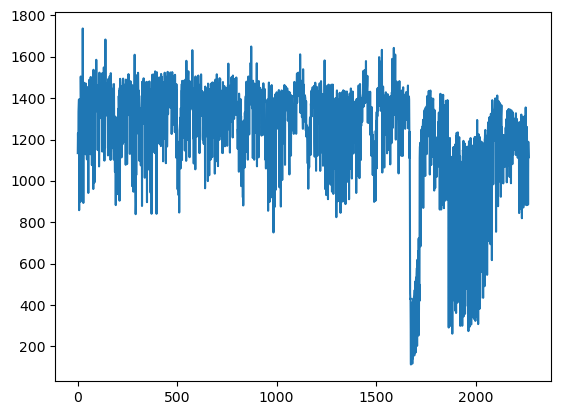

In [25]:
plt.plot(range(len(final)),final['q'])

In [26]:
final.to_csv('daily_traffic_Paris_2015_2021.csv')

Let's handle 2022!
Unfortunately, the 10 first weeks are in the archive dataset...

In [3]:
df2022 = pd.read_csv('comptages-routiers-permanents.csv',sep=';',usecols=['Libelle','Date et heure de comptage','Débit horaire',"Taux d'occupation","Etat trafic"])
df2022

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic
0,Tolbiac,2022-03-02T22:00:00+01:00,94.0,2.13834,Fluide
1,Pte_Brancion,2022-04-13T00:00:00+02:00,NaN,NaN,Inconnu
2,Bercy_bretelle_3,2022-05-01T22:00:00+02:00,NaN,NaN,Inconnu
3,Av_de_New_York,2022-06-05T08:00:00+02:00,NaN,NaN,Inconnu
4,AI_Brancion,2022-07-12T15:00:00+02:00,NaN,5.49278,Fluide
...,...,...,...,...,...
28418749,AE_Lilas,2023-02-01T01:00:00+01:00,NaN,NaN,Inconnu
28418750,AE_Villette,2023-02-01T03:00:00+01:00,NaN,NaN,Inconnu
28418751,AE_Villette,2023-02-01T02:00:00+01:00,NaN,NaN,Inconnu
28418752,AE_Villette,2023-02-01T01:00:00+01:00,NaN,NaN,Inconnu


In [4]:
df2022 = df2022.dropna(subset = ['Débit horaire',"Taux d'occupation"])

In [6]:
df2022['Date et heure de comptage'].unique()

array(['2022-03-02T22:00:00+01:00', '2022-08-02T15:00:00+02:00',
       '2022-10-05T15:00:00+02:00', ..., '2022-08-01T02:00:00+02:00',
       '2022-08-01T01:00:00+02:00', '2022-08-01T04:00:00+02:00'],
      dtype=object)

In [5]:
df2022['date'] = df2022['Date et heure de comptage'].str[:10]

C:\Users\ssss\AppData\Local\Temp\ipykernel_5068\3511050784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['date'] = df2022['Date et heure de comptage'].str[:10]


In [9]:
stations = set(df2022['Libelle'].unique())
selected_stations = stations & set(all_concatenated.keys())
df2022 = df2022[df2022['Libelle'].isin(selected_stations)]

In [10]:
df2022 = df2022.drop('Date et heure de comptage',axis=1)
df2022

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,date
0,Tolbiac,94.0,2.13834,Fluide,2022-03-02
7,Bd_Barbes,580.0,21.29278,Pré-saturé,2022-10-05
9,Av_des_Gobelins,821.0,29.02111,Pré-saturé,2022-12-06
14,Bd_Villette,736.0,5.78889,Fluide,2022-03-03
17,Bd_Kellermann,63.0,0.39445,Fluide,2022-06-11
...,...,...,...,...,...
28418673,PI_Bercy,905.0,2.50000,Fluide,2023-02-01
28418674,PI_Bercy,1673.0,4.15000,Fluide,2023-02-01
28418705,Bd_Malesherbes,167.0,0.75555,Fluide,2023-02-01
28418706,Bd_Malesherbes,586.0,3.61000,Fluide,2023-02-01


In [11]:
split_dfs = dict()
for group_name, group_df in df2022.groupby('Libelle'):
    group_df['Etat trafic'] = group_df['Etat trafic'].map({'Fluide':1,'Pré-saturé':2,'Saturé':3,'Bloqué':4}).fillna(0)
    s1=group_df['Débit horaire'].sum()
    if(s1!=0):
        split_dfs[group_name] = group_df.copy()
    #print(s1)

for libelle,subdataset in split_dfs.items():
    subdataset = subdataset.groupby(by = 'date').mean(numeric_only = True)
    subdataset = subdataset.rename(columns = {'Débit horaire':'q',"Taux d'occupation":'k','Etat trafic':'etat_trafic','Libelle':'libelle'})
    split_dfs[libelle] = subdataset
    #display(subdataset)
# our dict of counting sites is ready for the second part of 2022.

In [12]:
a = next(iter(split_dfs.keys()))
print(a)
split_dfs[a]


A6A_W_bretelle_9


,q,k,etat_trafic
date,,,
2022-03-01,2605.666667,22.302778,1.944444
2022-03-02,2433.166667,24.639583,2.041667
2022-03-03,2414.791667,27.293750,2.250000
2022-03-04,1777.923077,25.257692,2.230769
2022-03-17,2362.333333,35.800000,2.833333
...,...,...,...
2023-04-18,1619.285714,28.028571,2.380952
2023-04-19,2008.739130,24.315217,2.086957
2023-04-20,2191.521739,23.613043,1.956522


In [15]:
def strweek(week):
    res = str(week)
    if(len(res))==1:
        res = '0'+res
    return res

weeks_dict = []
intersection = None
for week in range(10):
    filenames = glob.glob(f'vroumvroum/trafic_capteurs_{2022}_W{strweek(week)}*.txt')
    if len(filenames)==0:
        print(f'no file for {week = }')
        continue
    filename = filenames[0]
    #print(filename)
    
    print(f'processing {week = } ')
    weeks_dict.append(load_and_prepare_data(filename))

    if intersection is None:
        intersection = set(weeks_dict[-1].keys())
    else:
        intersection &= weeks_dict[-1].keys()

    print(len(intersection))

# We now have the set of counters that are fixed for the given year. Let's concatenate together the weekly datsets    
concatenated_dict = dict()
for counter_label in intersection:
    concatenated_dict[counter_label] = pd.concat([weeks_dict[i][counter_label] for i in range(len(weeks_dict))])




processing week = 0 
462
processing week = 1 
458
processing week = 2 
458
processing week = 3 
456
processing week = 4 
448
processing week = 5 
446
processing week = 6 
446
processing week = 7 
445
processing week = 8 
443
processing week = 9 
441


In [16]:
concatenated_dict['A6A_W_bretelle_9'] # we indeed get the same values

,q,k,etat_trafic
date,,,
2022-01-01,1873.260870,9.852174,1.217391
2022-01-02,2131.958333,17.216667,1.666667
2022-01-03,2215.095238,12.528571,1.285714
2022-01-04,2071.166667,18.077083,1.750000
2022-01-05,1591.333333,12.879167,1.500000
...,...,...,...
2022-03-01,1106.000000,3.700000,1.000000
2022-03-01,2283.000000,19.290476,1.809524
2022-03-02,2433.166667,24.639583,2.041667


In [17]:
#Finally, we concatenate the archive 2022 with the current 2022
intersect = set(concatenated_dict.keys()) & set(split_dfs.keys())
len(intersect)

194

In [19]:
final_res_2022 = dict()
for counter_label in intersect:
    final_res_2022[counter_label] = pd.concat([concatenated_dict[counter_label],split_dfs[counter_label]])
    print(len(final_res_2022[counter_label]))
    (final_res_2022[counter_label]) = (final_res_2022[counter_label])[~(final_res_2022[counter_label]).index.duplicated(keep='first')]
    print(len(final_res_2022[counter_label]))



478
465
468
457
313
300
478
465
474
462
396
383
476
463
449
436
478
465
473
461
475
462
287
274
318
305
476
464
445
432
77
64
346
333
471
459
393
380
478
465
463
451
470
457
450
437
233
220
478
465
473
461
478
465
470
458
461
449
475
462
477
464
477
464
475
462
456
445
477
464
478
465
478
465
476
463
466
453
475
462
449
436
478
465
478
465
475
462
346
333
476
463
445
432
475
462
478
465
472
459
473
460
476
463
471
459
474
461
456
445
477
464
478
465
395
382
478
465
478
465
473
460
435
422
478
465
475
463
471
459
478
465
478
465
478
465
477
464
477
464
478
465
477
464
478
465
478
465
478
465
472
460
478
465
478
465
475
462
478
465
478
465
440
427
464
451
474
461
478
465
477
464
476
463
459
448
435
422
473
460
476
463
459
447
478
465
469
459
478
465
474
461
475
462
478
465
455
443
475
462
372
359
475
462
212
199
478
465
201
188
474
462
475
462
475
462
478
465
416
403
478
465
478
465
477
464
389
376
466
454
455
443
470
457
475
462
477
464
328
315
476
463
476
463
477
464
475
462
475
462
47

In [53]:
# and we take the mean across all counting stations
f

{'PE_St_Ouen':                       q          k  etat_trafic
 date                                           
 2022-01-01  3403.869565   7.373913     1.000000
 2022-01-02  3363.666667   7.391667     1.041667
 2022-01-03  3700.100000   8.702500     1.050000
 2022-01-04  3879.541667   9.397917     1.083333
 2022-01-05  3049.916667   7.458333     1.083333
 ...                 ...        ...          ...
 2023-04-18  4017.571429  16.945238     1.619048
 2023-04-19  4767.695652  12.415217     1.304348
 2023-04-20  4786.782609  12.669565     1.347826
 2023-04-21  4794.125000  11.583333     1.208333
 2023-04-22  4276.000000   9.050000     1.000000
 
 [470 rows x 3 columns],
 'Bd_Poissonniere':                      q          k  etat_trafic
 date                                          
 2022-01-01  483.108696   5.135098     1.000000
 2022-01-02  464.520833   4.653994     1.000000
 2022-01-03  476.312500   4.776263     1.000000
 2022-01-04  492.083333   6.802490     1.166667
 2022-01-05  53

In [20]:
for counter_name,final_dataset_counter in final_res_2022.items():
    final_dataset_counter.to_csv(f'{counter_name}_2022_2023.csv')

In [22]:
n = 0
for dataset in final_res_2022.values():
    if n == 0:
        final = dataset
    else:
        final = final.add(dataset,fill_value=0)
    n+=1

final['q'] = final['q']/n
final['k'] = final['k']/n
final['etat_trafic'] = final['etat_trafic']/n
final

,q,k,etat_trafic
date,,,
2022-01-01,1134.631264,5.146468,1.055250
2022-01-02,1081.669122,5.102281,1.075437
2022-01-03,1165.020427,5.613869,1.077206
2022-01-04,1220.304646,6.651972,1.136368
2022-01-05,986.944034,5.720089,1.106203
...,...,...,...
2023-04-18,1167.533997,8.930174,1.195000
2023-04-19,1251.227805,9.466110,1.212558
2023-04-20,1304.298118,9.874046,1.225746


In [23]:
final.to_csv('daily_traffic_Paris_2022_2023.csv')

In [33]:
#and we finally just concatenate our two beautiful babies
df_2015_to_2021 = pd.read_csv('daily_traffic_Paris_2015_2021.csv',index_col='date')
df_2022_to_2023 = pd.read_csv('daily_traffic_Paris_2022_2023.csv',index_col='date')
df_2015_to_2021[:-1]
apotheosis = pd.concat([df_2015_to_2021[:-1],df_2022_to_2023])
apotheosis

,q,k,etat_trafic
date,,,
2015-01-01,1134.190661,4.762716,1.039736
2015-01-02,1230.138150,5.628853,1.087452
2015-01-03,1175.388653,5.535600,1.070029
2015-01-04,1166.337156,4.826594,1.042736
2015-01-05,1333.918753,5.931412,1.098568
...,...,...,...
2023-04-18,1167.533997,8.930174,1.195000
2023-04-19,1251.227805,9.466110,1.212558
2023-04-20,1304.298118,9.874046,1.225746


In [34]:
apotheosis.to_csv("daily_traffic_Paris_2015_2023.csv")

In [35]:
#:)

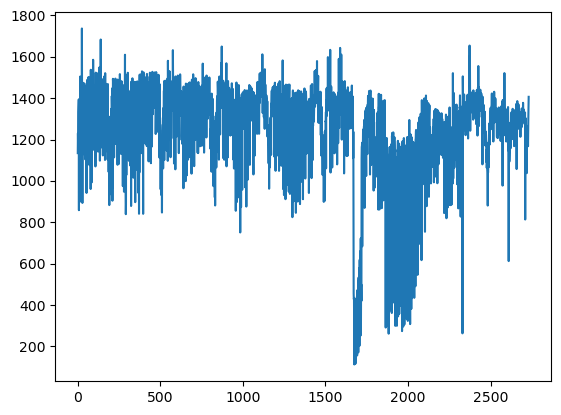

In [36]:
plt.plot(range(len(apotheosis)),apotheosis['q'])